# GROUP PROJECT - WE ARE THE CHAMPIONS

Predictive Methods of Data Mining

**(CRISP-DM approach)**

Group 07:
Carolina Santos (20220089); Guilherme Figueiredo (20220533); Ricardo Fangueiro (20220536); Rodrigo Freire (20221292); Valeria Caraus (20220316).

# Importing Libraries and Data

In [ ]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import RFE
import pandas.plotting as pd_plotting
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score
! pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from tabulate import tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
#Reading the files

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/'


Mounted at /content/drive


In [ ]:
#Train and Test datasets importation
data_train = pd.read_csv(path + 'data/train.csv')
data_test = pd.read_csv(path + 'data/test.csv')

In [ ]:
# Copying the dataset TRAIN and TEST
data_train_copy = data_train.copy()
wac_test = data_test.copy()

# Data Exploration

In [ ]:
#Checking the train dataset
data_train.head(10)

RecordID               Competition  Edition  Athlete Id Sex  \
0     44141         Federation League   2019.0    549337.0   M   
1     78417       Regional Tournament   2021.0    631492.0   F   
2     63424             Olympic Games   2022.0   2168833.0   M   
3     72391              National Cup   2021.0    573153.0   M   
4     46699               Local Match   2019.0    606079.0   M   
5     28004       Regional Tournament   2021.0    617560.0   F   
6     72809         Federation League   2020.0    560311.0   M   
7     15624  Continental Championship   2022.0    570273.0   M   
8     90336         Federation League   2019.0    607485.0   M   
9     23810               Local Match   2022.0    627365.0   F   

            Region          Education Age group       Income Disability  ...  \
0  Southern Africa        High school      0-35       Middle      False  ...   
1          Oceania  University Degree      0-35          Low      False  ...   
2      Middle East      Middle school     35-55       Middle      False  ...   
3  Southern Europe      Middle school      0-35          Low      False  ...   
4  Southern Europe        High school     35-55       Middle      False  ...   
5      Middle East        High school      0-35  Middle-High      False  ...   
6   Western Europe      Middle school      0-35       Middle      False  ...   
7        East Asia        High school      0-35         High      False  ...   
8    North America        High school      0-35         High       True  ...   
9          Oceania      Middle school     35-55  Middle-High      False  ...   

   Cardiovascular training Outdoor Workout Squad training  Physiotherapy  \
0                      0.0           False            7.0            0.0   
1                    118.0           False            0.0            0.0   
2                      0.0           False            0.0            0.0   
3                     55.0           False            0.0            0.0   
4                    265.0           False           22.0           50.0   
5                     61.0           False            0.0            0.0   
6                     16.0           False            0.0          182.0   
7                     61.0           False            9.0          310.0   
8                      0.0           False            0.0           36.0   
9                   1003.0            True            8.0           91.0   

  Plyometric training  No coach  Sport-specific training  Other training  \
0                 0.0     False                      1.0             0.0   
1                 0.0     False                     65.0             0.0   
2                 0.0     False                      0.0             0.0   
3                 0.0     False                      3.0             0.0   
4                13.0     False                     25.0             0.0   
5                 0.0     False                      5.0             0.0   
6                 0.0     False                     93.0            18.0   
7                 0.0     False                     59.0             0.0   
8                 0.0     False                      0.0             0.0   
9                22.0     False                     71.0             7.0   

   Past injuries  Outcome  
0          False        0  
1          False        1  
2          False        0  
3          False        0  
4          False        0  
5          False        1  
6          False        1  
7           True        1  
8           True        1  
9           True        1  

[10 rows x 30 columns]

In [ ]:
#Checking types of variables for train dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RecordID                 18055 non-null  int64  
 1   Competition              17968 non-null  object 
 2   Edition                  17959 non-null  float64
 3   Athlete Id               17965 non-null  float64
 4   Sex                      17962 non-null  object 
 5   Region                   17953 non-null  object 
 6   Education                17960 non-null  object 
 7   Age group                17952 non-null  object 
 8   Income                   17965 non-null  object 
 9   Disability               17966 non-null  object 
 10  Previous attempts        17968 non-null  float64
 11  Late enrollment          17969 non-null  object 
 12  Cancelled enrollment     17967 non-null  object 
 13  Athlete score            17968 non-null  float64
 14  Mental preparation    

In [ ]:
#Checking the percentage of missing values for each variable in the train dataset
data_train.isna().sum() / len(data_train) * 100
round(data_train.isna().sum()/len(data_train)*100,2)

RecordID                   0.00
Competition                0.48
Edition                    0.53
Athlete Id                 0.50
Sex                        0.52
Region                     0.56
Education                  0.53
Age group                  0.57
Income                     0.50
Disability                 0.49
Previous attempts          0.48
Late enrollment            0.48
Cancelled enrollment       0.49
Athlete score              0.48
Mental preparation         0.43
Train bf competition       0.53
Strength training          0.43
Sand training              0.44
Recovery                   0.53
Supplements                0.50
Cardiovascular training    0.52
Outdoor Workout            0.47
Squad training             0.49
Physiotherapy              0.50
Plyometric training        0.37
No coach                   0.47
Sport-specific training    0.53
Other training             0.56
Past injuries              0.58
Outcome                    0.00
dtype: float64

In [ ]:
#Checking the descriptive statistics of numerical variables for train dataset
data_train.describe().T

count           mean            std      min  \
RecordID                 18055.0   55010.086846   26018.144281  10001.0   
Edition                  17959.0    2020.651317       1.209453   2019.0   
Athlete Id               17965.0  703745.186863  550245.183498   8462.0   
Previous attempts        17968.0       0.154831       0.465858      0.0   
Athlete score            17968.0      16.543856      36.215332    -30.0   
Train bf competition     17959.0     266.042764     323.645815      0.0   
Strength training        17977.0     476.577516     699.269019      0.0   
Sand training            17976.0       3.405096      36.108953      0.0   
Recovery                 17960.0     305.545490     622.102598      0.0   
Supplements              17965.0     133.868466     174.275943      0.0   
Cardiovascular training  17961.0     273.188018     493.070755      0.0   
Squad training           17966.0       4.209563      11.712988      0.0   
Physiotherapy            17965.0      34.464960      93.437346    -50.0   
Plyometric training      17989.0       2.518984       7.509333      0.0   
Sport-specific training  17959.0      21.604432      35.648683      0.0   
Other training           17954.0       4.161134      13.589327      0.0   
Outcome                  18055.0       0.596289       0.490654      0.0   

                              25%       50%       75%        max  
RecordID                  32344.5   54875.0   77466.5    99990.0  
Edition                    2019.0    2021.0    2022.0     2022.0  
Athlete Id               503183.0  588146.0  642591.0  2698588.0  
Previous attempts             0.0       0.0       0.0        6.0  
Athlete score                 0.0       0.0      30.0      140.0  
Train bf competition         80.0     171.0     335.0     5012.0  
Strength training            62.0     202.0     584.0     9438.0  
Sand training                 0.0       0.0       0.0     2480.0  
Recovery                     31.0     121.0     327.0    10483.0  
Supplements                  24.0      66.0     181.0     4345.0  
Cardiovascular training      15.0      89.0     301.0    13032.0  
Squad training                0.0       0.0       3.0      316.0  
Physiotherapy                 0.0       0.0      24.0     2117.0  
Plyometric training           0.0       0.0       0.0       65.0  
Sport-specific training       3.0      10.0      28.0      966.0  
Other training                0.0       0.0       0.0      264.0  
Outcome                       0.0       1.0       1.0        1.0

In [ ]:
#Checking descriptive statistics of categorical variables for train dataset
data_train.describe(include = ['O']).T

count unique            top   freq
Competition           17968      7    Local Match   4404
Sex                   17962      2              M   9878
Region                17953     13  North America   2001
Education             17960      5    High school   8059
Age group             17952      4           0-35  12470
Income                17965      5           High   5395
Disability            17966      2          False  16298
Late enrollment       17969      2          False  17830
Cancelled enrollment  17967      2          False  14686
Mental preparation    17978      3          FALSE  16519
Outdoor Workout       17971      2          False  16777
No coach              17971      2          False  17969
Past injuries         17950      2           True   9872

# Data Understanding

In [ ]:
# We're going to go to do the data understanding on the 'train' dataset since thats the dataset that we need to understand and anylise in order to later do the data preprocessing

In [ ]:
#Splitting the dataset into categorical and numerical variables (nocat:numerical, cat: categorical)
data_train_nocat = data_train.select_dtypes(include='number')
data_train_cat = data_train.select_dtypes(include='object')

## Variables' types

In [ ]:
#Checking types of numerical variables for train dataset
data_train_nocat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RecordID                 18055 non-null  int64  
 1   Edition                  17959 non-null  float64
 2   Athlete Id               17965 non-null  float64
 3   Previous attempts        17968 non-null  float64
 4   Athlete score            17968 non-null  float64
 5   Train bf competition     17959 non-null  float64
 6   Strength training        17977 non-null  float64
 7   Sand training            17976 non-null  float64
 8   Recovery                 17960 non-null  float64
 9   Supplements              17965 non-null  float64
 10  Cardiovascular training  17961 non-null  float64
 11  Squad training           17966 non-null  float64
 12  Physiotherapy            17965 non-null  float64
 13  Plyometric training      17989 non-null  float64
 14  Sport-specific trainin

In [ ]:
#Checking types of categorical variables for train dataset
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Competition           17968 non-null  object
 1   Sex                   17962 non-null  object
 2   Region                17953 non-null  object
 3   Education             17960 non-null  object
 4   Age group             17952 non-null  object
 5   Income                17965 non-null  object
 6   Disability            17966 non-null  object
 7   Late enrollment       17969 non-null  object
 8   Cancelled enrollment  17967 non-null  object
 9   Mental preparation    17978 non-null  object
 10  Outdoor Workout       17971 non-null  object
 11  No coach              17971 non-null  object
 12  Past injuries         17950 non-null  object
dtypes: object(13)
memory usage: 1.8+ MB


## Correlation


                         RecordID   Edition  Athlete Id  Previous attempts  \
RecordID                 1.000000  0.002022   -0.010638          -0.001032   
Edition                  0.002022  1.000000    0.027987          -0.006498   
Athlete Id              -0.010638  0.027987    1.000000           0.018214   
Previous attempts       -0.001032 -0.006498    0.018214           1.000000   
Athlete score           -0.007088 -0.034939    0.007091           0.185913   
Train bf competition    -0.013859 -0.059358    0.049889          -0.061191   
Strength training       -0.006890  0.017111    0.021024          -0.058298   
Sand training           -0.002169 -0.018354    0.013152          -0.002512   
Recovery                -0.006073 -0.083125    0.046594          -0.038861   
Supplements             -0.014356 -0.097435    0.043706          -0.030037   
Cardiovascular training -0.011143  0.082377    0.002416          -0.053951   
Squad training           0.004783  0.130021    0.025939         

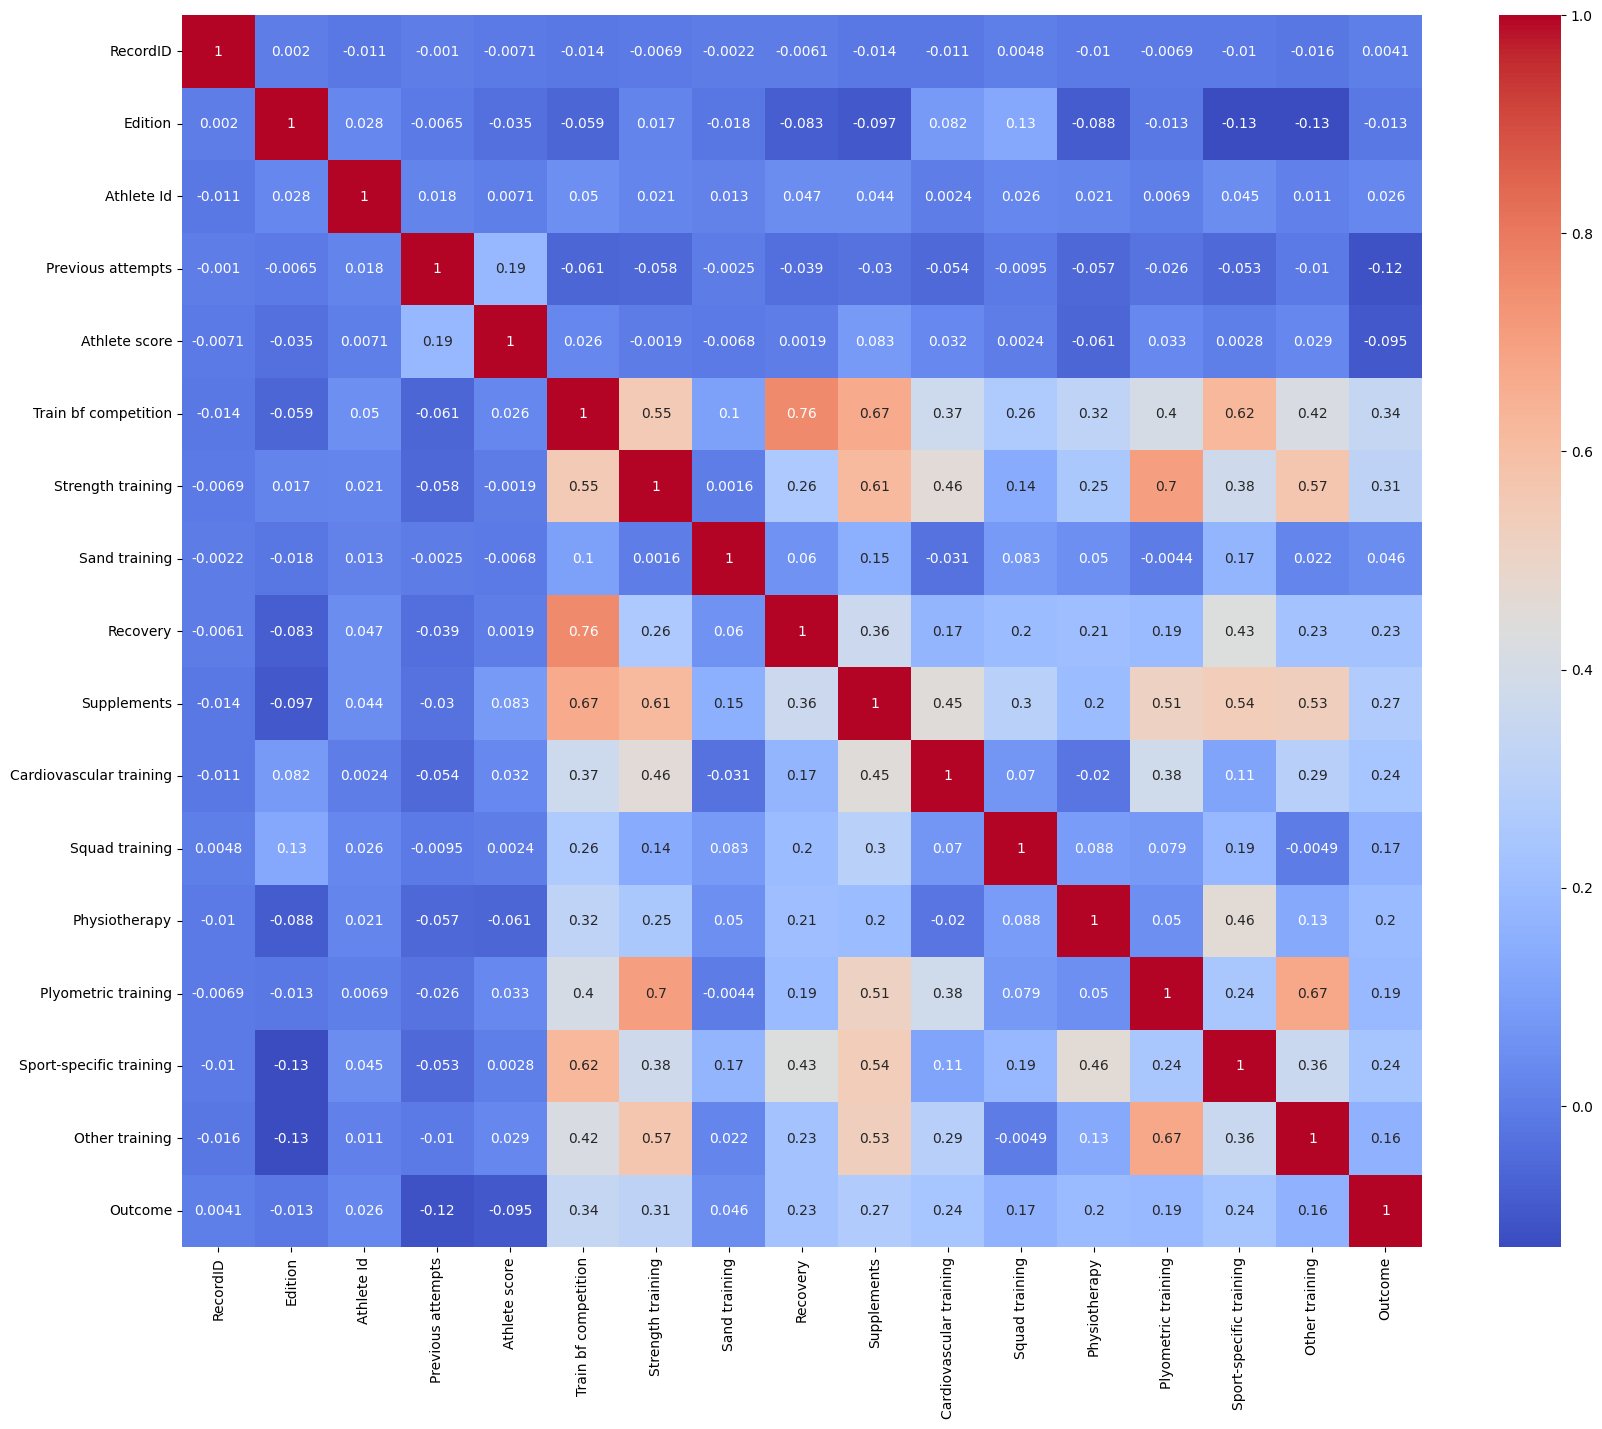

In [ ]:
#Checking the correlation values between variables for the train dataset (using a table and a correlation matrix plot).
correlation_matrix = data_train.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
print(correlation_matrix)

## Other visualizations

Text(0.5, 0, 'Cardiovascular training')

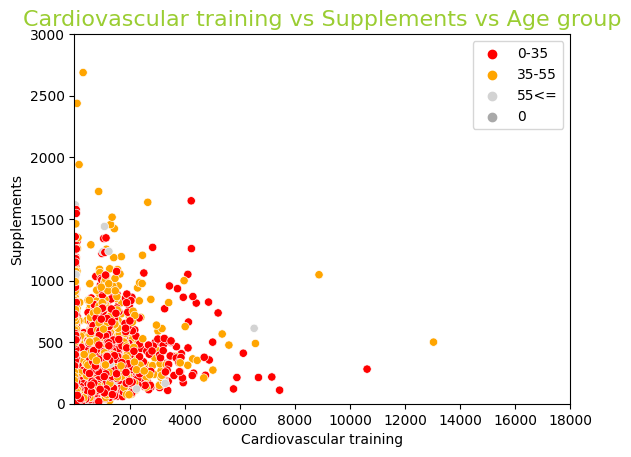

In [ ]:
#Creating a scatterplot with the variables 'Cadiovascular training', 'Supplements' and 'Age group'.
sns.scatterplot(x = 'Cardiovascular training', y = 'Supplements', hue = 'Age group', data = data_train, palette = ['red', 'orange', 'lightgrey', 'darkgrey', 'yellowgreen', 'greenyellow'])

# Step 14.2
plt.ylim(bottom = 0, top = 3000)

# Step 14.3
plt.xlim(left = 0, right = 8000)

# Step 14.4
import numpy as np
plt.xticks(np.arange(2000,20000,2000))

# Step 14.5
plt.title(label = 'Cardiovascular training vs Supplements vs Age group', fontsize= 16, color = 'yellowgreen')

# Step 14.6
plt.legend(loc = 'upper right')

# Step 14.7
plt.xlabel(xlabel = 'Cardiovascular training')

Text(0.5, 0, 'Supplements')

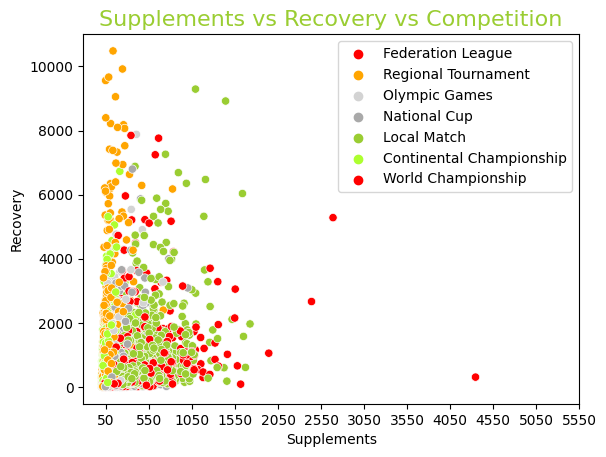

In [ ]:
#Creating a scatterplot with the variables 'Supplements', 'Recovery' and 'Competition'.
sns.scatterplot(x = 'Supplements', y = 'Recovery', hue = 'Competition', data = data_train, palette = ['red', 'orange', 'lightgrey', 'darkgrey', 'yellowgreen', 'greenyellow'])

# Step 14.2
plt.ylim(bottom = None, top = None)

# Step 14.3
plt.xlim(left = None, right = None)

# Step 14.4
import numpy as np
plt.xticks(np.arange(50,6000,500))

# Step 14.5
plt.title(label = 'Supplements vs Recovery vs Competition', fontsize= 16, color = 'yellowgreen')

# Step 14.6
plt.legend(loc = 'upper right')

# Step 14.7
plt.xlabel(xlabel = 'Supplements')

In [ ]:
# Scatterplot for all the numeric variables

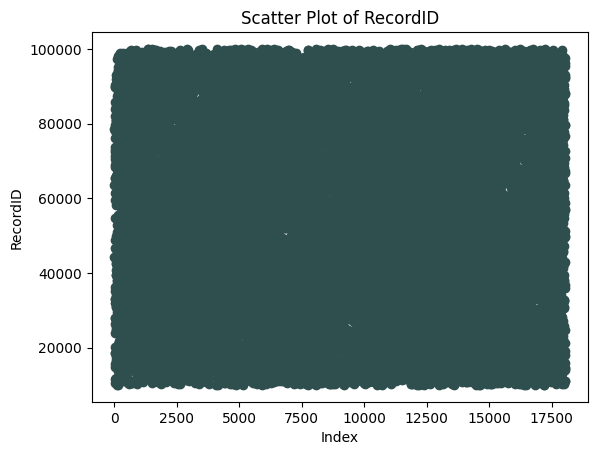

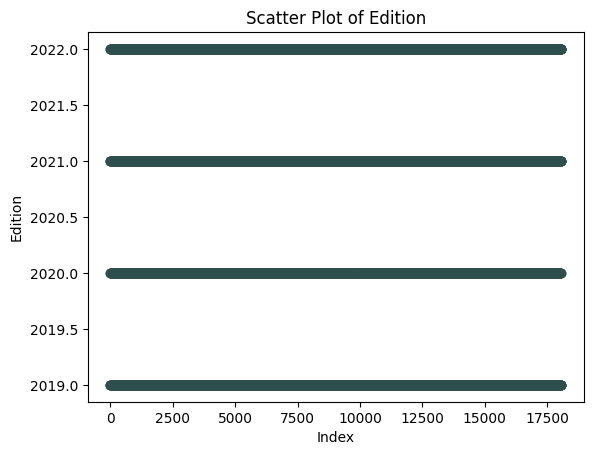

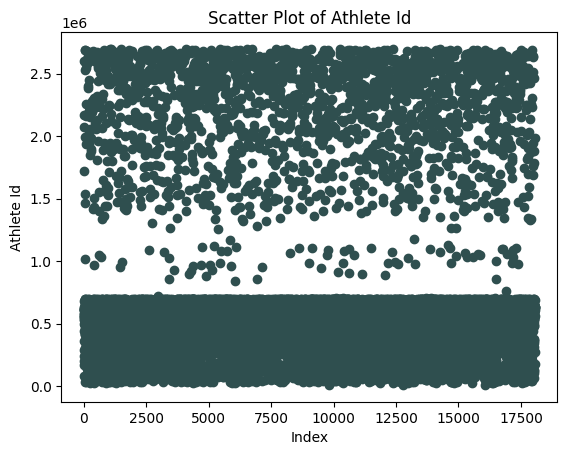

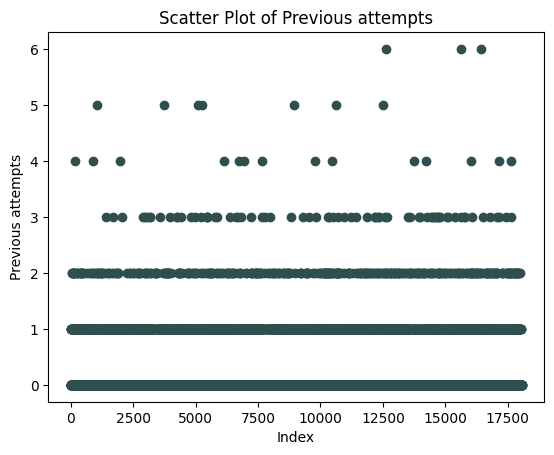

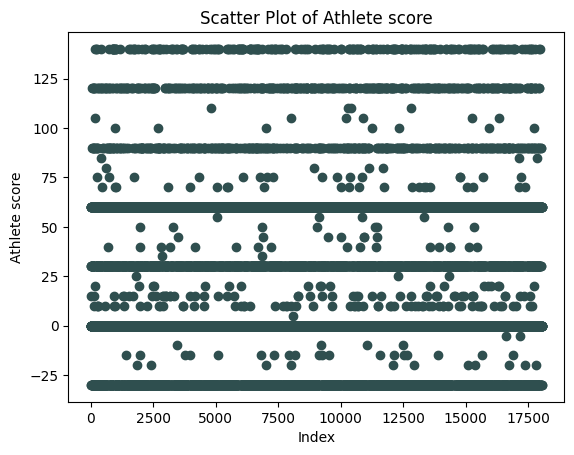

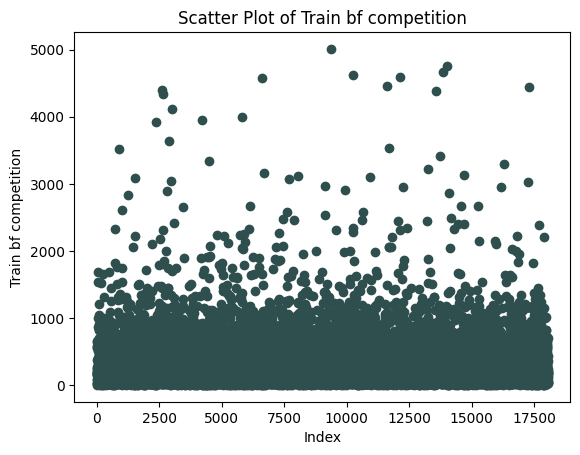

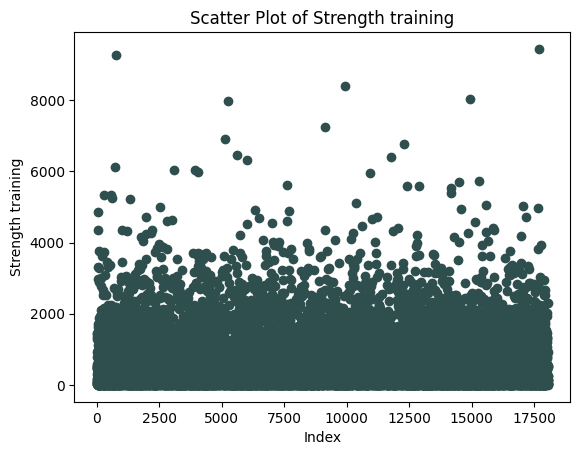

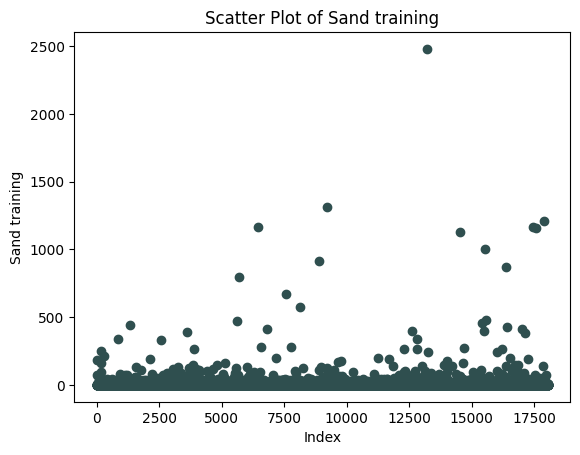

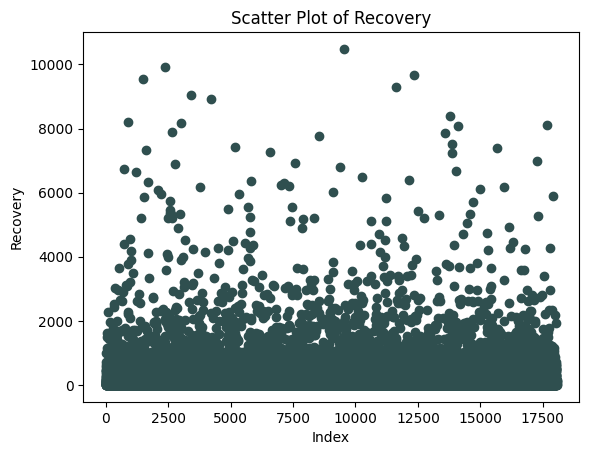

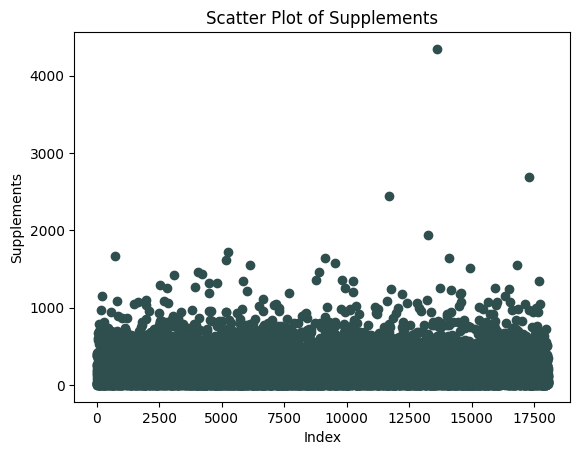

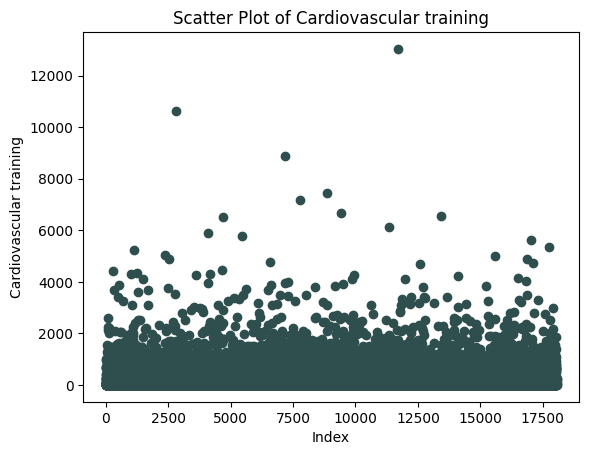

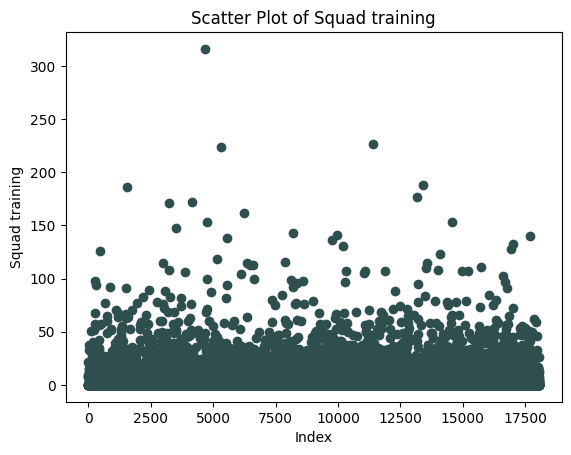

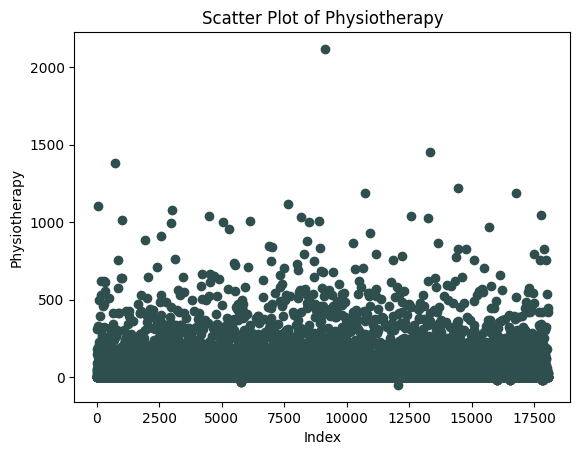

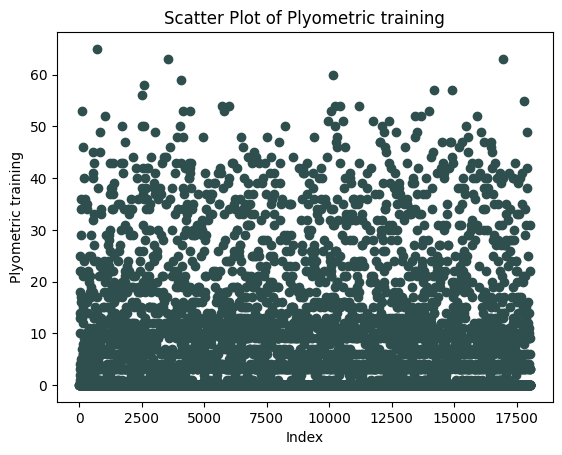

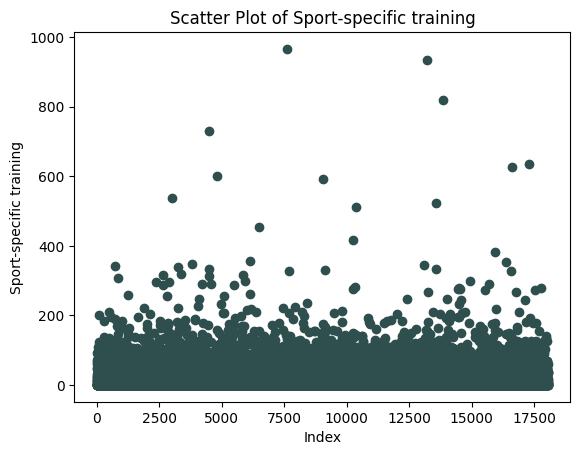

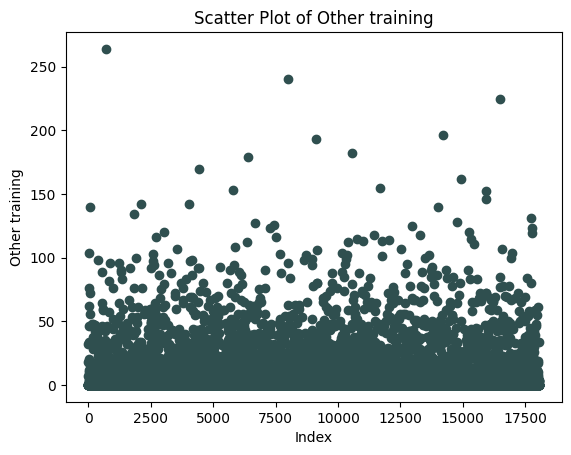

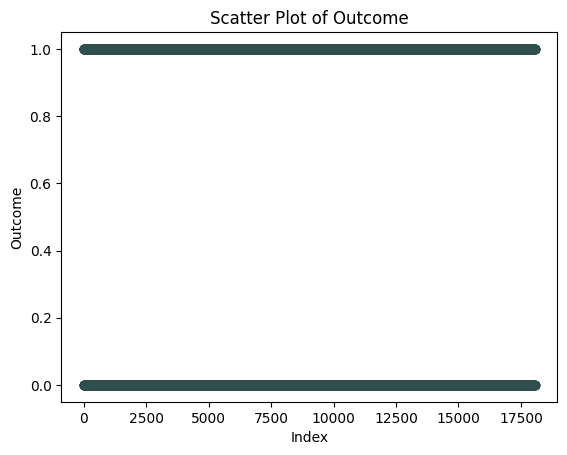

In [ ]:
for col in data_train_nocat:
    plt.scatter(range(len(data_train_nocat[col])), data_train_nocat[col], color='darkslategrey')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter Plot of {col}')
    plt.show()

<Axes: xlabel='count', ylabel='Region'>

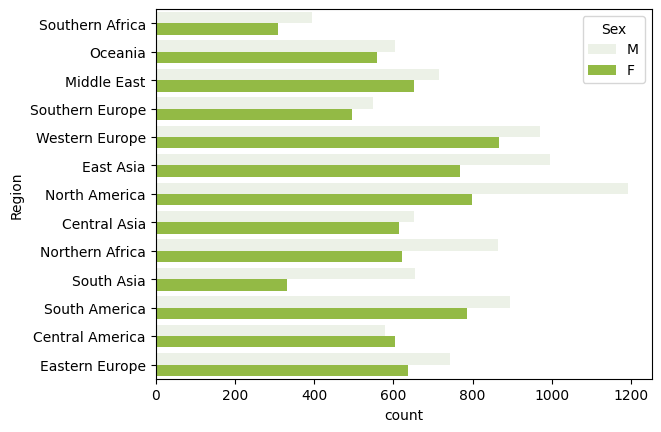

In [ ]:
#Creating a Countplot with the variables 'Region' and 'Sex'
sns.countplot(y = 'Region', hue = 'Sex', data = data_train, color='yellowgreen')

In [ ]:
# Creating Bar Plots to make the count of each categorical variables

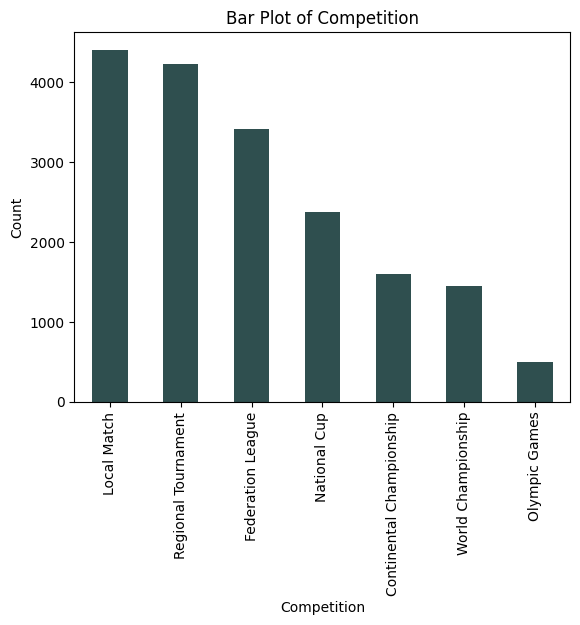

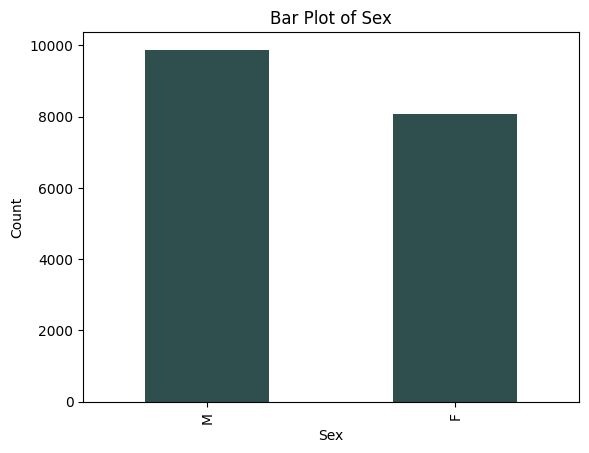

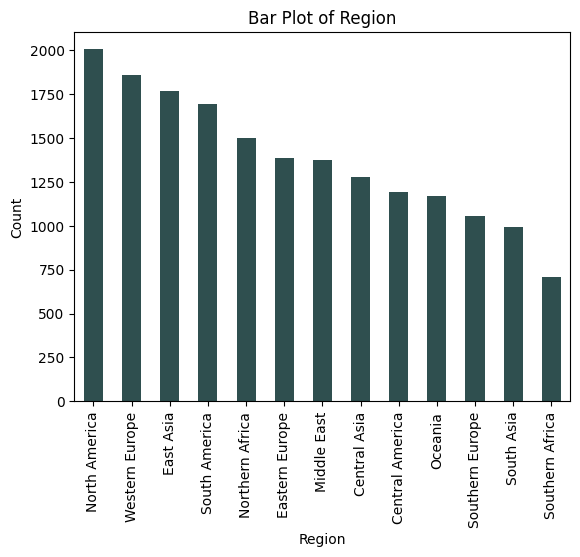

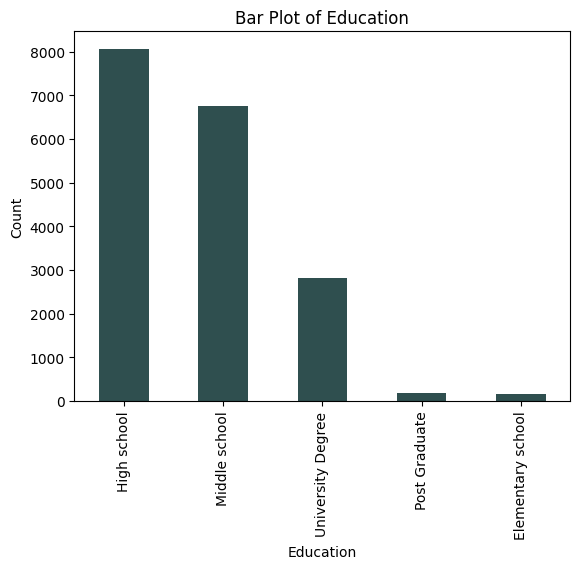

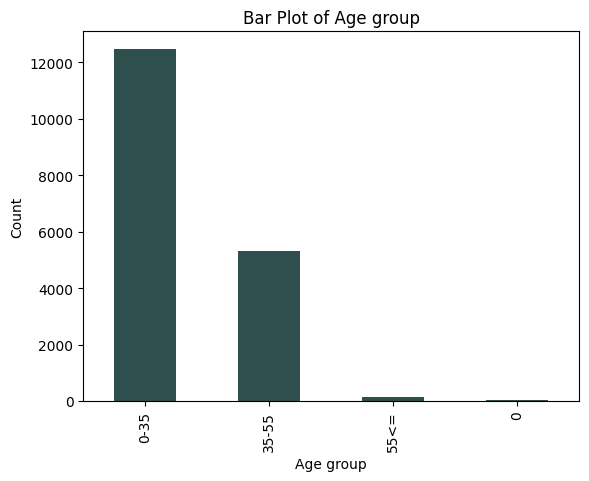

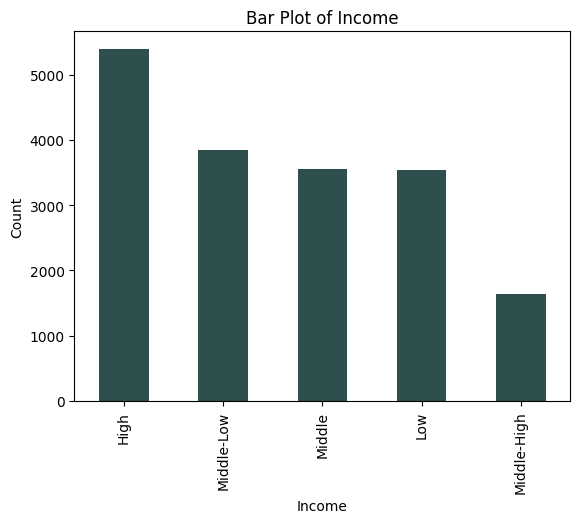

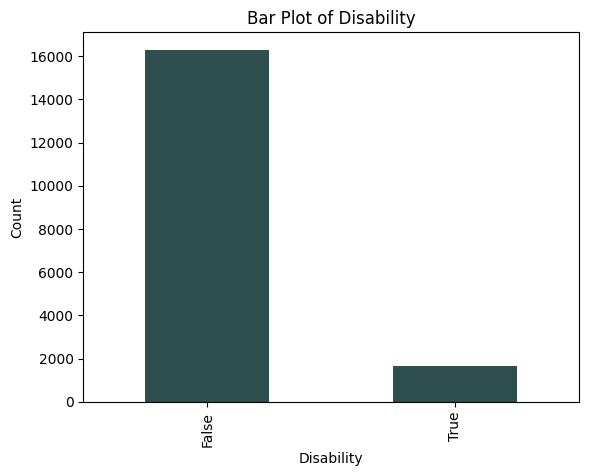

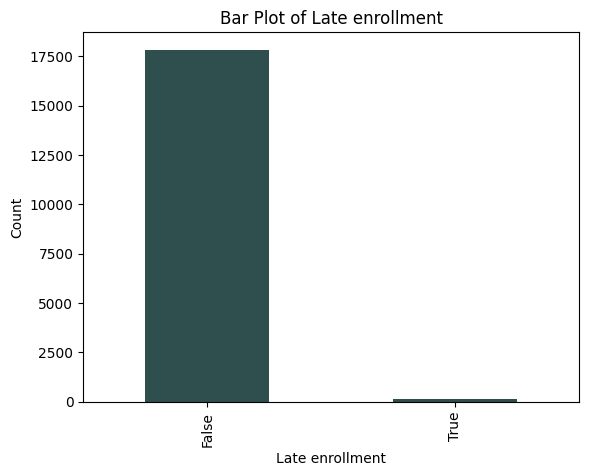

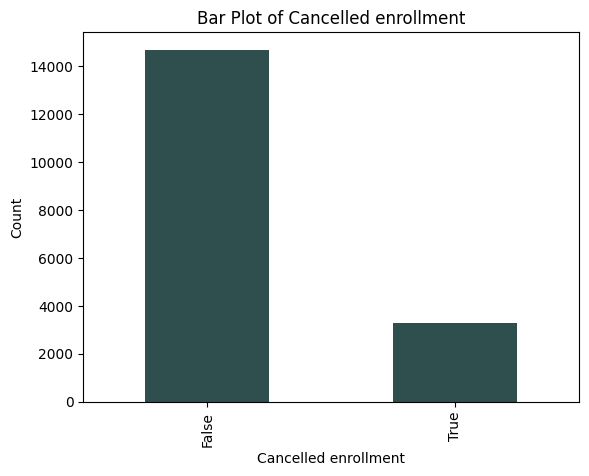

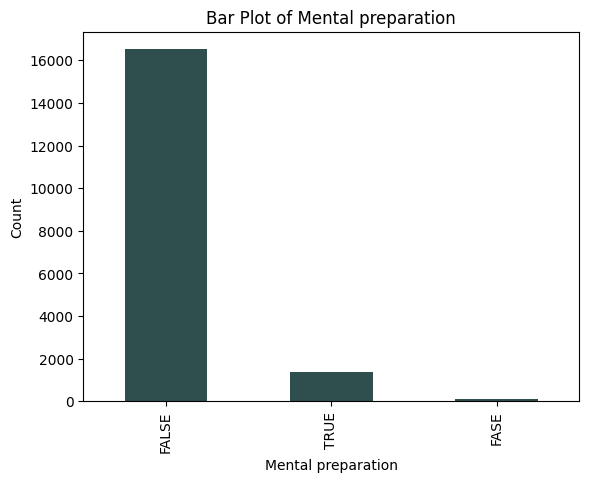

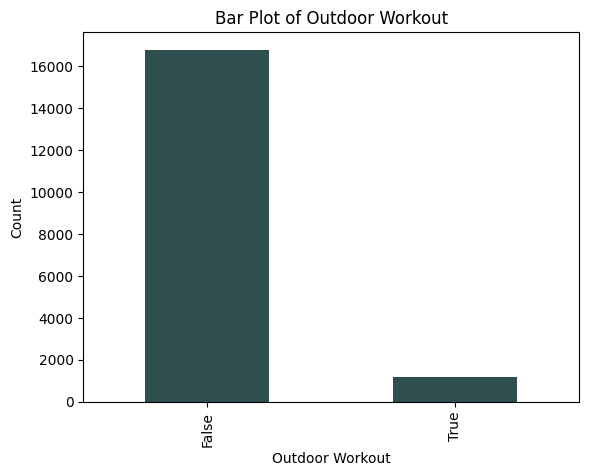

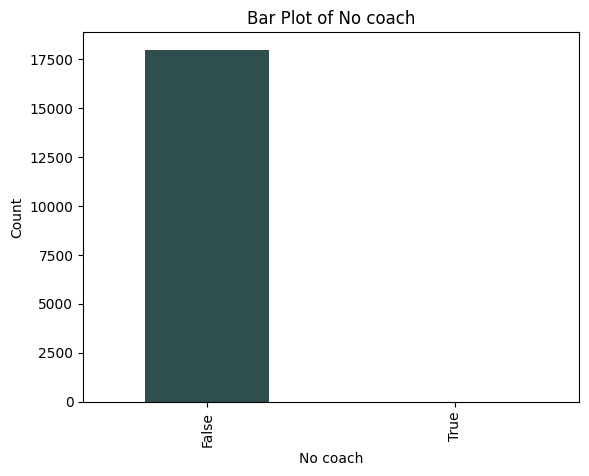

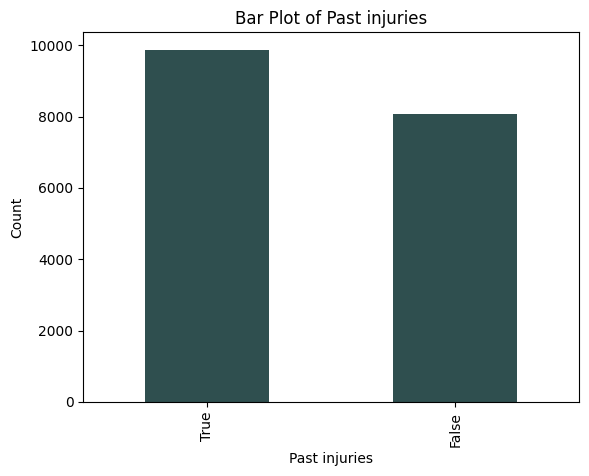

In [ ]:
for col in data_train_cat:
    data_train_cat[col].value_counts().plot.bar(color='darkslategrey')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {col}')
    plt.show()

In [ ]:
# Creating a Scatter Plot Matrix for all the numerical variables

In [ ]:
num_cols = len(data_train_nocat.columns)
figsize = (num_cols*1.5, num_cols*1.5)

pd_plotting.scatter_matrix(data_train_nocat, figsize=figsize, alpha=0.5)
plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()

In [ ]:
# Creating Stacked Bar Plots to relate the categorical features with the feature "Education"

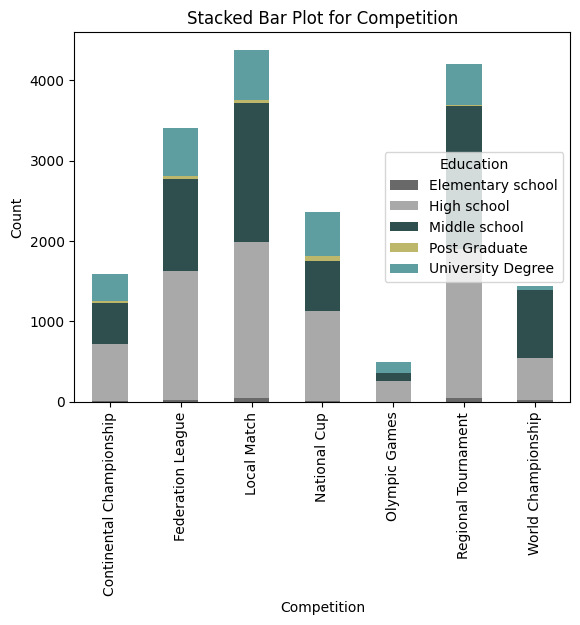

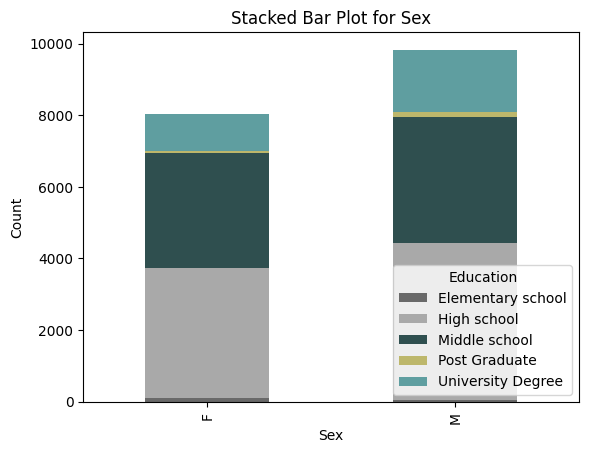

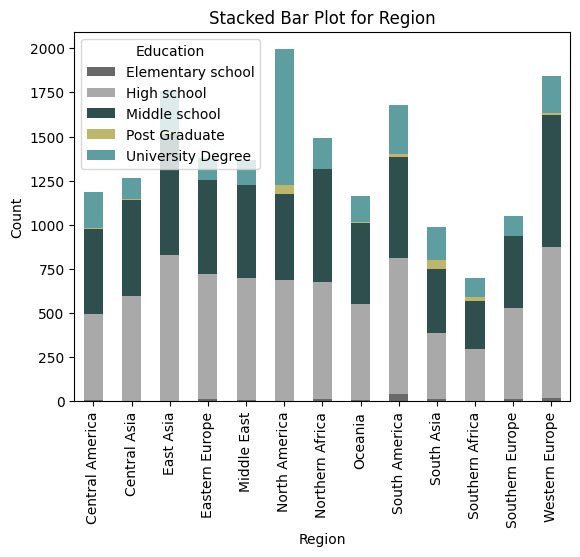

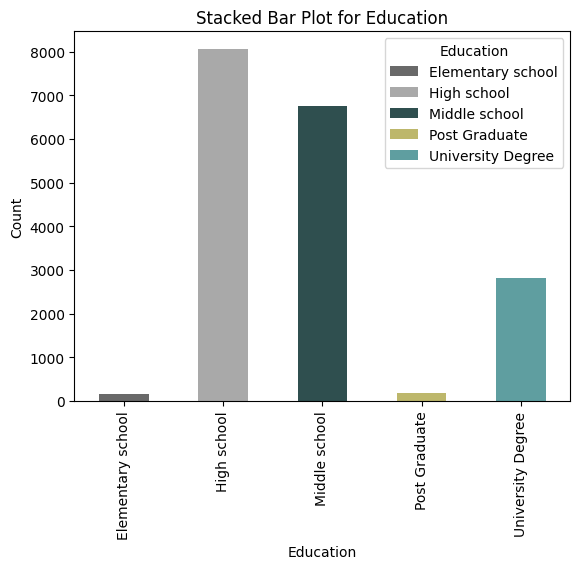

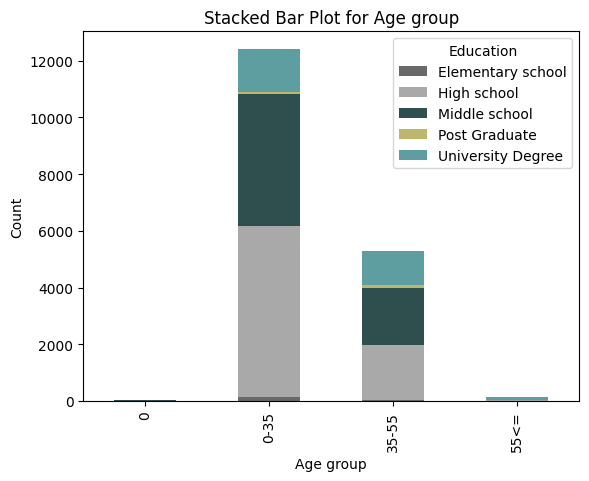

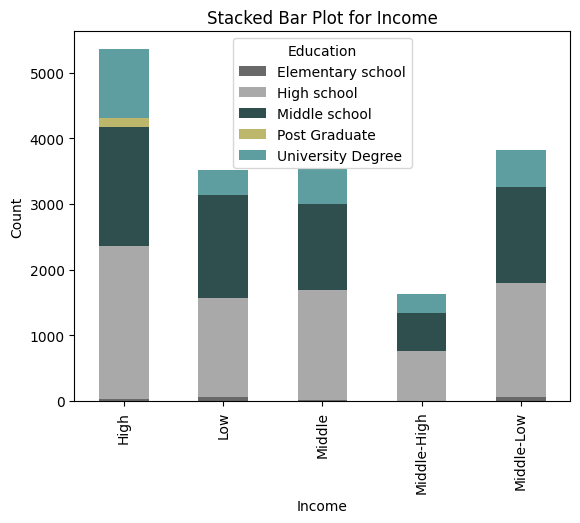

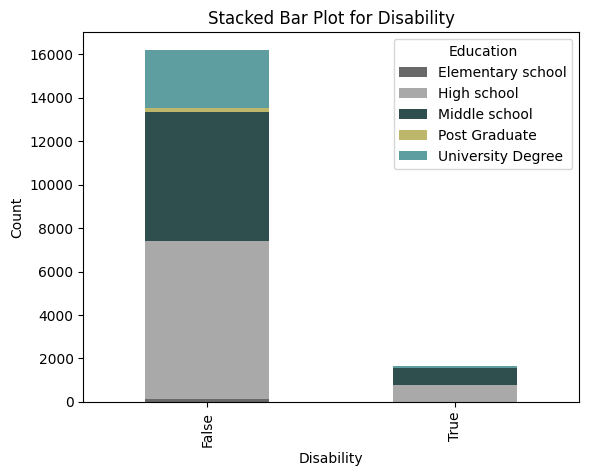

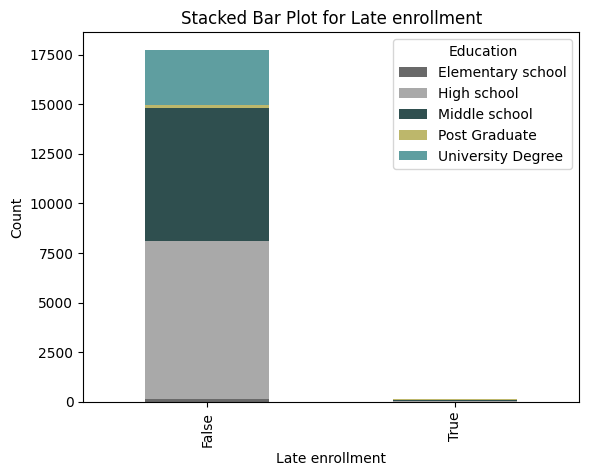

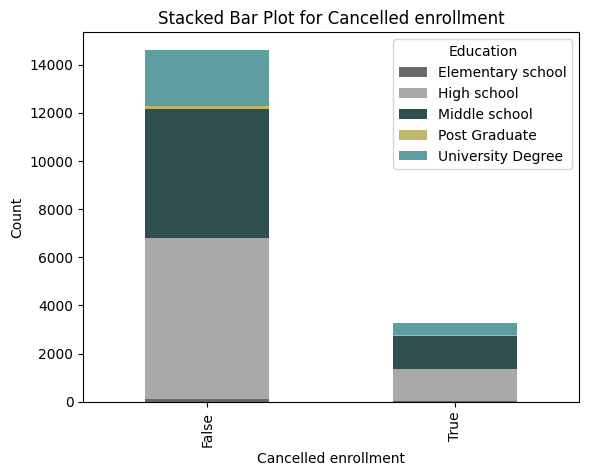

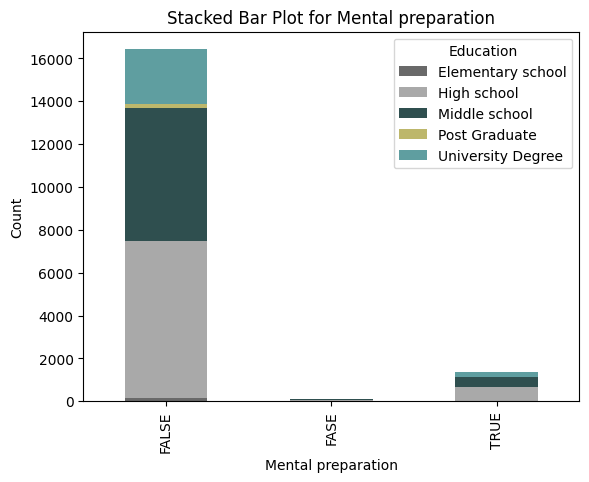

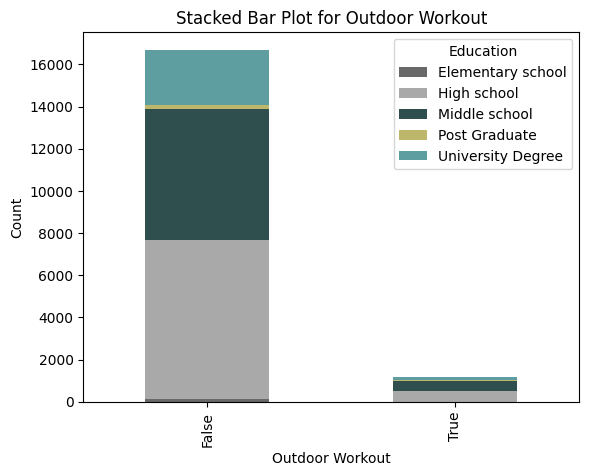

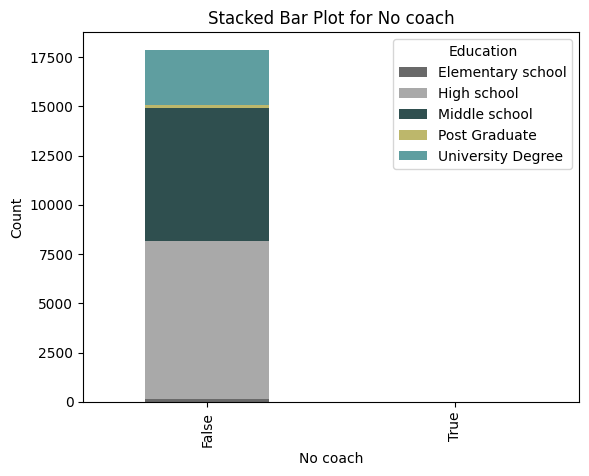

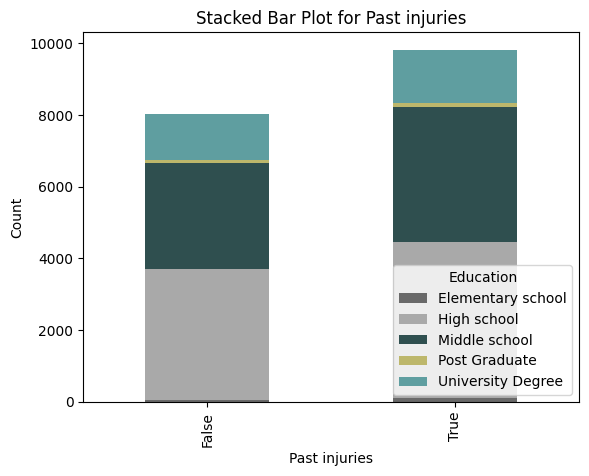

In [ ]:
# Show the distribution of a categorical variable across different categories, stacked by another categorical variable:
variables = data_train_cat.columns.tolist()  # List of variables to plot

custom_colors = ['dimgray', 'darkgray', 'darkslategrey', 'darkkhaki', 'cadetblue']  # Custom colors for the bars

for var in variables:
    data_train_cat.groupby([var, 'Education']).size().unstack().plot(kind='bar', stacked=True, color=custom_colors)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Stacked Bar Plot for {var}')
    plt.show()

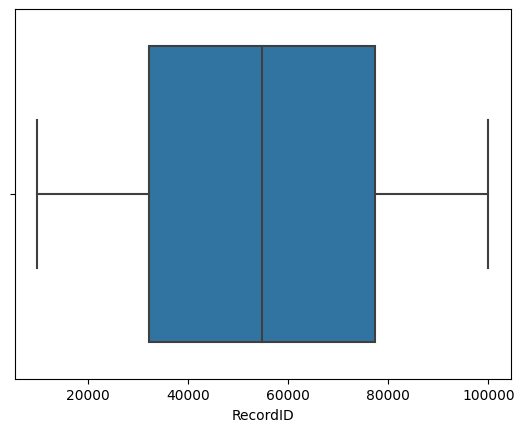

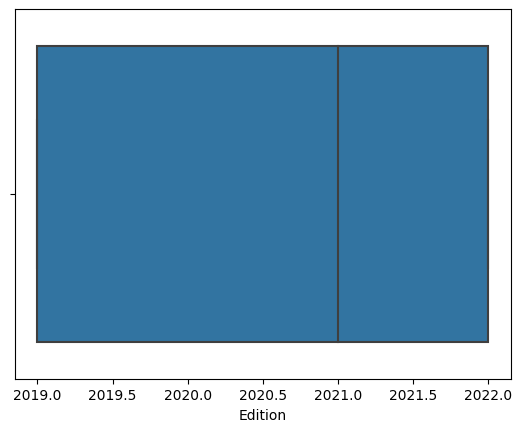

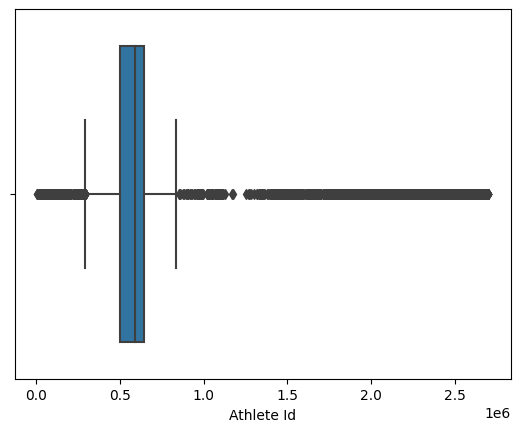

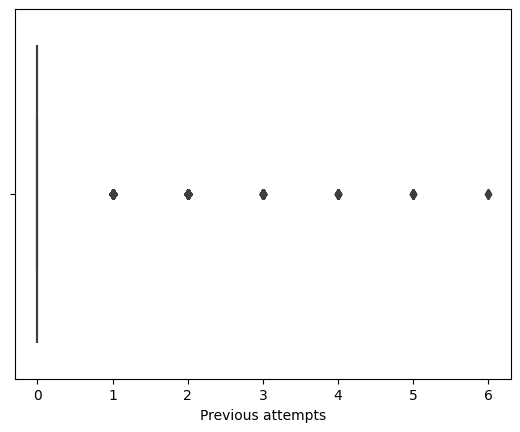

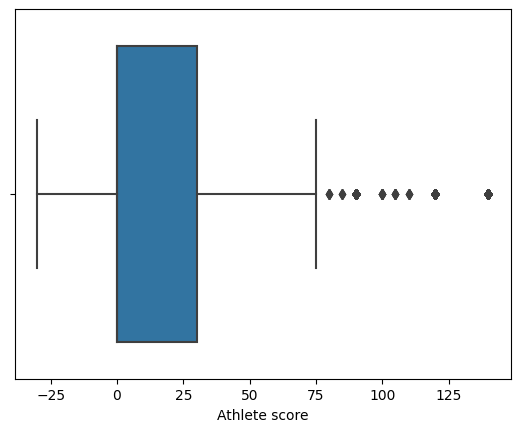

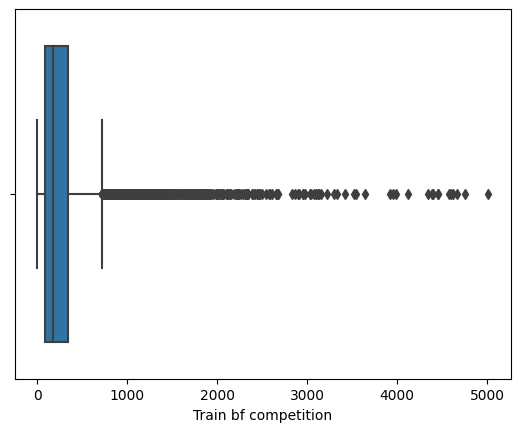

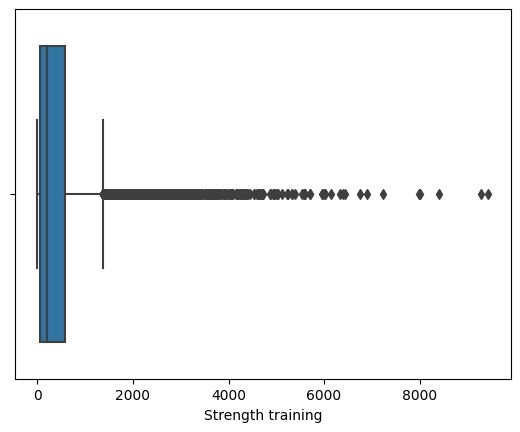

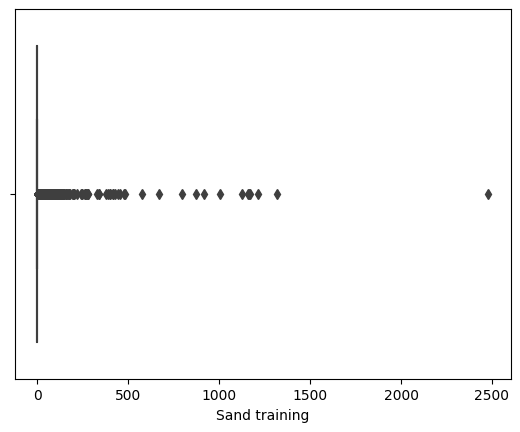

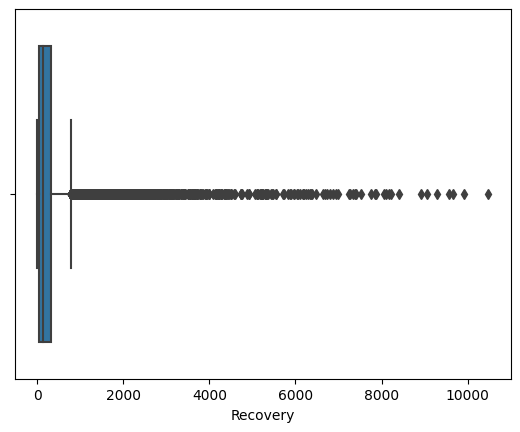

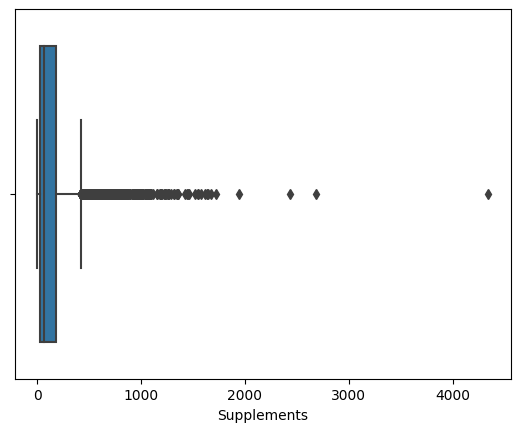

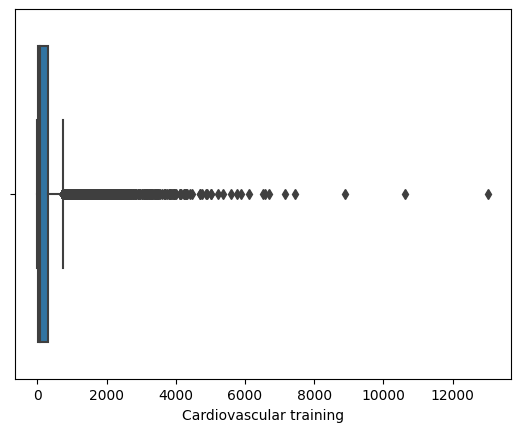

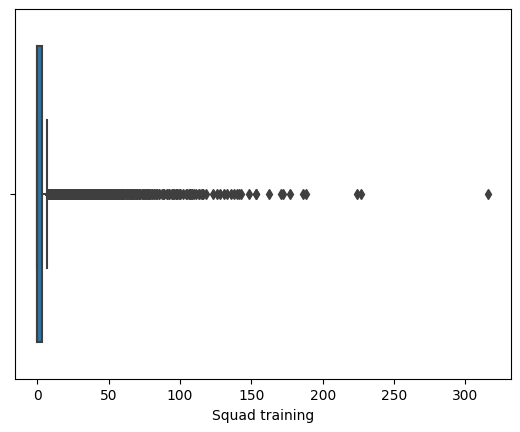

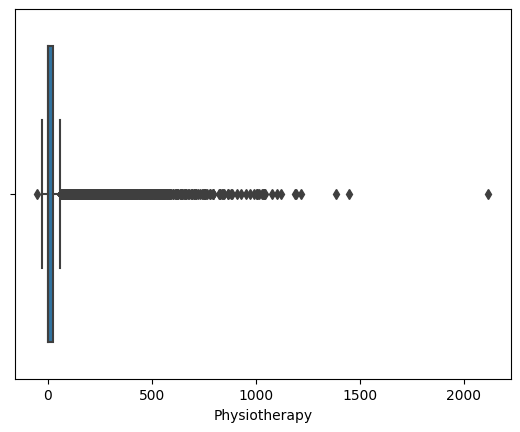

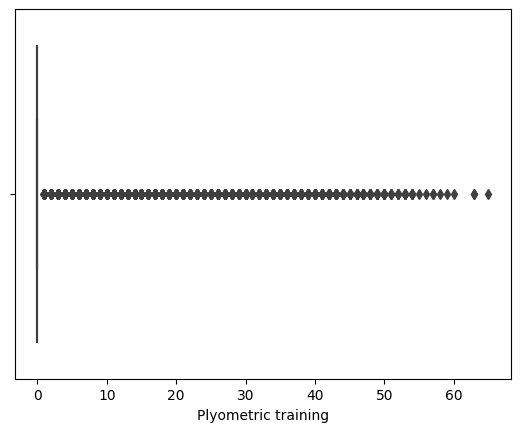

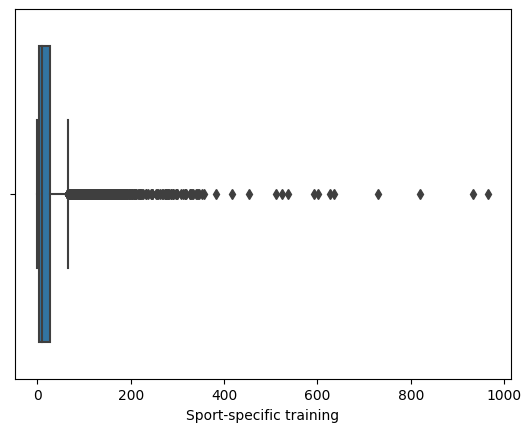

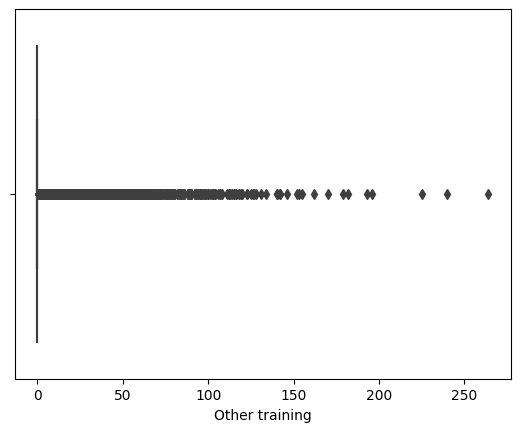

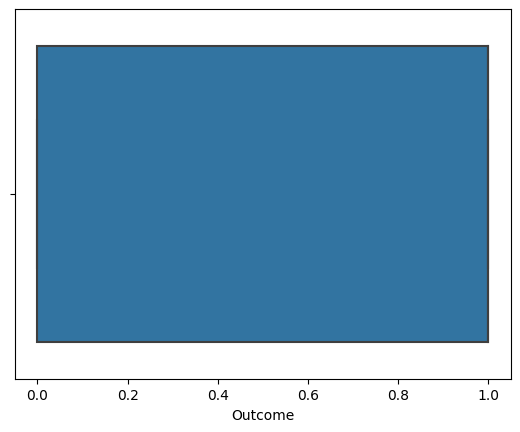

In [ ]:
#Creating boxplots for numerical variables

for col in data_train_nocat:
    fig= sns.boxplot(x=col, data = data_train_nocat)
    plt.show()

## Skewness Detection

In [ ]:
data_train_nocat.skew()

RecordID                    0.007411
Edition                    -0.230253
Athlete Id                  2.432872
Previous attempts           3.910222
Athlete score               1.182874
Train bf competition        4.543343
Strength training           3.124692
Sand training              35.498272
Recovery                    6.349221
Supplements                 3.519758
Cardiovascular training     5.559093
Squad training              7.064310
Physiotherapy               5.624916
Plyometric training         3.845004
Sport-specific training     7.124256
Other training              5.803005
Outcome                    -0.392536
dtype: float64

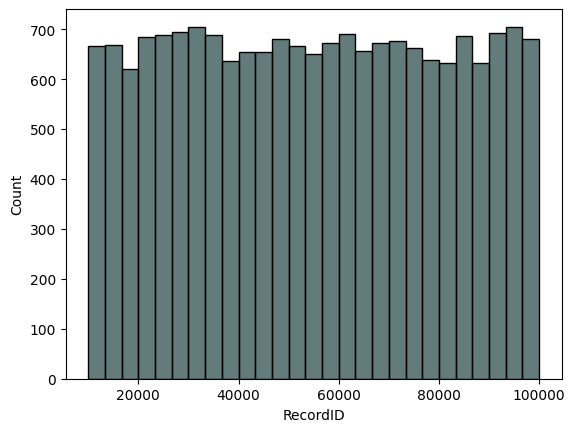

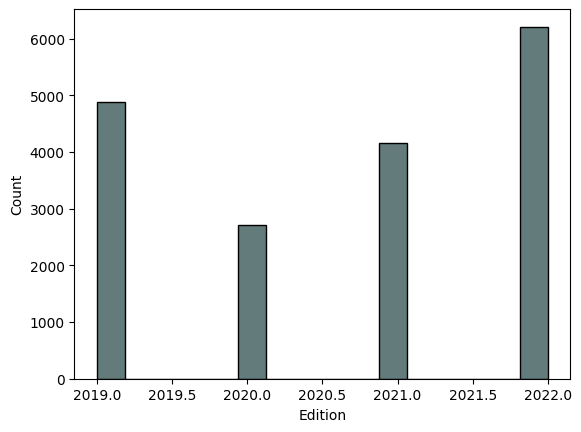

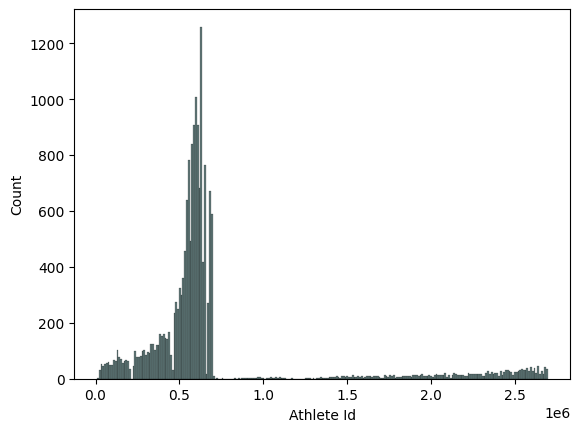

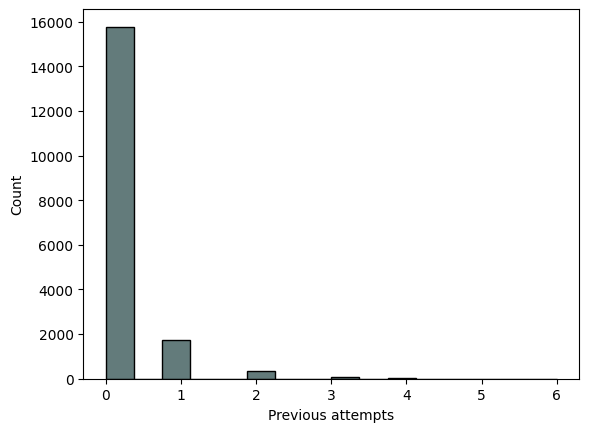

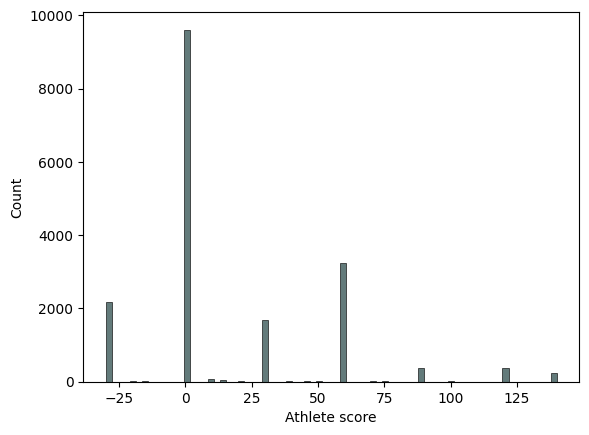

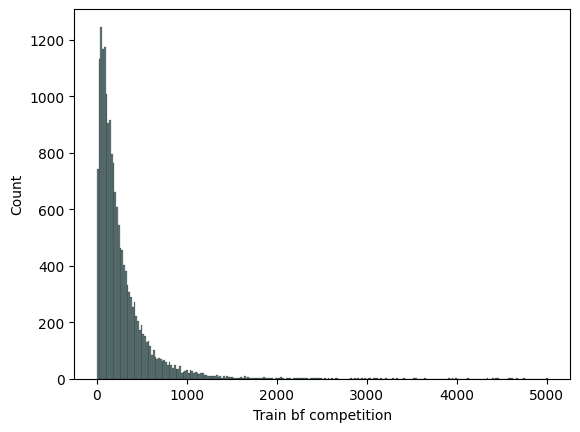

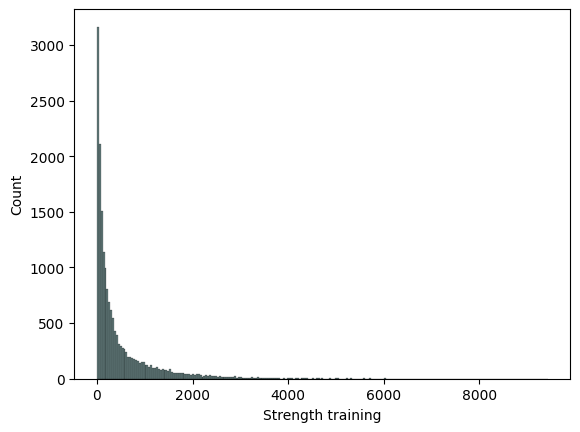

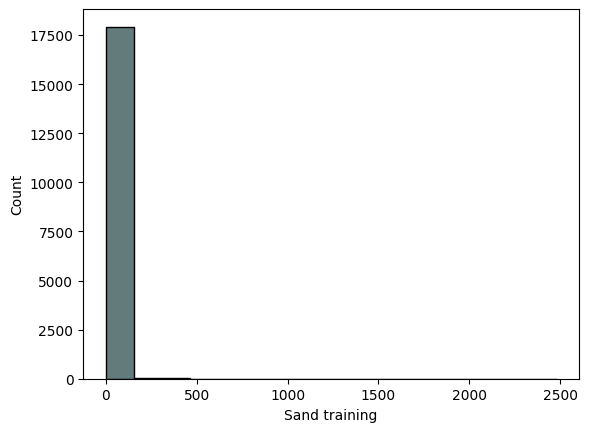

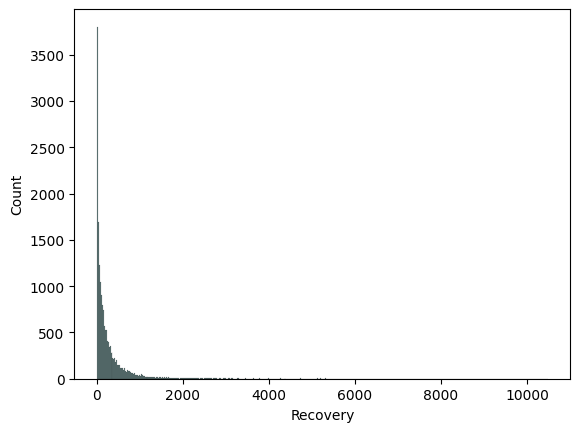

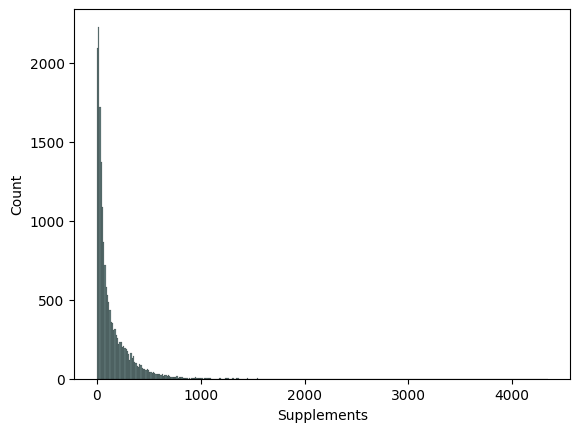

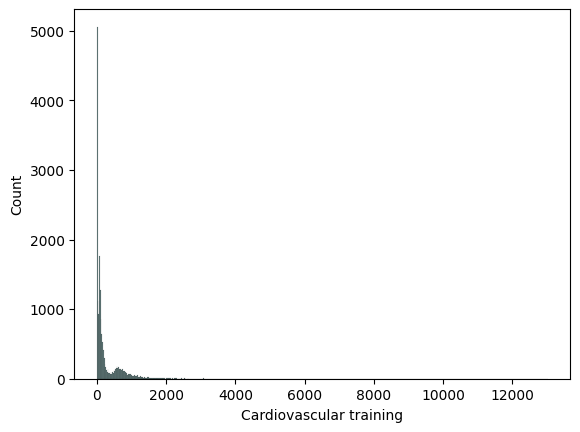

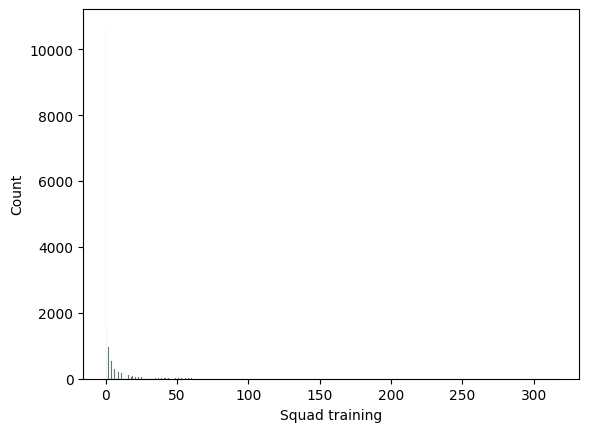

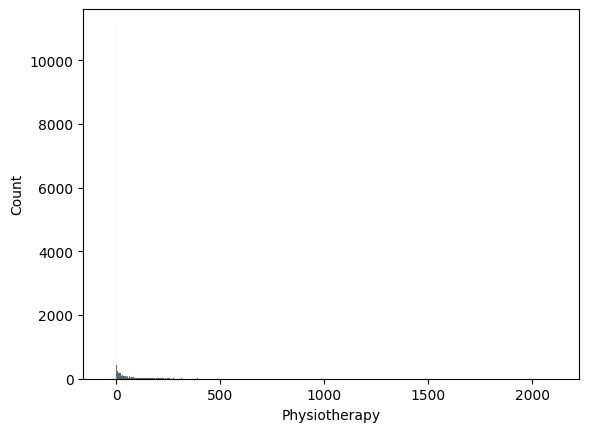

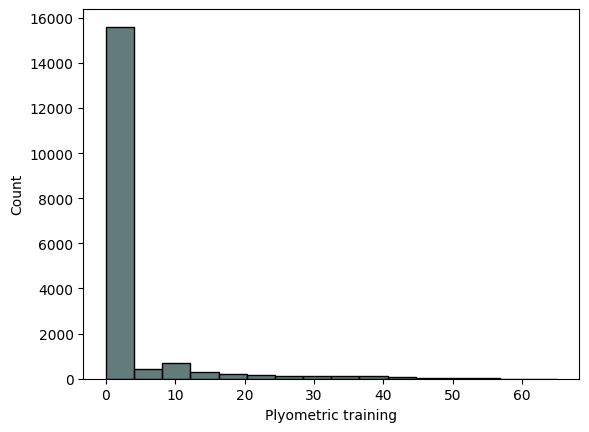

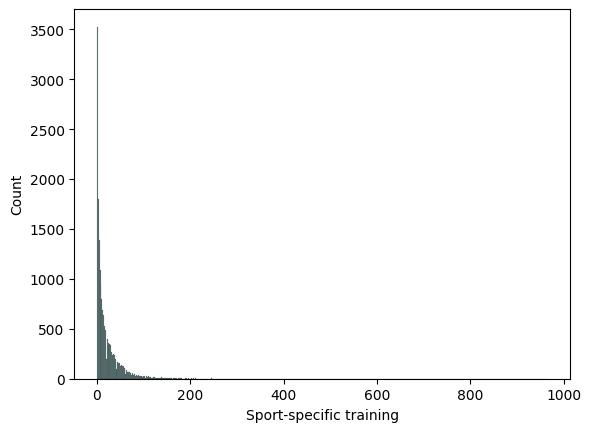

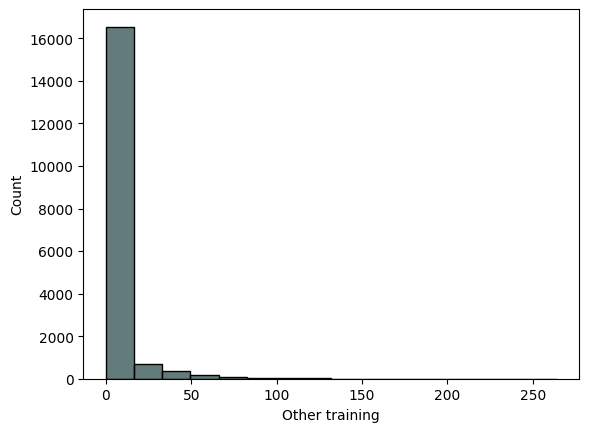

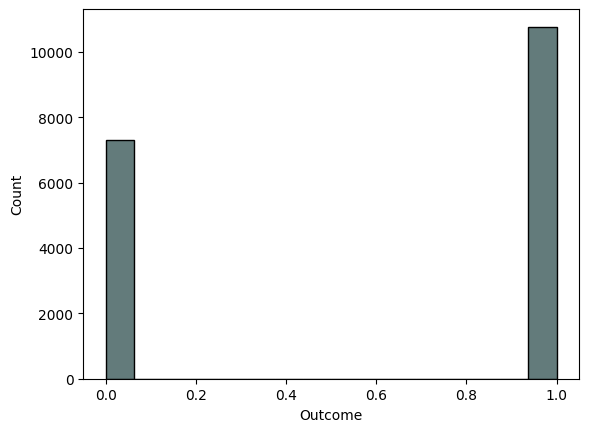

In [ ]:
#Checking skewed data for train dataset
for col in data_train_nocat:
  sns.histplot(data = data_train_nocat, x = col, color='darkslategrey')
  plt.show()

**OUTCOME COUNTLOT**

<Axes: xlabel='Outcome', ylabel='count'>

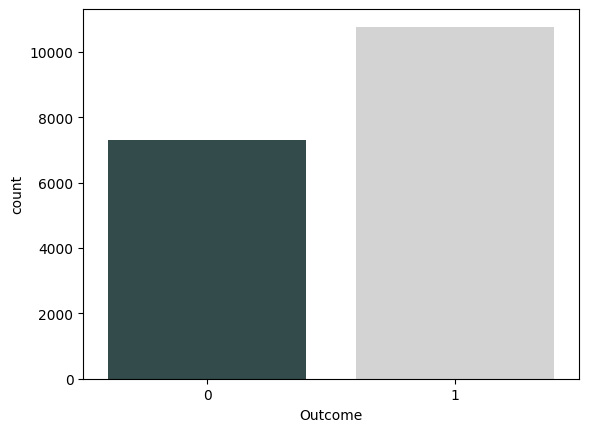

In [ ]:
#Validating if the dependent variable Outcome is balanced by using the method sns.countplot.
sns.countplot(x='Outcome', data=data_train, palette=["darkslategrey","lightgrey"])

# Data Split

In [ ]:
# We split the data before pre-processing, since this is one of the first steps of machine learning projects, so that the evaluation of our models doesn't get biased.

In [ ]:
#Creating an object named data that contains the independent variables and another object named target that contains our dependent variable.
data = data_train_copy.loc[:, data_train_copy.columns != 'Outcome']
target = data_train_copy['Outcome']

In [ ]:
#Spliting our dataset into train and validation. We divided the data into X_train and X_val, and the target into y_train and y_val.
X_train, X_val, y_train, y_val = train_test_split(data,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 15,
                                                    shuffle = True,
                                                    stratify = target
                                                   )

In [ ]:
#Merging X_train and y_train using the concat method.
wac_train = pd.concat([X_train,y_train],axis = 1, join = 'inner')
wac_train

RecordID               Competition  Edition  Athlete Id Sex  \
17307     64499  Continental Championship   2022.0    657194.0   M   
16800     48535         Federation League   2019.0    587989.0   M   
4643      54527  Continental Championship   2019.0    507844.0   M   
13233     63101       Regional Tournament   2022.0    397414.0   F   
3208      63549               Local Match   2019.0    590701.0   M   
...         ...                       ...      ...         ...  ..   
14693     83200  Continental Championship   2019.0     96873.0   M   
15183     28035       Regional Tournament   2020.0    560012.0   F   
16572     74131               Local Match   2019.0    593492.0   M   
14956     75806         Federation League   2022.0    511676.0   M   
15979     63104               Local Match   2022.0    685708.0   F   

                Region          Education Age group       Income Disability  \
17307  Southern Africa  University Degree     35-55         High      False   
16800        East Asia        High school      0-35         High      False   
4643       Middle East        High school      0-35       Middle       True   
13233   Eastern Europe        High school      0-35       Middle       True   
3208        South Asia        High school     35-55         High       True   
...                ...                ...       ...          ...        ...   
14693  Northern Africa        High school      0-35  Middle-High      False   
15183     Central Asia      Middle school      0-35          Low      False   
16572        East Asia        High school      0-35   Middle-Low      False   
14956    North America  University Degree     35-55   Middle-Low      False   
15979    South America        High school      0-35          Low      False   

       ...  Cardiovascular training Outdoor Workout Squad training  \
17307  ...                    199.0           False            5.0   
16800  ...                     66.0           False           20.0   
4643   ...                     98.0           False            1.0   
13233  ...                     52.0           False            0.0   
3208   ...                    655.0           False            6.0   
...    ...                      ...             ...            ...   
14693  ...                     94.0           False            1.0   
15183  ...                     29.0           False            0.0   
16572  ...                    631.0           False            3.0   
14956  ...                      4.0           False            5.0   
15979  ...                    742.0            True            4.0   

       Physiotherapy Plyometric training  No coach  Sport-specific training  \
17307          273.0                 0.0     False                    109.0   
16800          141.0                 0.0     False                      NaN   
4643            25.0                 0.0     False                     21.0   
13233            0.0                 3.0     False                      2.0   
3208            21.0                15.0     False                     27.0   
...              ...                 ...       ...                      ...   
14693            0.0                 0.0     False                     16.0   
15183            0.0                 0.0     False                      1.0   
16572            3.0                 0.0     False                      8.0   
14956            0.0                 0.0     False                     17.0   
15979            4.0                 0.0     False                      9.0   

       Other training  Past injuries  Outcome  
17307             1.0          False        1  
16800             0.0           True        1  
4643              0.0          False        1  
13233             0.0          False        1  
3208             23.0           True        1  
...               ...            ...      ...  
14693             5.0           True        0  
15183             0.0          False       

In [ ]:
#Merging X_val and y_val using the concat method.
wac_val = pd.concat([X_val,y_val],axis = 1, join = 'inner')
wac_val

RecordID               Competition  Edition  Athlete Id Sex  \
2907      46466               Local Match   2022.0    643653.0   F   
7484      38780         Federation League   2019.0    588482.0   M   
10670     25112         Federation League   2022.0    336213.0   M   
10742     33286               Local Match   2022.0    143755.0   F   
12518     81576         Federation League   2019.0    507285.0   M   
...         ...                       ...      ...         ...  ..   
1109      43496              National Cup   2022.0    622935.0   M   
9881      48331  Continental Championship   2021.0    632459.0   M   
3631      45167       Regional Tournament   2021.0    626951.0   F   
16696     34426              National Cup   2022.0    550393.0   M   
10652     29908  Continental Championship   2022.0    690439.0   M   

                Region      Education Age group      Income Disability  ...  \
2907         East Asia    High school      0-35      Middle       True  ...   
7484        South Asia    High school      0-35  Middle-Low      False  ...   
10670  Central America    High school      0-35  Middle-Low      False  ...   
10742     Central Asia  Middle school     35-55      Middle      False  ...   
12518   Eastern Europe    High school     35-55  Middle-Low      False  ...   
...                ...            ...       ...         ...        ...  ...   
1109     South America  Middle school      0-35  Middle-Low      False  ...   
9881     South America    High school      0-35        High      False  ...   
3631   Central America    High school     35-55        High      False  ...   
16696  Southern Europe  Middle school      0-35  Middle-Low      False  ...   
10652       South Asia  Middle school      0-35        High      False  ...   

       Cardiovascular training Outdoor Workout Squad training  Physiotherapy  \
2907                    1001.0            True            9.0           14.0   
7484                       9.0           False           36.0           83.0   
10670                      9.0           False            9.0            0.0   
10742                   1122.0            True           35.0           55.0   
12518                     33.0           False           59.0          203.0   
...                        ...             ...            ...            ...   
1109                     859.0           False            NaN            0.0   
9881                     100.0           False            7.0          107.0   
3631                      70.0           False            0.0            0.0   
16696                     72.0           False            0.0            0.0   
10652                    135.0           False            1.0            0.0   

      Plyometric training  No coach  Sport-specific training  Other training  \
2907                 19.0     False                     37.0             0.0   
7484                  0.0     False                     13.0             0.0   
10670                 0.0     False                     17.0             0.0   
10742                11.0     False                     49.0             2.0   
12518                 0.0     False                     70.0             0.0   
...                   ...       ...                      ...             ...   
1109                  0.0     False                     21.0             0.0   
9881                  0.0     False                     26.0             1.0   
3631                  0.0     False                     17.0             0.0   
16696                 0.0     False                      7.0             0.0   
10652                 0.0     False                      6.0             1.0   

       Past injuries  Outcome  
2907            True        1  
7484            True        1  
10670           True        1  
10742           True        1  
12518           True        1  
...              ...      ...  
1109           False        1  
9881           False        1  
3631   

#Data Pre-processing

## Check for Duplicates

In [ ]:
#checking for duplicates in wac_train using the duplicated method
wac_train[wac_train.duplicated(keep=False)]

Empty DataFrame
Columns: [RecordID, Competition, Edition, Athlete Id, Sex, Region, Education, Age group, Income, Disability, Previous attempts, Late enrollment, Cancelled enrollment, Athlete score, Mental preparation, Train bf competition, Strength training, Sand training, Recovery, Supplements, Cardiovascular training, Outdoor Workout, Squad training, Physiotherapy, Plyometric training, No coach, Sport-specific training, Other training, Past injuries, Outcome]
Index: []

[0 rows x 30 columns]

In [ ]:
#checking for duplicates in wac_val using the duplicated method
wac_val[wac_val.duplicated(keep=False)]


Empty DataFrame
Columns: [RecordID, Competition, Edition, Athlete Id, Sex, Region, Education, Age group, Income, Disability, Previous attempts, Late enrollment, Cancelled enrollment, Athlete score, Mental preparation, Train bf competition, Strength training, Sand training, Recovery, Supplements, Cardiovascular training, Outdoor Workout, Squad training, Physiotherapy, Plyometric training, No coach, Sport-specific training, Other training, Past injuries, Outcome]
Index: []

[0 rows x 30 columns]

In [ ]:
#checking for duplicates in wac_test using the duplicated method
wac_test[wac_test.duplicated(keep=False)]

Empty DataFrame
Columns: [RecordID, Competition, Edition, Athlete Id, Sex, Region, Education, Age group, Income, Disability, Previous attempts, Late enrollment, Cancelled enrollment, Athlete score, Mental preparation, Train bf competition, Strength training, Sand training, Recovery, Supplements, Cardiovascular training, Outdoor Workout, Squad training, Physiotherapy, Plyometric training, No coach, Sport-specific training, Other training, Past injuries]
Index: []

[0 rows x 29 columns]

## Set RecordID variable as Index

In [ ]:
#Set RecordID variable as Index
wac_train.set_index('RecordID', inplace=True)
wac_val.set_index('RecordID', inplace=True)
wac_test.set_index('RecordID', inplace=True)

## Handling Incoherences


In [ ]:
# For the categorical variables, we are going to check if there are any errors or incoherent values in the columns by analyzing the value counts.
# For the numerical ones, we are going to check the maximum and the minimumum values.

**Age Group**

In [ ]:
#Checking the value counts for Age group
wac_train['Age group'].value_counts()

0-35     9956
35-55    4288
55<=      102
0          16
Name: Age group, dtype: int64

In [ ]:
#Checking the value counts for Age group
wac_val['Age group'].value_counts()

0-35     2514
35-55    1037
55<=       32
0           7
Name: Age group, dtype: int64

In [ ]:
#Checking the value counts for Age group
wac_test['Age group'].value_counts()

0-35     5350
35-55    2337
55<=       51
Name: Age group, dtype: int64

In [ ]:
#Incoherence 1 - Age Group

wac_train['Age group'].replace('55<=', '55>=', inplace = True)
wac_train['Age group'].replace('0', None, inplace = True)

wac_train['Age group'].value_counts()

0-35     9956
35-55    4288
55>=      102
Name: Age group, dtype: int64

In [ ]:
wac_val['Age group'].replace('55<=', '55>=', inplace = True)
wac_val['Age group'].replace('0', None, inplace = True)

wac_val['Age group'].value_counts()

0-35     2514
35-55    1037
55>=       32
Name: Age group, dtype: int64

In [ ]:
wac_test['Age group'].replace('55<=', '55>=', inplace = True)
wac_test['Age group'].value_counts()

0-35     5350
35-55    2337
55>=       51
Name: Age group, dtype: int64

**Athlete Score**

In [ ]:
#Checking the maximum and minimum values for Athlete score
wac_train['Athlete score'].min(), wac_train['Athlete score'].max()

(-30.0, 140.0)

In [ ]:
#Incoherence 2 - Athlete score
#We believe that it doesn't make sense to have a negative athlete score, so we applied the absolute value function and convert negative values to positive values .
wac_train['Athlete score'] = abs(wac_train['Athlete score'])
wac_val['Athlete score'] = abs(wac_val['Athlete score'])
wac_test['Athlete score'] = abs(wac_test['Athlete score'])


In [ ]:
#Checking if the Incoherence is now corrected
wac_train['Athlete score'].min(), wac_train['Athlete score'].max()

(0.0, 140.0)

**Cancelled enrollment**

In [ ]:
#Checking the value counts for Cancelled enrollment
wac_train['Cancelled enrollment'].value_counts()
#No incoherences

False    11744
True      2633
Name: Cancelled enrollment, dtype: int64

In [ ]:
#Checking the value counts for Cancelled enrollment
wac_val['Cancelled enrollment'].value_counts()
#No incoherences

False    2942
True      648
Name: Cancelled enrollment, dtype: int64

In [ ]:
#Checking the value counts for Cancelled enrollment
wac_test['Cancelled enrollment'].value_counts()
#No incoherences

False    6379
True     1359
Name: Cancelled enrollment, dtype: int64

**Cardiovascular Training**

In [ ]:
#Checking the maximum and minimum values for Cardiovascular training
wac_train['Cardiovascular training'].min(), wac_train['Cardiovascular training'].max()
#No Incoherences

(0.0, 13032.0)

In [ ]:
#Checking the maximum and minimum values for Cardiovascular training
wac_val['Cardiovascular training'].min(), wac_val['Cardiovascular training'].max()
#No Incoherences

(0.0, 5897.0)

In [ ]:
#Checking the maximum and minimum values for Cardiovascular training
wac_test['Cardiovascular training'].min(), wac_test['Cardiovascular training'].max()
#No Incoherences

(0.0, 11117.0)

**Competition**

In [ ]:
#Checking the value counts for Competition
wac_train['Competition'].value_counts()
#No Incoherences

Local Match                 3533
Regional Tournament         3377
Federation League           2744
National Cup                1870
Continental Championship    1254
World Championship          1191
Olympic Games                405
Name: Competition, dtype: int64

In [ ]:
#Checking the value counts for Competition
wac_val['Competition'].value_counts()
#No Incoherences

Local Match                 871
Regional Tournament         848
Federation League           673
National Cup                503
Continental Championship    343
World Championship          263
Olympic Games                93
Name: Competition, dtype: int64

In [ ]:
#Checking the value counts for Competition
wac_test['Competition'].value_counts()
#No Incoherences

Local Match                 1860
Regional Tournament         1813
Federation League           1497
National Cup                1024
Continental Championship     689
World Championship           648
Olympic Games                207
Name: Competition, dtype: int64

**Disability**

In [ ]:
#Checking the value counts for Disability
wac_train['Disability'].value_counts()
#No Incoherences

False    13034
True      1338
Name: Disability, dtype: int64

In [ ]:
#Checking the value counts for Disability
wac_val['Disability'].value_counts()
#No Incoherences

False    3264
True      330
Name: Disability, dtype: int64

In [ ]:
#Checking the value counts for Disability
wac_test['Disability'].value_counts()
#No Incoherences

False    7002
True      736
Name: Disability, dtype: int64

**Edition**

In [ ]:
#Checking the value counts for Edition
wac_train['Edition'].value_counts()
#No Incoherences

2022.0    4954
2019.0    3914
2021.0    3327
2020.0    2172
Name: Edition, dtype: int64

In [ ]:
#Checking the value counts for Edition
wac_val['Edition'].value_counts()
#No Incoherences

2022.0    1259
2019.0     968
2021.0     826
2020.0     539
Name: Edition, dtype: int64

In [ ]:
#Checking the value counts for Edition
wac_test['Edition'].value_counts()
#No Incoherences

2022    2677
2019    2174
2021    1807
2020    1080
Name: Edition, dtype: int64

**Education**

In [ ]:
#Checking the value counts for Education
wac_train['Education'].value_counts()
#No Incoherences

High school          6460
Middle school        5443
University Degree    2197
Post Graduate         144
Elementary school     124
Name: Education, dtype: int64

In [ ]:
#Checking the value counts for Education
wac_val['Education'].value_counts()
#No Incoherences

High school          1599
Middle school        1312
University Degree     610
Post Graduate          41
Elementary school      30
Name: Education, dtype: int64

In [ ]:
#Checking the value counts for Education
wac_test['Education'].value_counts()
#No Incoherences

High school          3379
Middle school        3028
University Degree    1163
Post Graduate          93
Elementary school      75
Name: Education, dtype: int64

**Income**

In [ ]:
#Checking the value counts for Income
wac_train['Income'].value_counts()
#No Incoherences

High           4288
Middle-Low     3089
Low            2856
Middle         2835
Middle-High    1304
Name: Income, dtype: int64

In [ ]:
#Checking the value counts for Income
wac_val['Income'].value_counts()
#No Incoherences

High           1107
Middle-Low      755
Middle          713
Low             685
Middle-High     333
Name: Income, dtype: int64

In [ ]:
#Checking the value counts for Income
wac_test['Income'].value_counts()
#No Incoherences

High           2349
Middle-Low     1656
Middle         1528
Low            1471
Middle-High     734
Name: Income, dtype: int64

**Late enrollment**

In [ ]:
#Checking the value counts for Late enrollment
wac_train['Late enrollment'].value_counts()
#No Incoherences

False    14265
True       109
Name: Late enrollment, dtype: int64

In [ ]:
#Checking the value counts for Late enrollment
wac_val['Late enrollment'].value_counts()
#No Incoherences

False    3565
True       30
Name: Late enrollment, dtype: int64

In [ ]:
#Checking the value counts for Late enrollment
wac_test['Late enrollment'].value_counts()
#No Incoherences

False    7675
True       63
Name: Late enrollment, dtype: int64

**Mental Preparation**

In [ ]:
#Checking the value counts for Mental Preparation
wac_train['Mental preparation'].value_counts()

FALSE    13221
TRUE      1080
FASE        78
Name: Mental preparation, dtype: int64

In [ ]:
#Incoherence 3 (a) - Mental Preparation
wac_train['Mental preparation'].replace('FASE', 'False', inplace = True)
wac_train['Mental preparation'].replace('FALSE', 'False', inplace = True)
wac_train['Mental preparation'].replace('TRUE', 'True', inplace = True)
wac_train['Mental preparation'].value_counts()

False    13299
True      1080
Name: Mental preparation, dtype: int64

In [ ]:
#Checking the value counts for Mental Preparation
wac_val['Mental preparation'].value_counts()

FALSE    3298
TRUE      280
FASE       21
Name: Mental preparation, dtype: int64

In [ ]:
#Incoherence 3 (b) - Mental Preparation
wac_val['Mental preparation'].replace('FASE', 'False', inplace = True)
wac_val['Mental preparation'].replace('FALSE', 'False', inplace = True)
wac_val['Mental preparation'].replace('TRUE', 'True', inplace = True)
wac_val['Mental preparation'].value_counts()

False    3319
True      280
Name: Mental preparation, dtype: int64

In [ ]:
#Checking the value counts for Mental Preparation
wac_test['Mental preparation'].value_counts()
#No Incoherences

False    7171
True      567
Name: Mental preparation, dtype: int64

**No coach**

In [ ]:
#Checking the value counts for No coach
wac_train['No coach'].value_counts()
#No Incoherences

False    14378
True         2
Name: No coach, dtype: int64

In [ ]:
#Checking the value counts for No coach
wac_val['No coach'].value_counts()
#No Incoherences

False    3591
Name: No coach, dtype: int64

In [ ]:
#Checking the value counts for No coach
wac_test['No coach'].value_counts()
#No Incoherences

False    7737
True        1
Name: No coach, dtype: int64

**Other training**

In [ ]:
#Checking the maximum and minimum values for Other training
wac_train['Other training'].min(), wac_train['Other training'].max()
#No Incoherences

(0.0, 264.0)

In [ ]:
#Checking the maximum and minimum values for Other training
wac_val['Other training'].min(), wac_val['Other training'].max()
#No Incoherences

(0.0, 240.0)

In [ ]:
#Checking the maximum and minimum values for Other training
wac_test['Other training'].min(), wac_test['Other training'].max()
#No Incoherences

(0.0, 387.0)

**Outcome**

In [ ]:
#Checking the value counts for Outcome
wac_train['Outcome'].value_counts()
#No Incoherences

1    8613
0    5831
Name: Outcome, dtype: int64

In [ ]:
#Checking the value counts for Outcome
wac_val['Outcome'].value_counts()
#No Incoherences

1    2153
0    1458
Name: Outcome, dtype: int64

**Outdoor Workout**

In [ ]:
#Checking the value counts for Outdoor Workout
wac_train['Outdoor Workout'].value_counts()
#No Incoherences

False    13417
True       964
Name: Outdoor Workout, dtype: int64

In [ ]:
#Checking the value counts for Outdoor Workout
wac_val['Outdoor Workout'].value_counts()
#No Incoherences

False    3360
True      230
Name: Outdoor Workout, dtype: int64

In [ ]:
#Checking the value counts for Outdoor Workout
wac_test['Outdoor Workout'].value_counts()
#No Incoherences

False    7218
True      520
Name: Outdoor Workout, dtype: int64

**Past injuries**

In [ ]:
#Checking the value counts for Past injuries
wac_train['Past injuries'].value_counts()
#No Incoherences

True     7897
False    6456
Name: Past injuries, dtype: int64

In [ ]:
#Checking the value counts for Past injuries
wac_val['Past injuries'].value_counts()
#No Incoherences

True     1975
False    1622
Name: Past injuries, dtype: int64

In [ ]:
#Checking the value counts for Past injuries
wac_test['Past injuries'].value_counts()
#No Incoherences

True     4201
False    3537
Name: Past injuries, dtype: int64

**Physiotherapy**

In [ ]:
#Checking the maximum and minimum values for Physiotherapy
wac_train['Physiotherapy'].min(), wac_train['Physiotherapy'].max()

(-50.0, 2117.0)

In [ ]:
#Incoherence 4 - Physiotherapy
#It's not possible to have a negative number of physiotherapy sessions
#We applied the absolute value function and convert negative values into positive values
wac_train['Physiotherapy'] = abs(wac_train['Physiotherapy'])
wac_val['Physiotherapy'] = abs(wac_val['Physiotherapy'])
wac_test['Physiotherapy'] = abs(wac_test['Physiotherapy'])

In [ ]:
#Checking the maximum and minimum values for Physiotherapy
wac_train['Physiotherapy'].min(), wac_train['Physiotherapy'].max()

(0.0, 2117.0)

In [ ]:
#Checking the maximum and minimum values for Physiotherapy
wac_val['Physiotherapy'].min(), wac_val['Physiotherapy'].max()

(0.0, 1045.0)

In [ ]:
#Checking the maximum and minimum values for Physiotherapy
wac_test['Physiotherapy'].min(), wac_test['Physiotherapy'].max()

(0.0, 1637.0)

**Plyometric training**

In [ ]:
#Checking the maximum and minimum values for Plyometric training
wac_train['Plyometric training'].min(), wac_train['Plyometric training'].max()
#No Incoherences

(0.0, 65.0)

In [ ]:
#Checking the maximum and minimum values for Plyometric training
wac_val['Plyometric training'].min(), wac_val['Plyometric training'].max()
#No Incoherences

(0.0, 63.0)

In [ ]:
#Checking the maximum and minimum values for Plyometric training
wac_test['Plyometric training'].min(), wac_test['Plyometric training'].max()
#No Incoherences

(0.0, 89.0)

**Previous attempts**

In [ ]:
#Checking the maximum and minimum values for Previous attempts
wac_train['Previous attempts'].min(), wac_train['Previous attempts'].max()
#No Incoherences

(0.0, 6.0)

In [ ]:
#Checking the maximum and minimum values for Previous attempts
wac_val['Previous attempts'].min(), wac_val['Previous attempts'].max()
#No Incoherences

(0.0, 6.0)

In [ ]:
#Checking the maximum and minimum values for Previous attempts
wac_test['Previous attempts'].min(), wac_test['Previous attempts'].max()
#No Incoherences

(0, 5)

**Recovery**

In [ ]:
#Checking the maximum and minimum values for Recovery
wac_train['Recovery'].min(), wac_train['Recovery'].max()
#No Incoherences

(0.0, 10483.0)

In [ ]:
#Checking the maximum and minimum values for Recovery
wac_val['Recovery'].min(), wac_val['Recovery'].max()
#No Incoherences

(0.0, 9053.0)

In [ ]:
#Checking the maximum and minimum values for Recovery
wac_test['Recovery'].min(), wac_test['Recovery'].max()
#No Incoherences

(0.0, 13154.0)

**Region**

In [ ]:
#Checking the value counts for Region
wac_train['Region'].value_counts()
#No Incoherences

North America      1590
Western Europe     1490
East Asia          1415
South America      1336
Northern Africa    1218
Eastern Europe     1121
Middle East        1118
Central Asia       1035
Central America     965
Oceania             923
Southern Europe     834
South Asia          784
Southern Africa     542
Name: Region, dtype: int64

In [ ]:
#Checking the value counts for Region
wac_val['Region'].value_counts()
#No Incoherences

North America      411
Western Europe     365
South America      353
East Asia          352
Northern Africa    277
Eastern Europe     264
Middle East        256
Oceania            246
Central Asia       240
Central America    227
Southern Europe    219
South Asia         209
Southern Africa    163
Name: Region, dtype: int64

In [ ]:
#Checking the value counts for Region
wac_test['Region'].value_counts()
#No Incoherences

North America      820
Western Europe     781
East Asia          736
South America      719
Northern Africa    669
Middle East        574
Eastern Europe     569
Central Asia       548
Central America    538
Oceania            514
Southern Europe    498
South Asia         439
Southern Africa    333
Name: Region, dtype: int64

**Sand training**

In [ ]:
#Checking the maximum and minimum values for Sand training
wac_train['Sand training'].min(), wac_train['Sand training'].max()
#No Incoherences

(0.0, 2480.0)

In [ ]:
#Checking the maximum and minimum values for Sand training
wac_val['Sand training'].min(), wac_val['Sand training'].max()
#No Incoherences

(0.0, 874.0)

In [ ]:
#Checking the maximum and minimum values for Sand training
wac_test['Sand training'].min(), wac_test['Sand training'].max()
#No Incoherences

(0.0, 2952.0)

**Sex**

In [ ]:
#Checking the value counts for Sex
wac_train['Sex'].value_counts()
#No Incoherences

M    7858
F    6513
Name: Sex, dtype: int64

In [ ]:
#Checking the value counts for Sex
wac_val['Sex'].value_counts()
#No Incoherences

M    2020
F    1571
Name: Sex, dtype: int64

In [ ]:
#Checking the value counts for Sex
wac_test['Sex'].value_counts()
#No Incoherences

M    4262
F    3476
Name: Sex, dtype: int64

**Sport-specific training**

In [ ]:
#Checking the maximum and minimum values for Sport-specific training
wac_train['Sport-specific training'].min(), wac_train['Sport-specific training'].max()
#No Incoherences

(0.0, 966.0)

In [ ]:
#Checking the maximum and minimum values for Sport-specific training
wac_val['Sport-specific training'].min(), wac_val['Sport-specific training'].max()
#No Incoherences

(0.0, 729.0)

In [ ]:
#Checking the maximum and minimum values for Sport-specific training
wac_test['Sport-specific training'].min(), wac_test['Sport-specific training'].max()
#No Incoherences

(0.0, 2134.0)

**Squad training**

In [ ]:
#Checking the maximum and minimum values for Squad training
wac_train['Squad training'].min(), wac_train['Squad training'].max()
#No Incoherences

(0.0, 227.0)

In [ ]:
#Checking the maximum and minimum values for Squad training
wac_val['Squad training'].min(), wac_val['Squad training'].max()
#No Incoherences

(0.0, 316.0)

In [ ]:
#Checking the maximum and minimum values for Squad training
wac_test['Squad training'].min(), wac_test['Squad training'].max()
#No Incoherences

(0.0, 217.0)

**Strength training**

In [ ]:
#Checking the maximum and minimum values for Strength training
wac_train['Strength training'].min(), wac_train['Strength training'].max()
#No Incoherences

(0.0, 9438.0)

In [ ]:
#Checking the maximum and minimum values for Strength training
wac_val['Strength training'].min(), wac_val['Strength training'].max()
#No Incoherences

(0.0, 7240.0)

In [ ]:
#Checking the maximum and minimum values for Strength training
wac_test['Strength training'].min(), wac_test['Strength training'].max()
#No Incoherences

(0.0, 8410.0)

**Supplements**

In [ ]:
#Checking the maximum and minimum values for Suplements
wac_train['Supplements'].min(), wac_train['Supplements'].max()
#No Incoherences

(0.0, 2688.0)

In [ ]:
#Checking the maximum and minimum values for Suplements
wac_val['Supplements'].min(), wac_val['Supplements'].max()
#No Incoherences

(0.0, 4345.0)

In [ ]:
#Checking the maximum and minimum values for Suplements
wac_test['Supplements'].min(), wac_test['Supplements'].max()
#No Incoherences

(0.0, 2853.0)

**Train bf competition**

In [ ]:
#Checking the maximum and minimum values for Train bf competition
wac_train['Train bf competition'].min(), wac_train['Train bf competition'].max()
#No Incoherences

(0.0, 5012.0)

In [ ]:
#Checking the maximum and minimum values for Train bf competition
wac_val['Train bf competition'].min(), wac_val['Train bf competition'].max()
#No Incoherences

(1.0, 4391.0)

In [ ]:
#Checking the maximum and minimum values for Train bf competition
wac_test['Train bf competition'].min(), wac_test['Train bf competition'].max()
#No Incoherences

(0.0, 7277.0)

## Treating Outliers

In [ ]:
wac_train_nocat= wac_train[['Previous attempts', 'Athlete score', 'Train bf competition', 'Strength training', 'Sand training','Recovery', 'Supplements',
                         'Cardiovascular training', 'Squad training','Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]

print(wac_train_nocat)

          Previous attempts  Athlete score  Train bf competition  \
RecordID                                                           
64499                   0.0            0.0                 517.0   
48535                   0.0            0.0                1133.0   
54527                   0.0           30.0                 135.0   
63101                   2.0            0.0                 117.0   
63549                   0.0           30.0                 576.0   
...                     ...            ...                   ...   
83200                   0.0           30.0                  56.0   
28035                   0.0           60.0                  21.0   
74131                   0.0           60.0                 168.0   
75806                   0.0            0.0                 169.0   
63104                   0.0           60.0                 206.0   

          Strength training  Sand training  Recovery  Supplements  \
RecordID                                      

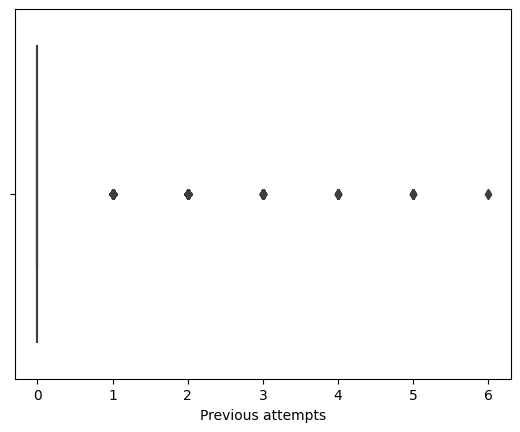

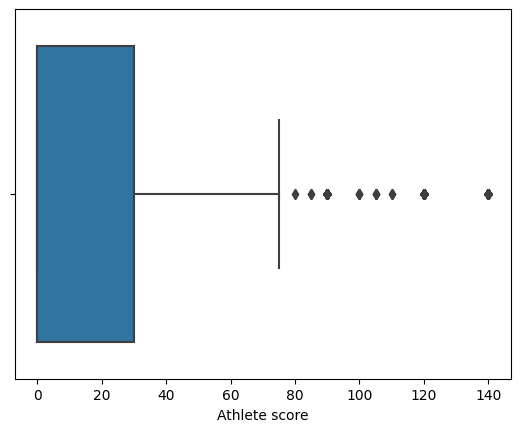

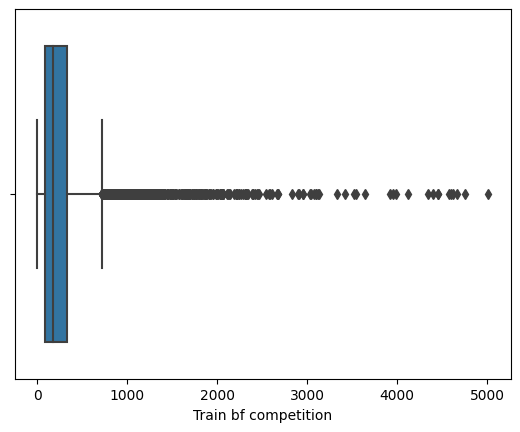

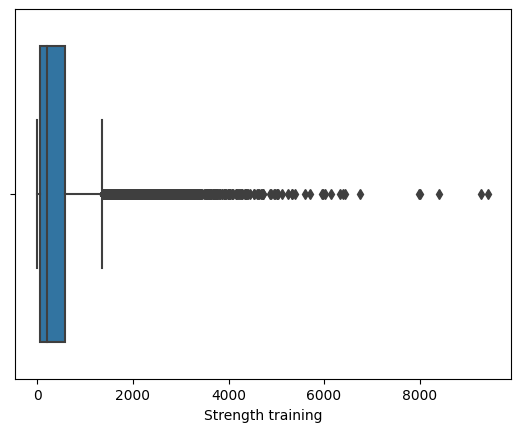

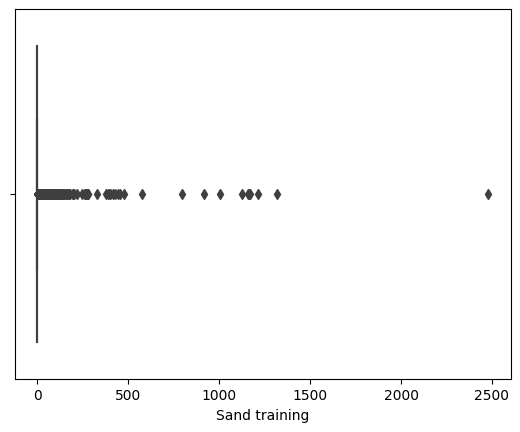

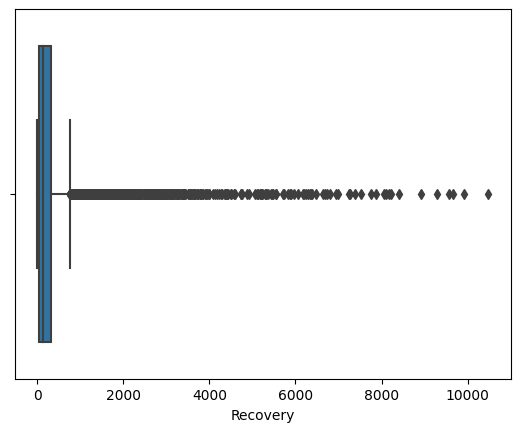

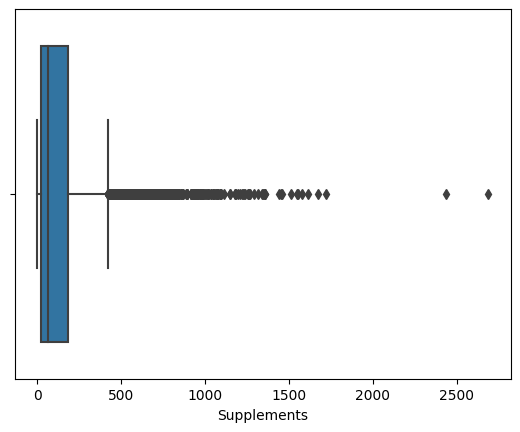

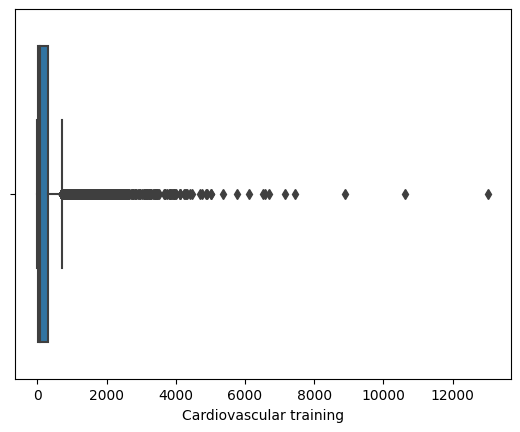

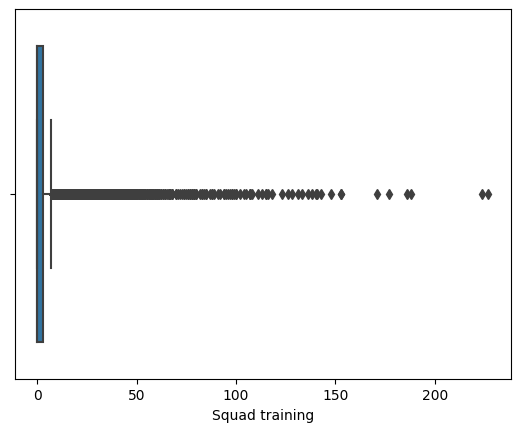

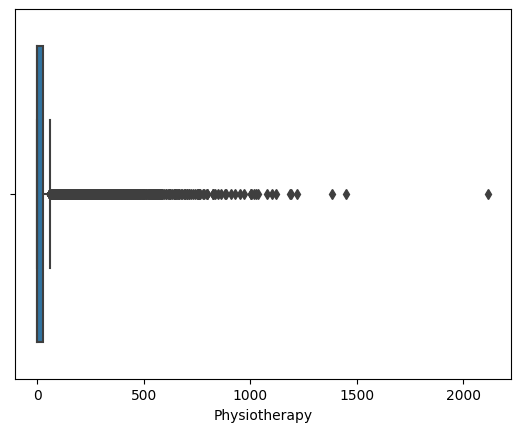

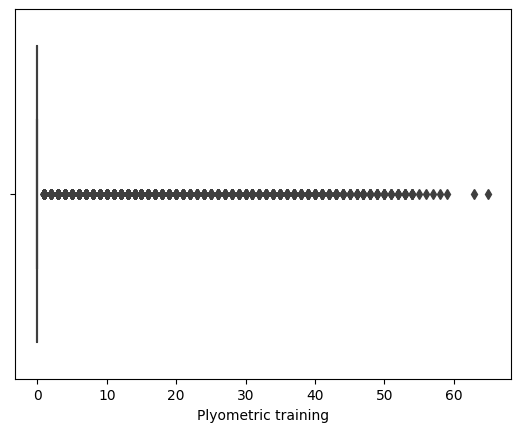

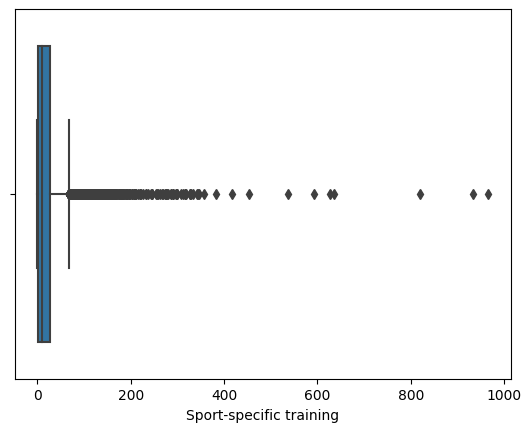

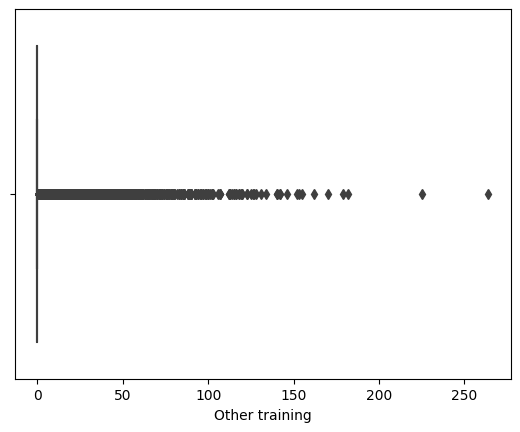

In [ ]:
for col in wac_train_nocat:
    fig= sns.boxplot(x=col, data = wac_train_nocat)
    plt.show()

In [ ]:
#Copying the dataset

wac_train_no_outliers = wac_train.copy()
wac_val_no_outliers = wac_val.copy()
wac_test_no_outliers = wac_test.copy()

In [ ]:
#Checking the shape of the dataset wac_train_no_outliers
wac_train_no_outliers.shape

(14444, 29)

In [ ]:
# Define columns to replace outliers for
cols = ['Athlete score', 'Train bf competition', 'Strength training', 'Recovery', 'Supplements',  'Cardiovascular training', 'Squad training','Physiotherapy', 'Sport-specific training']

# Loop through columns and replace outliers with lower or upper cutoff values
for col in cols:
    # Calculate IQR for the column
    q1, q3 = wac_train_no_outliers[col].quantile([0.25, 0.75])
    iqr = q3 - q1

    # Define upper and lower cutoff values
    lower_cutoff = q1 - 1.5 * iqr
    upper_cutoff = q3 + 1.5 * iqr

    # Replace outliers with lower or upper cutoff values
    wac_train_no_outliers[col] = np.where(wac_train_no_outliers[col] < lower_cutoff, lower_cutoff, wac_train_no_outliers[col])
    wac_train_no_outliers[col] = np.where(wac_train_no_outliers[col] > upper_cutoff, upper_cutoff, wac_train_no_outliers[col])

In [ ]:
#Treating outliers for Sand training
wac_train_no_outliers = wac_train_no_outliers[wac_train_no_outliers['Sand training'] < 500]
#Checking the shape
wac_train_no_outliers.shape

(14368, 29)

In [ ]:
#Treating outliers for Other training
wac_train_no_outliers = wac_train_no_outliers[wac_train_no_outliers['Other training'] < 100]
#Checking the shape
wac_train_no_outliers.shape

(14232, 29)

In [ ]:
#Treating outliers for Plyometric training
wac_train_no_outliers = wac_train_no_outliers[wac_train_no_outliers['Plyometric training'] < 40]
#Checking the shape
wac_train_no_outliers.shape

(14045, 29)

In [ ]:
#Creating a dataset with only the numerical variables to check the boxplots
#We just check the train dataset

wac_train_no_outliers_nocat = wac_train_no_outliers[['Previous attempts', 'Athlete score', 'Train bf competition', 'Strength training', 'Sand training','Recovery', 'Supplements',
                         'Cardiovascular training', 'Squad training','Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]

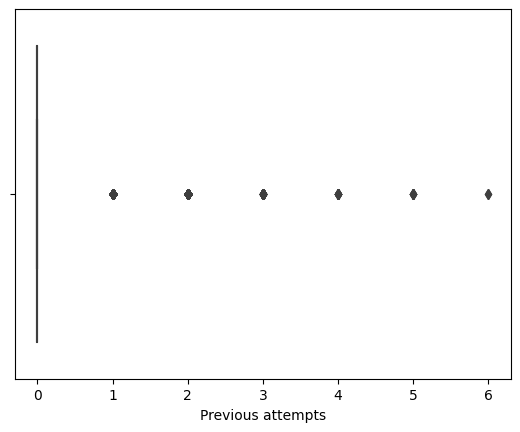

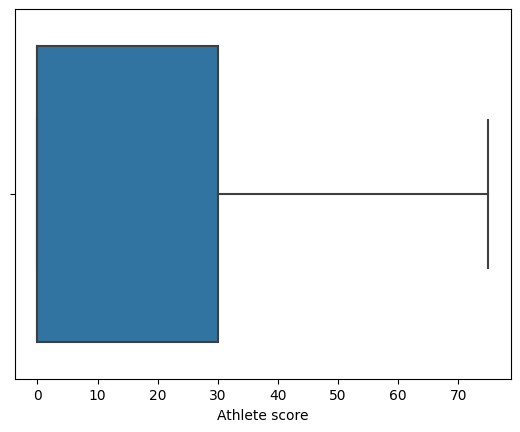

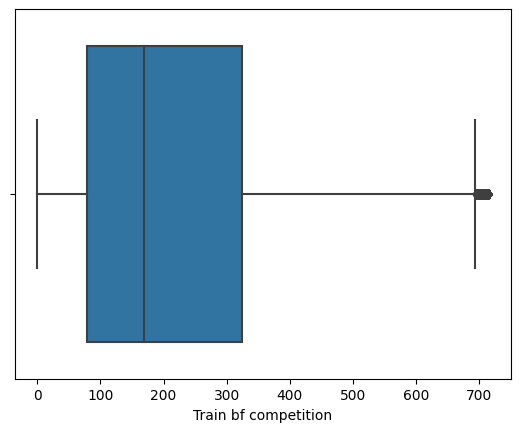

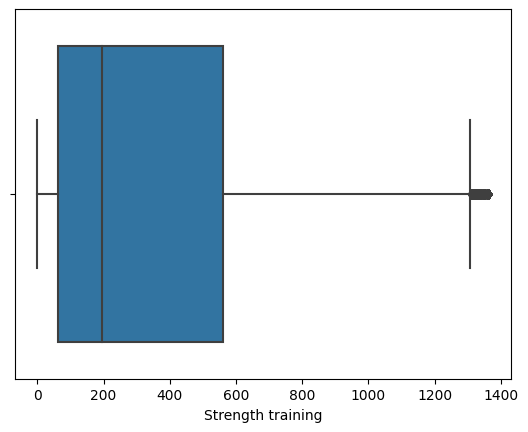

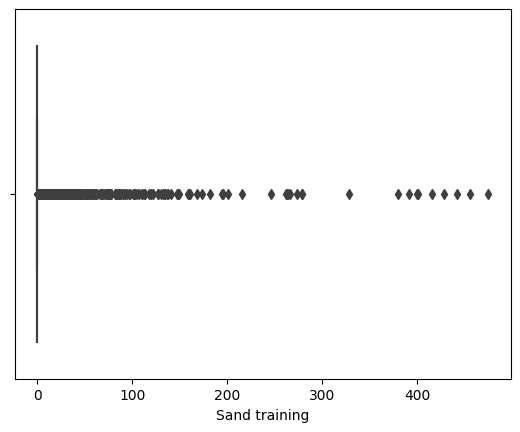

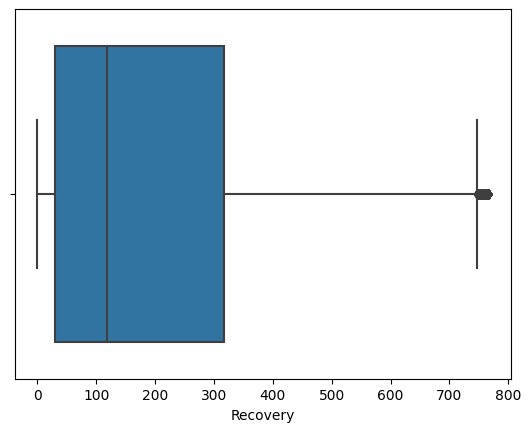

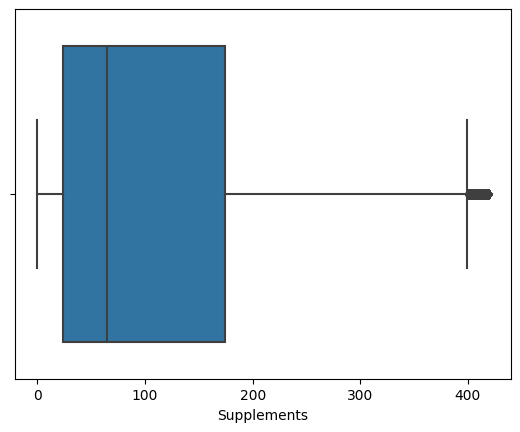

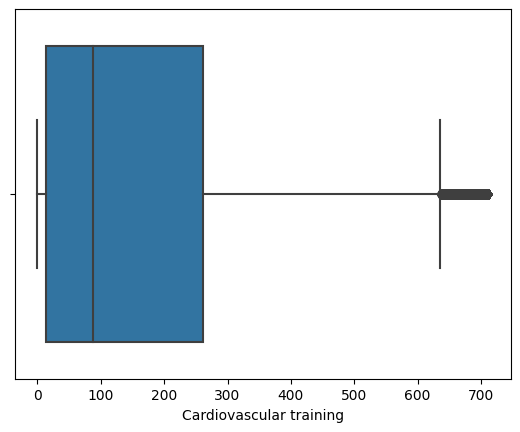

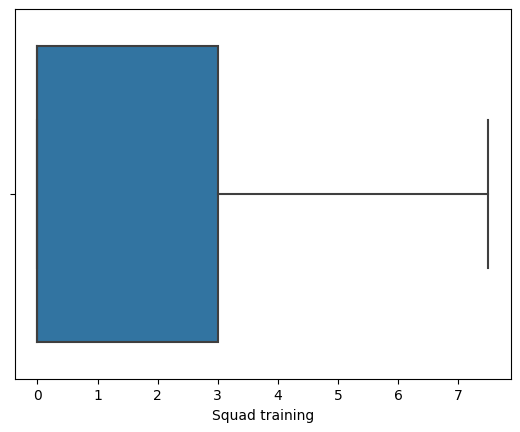

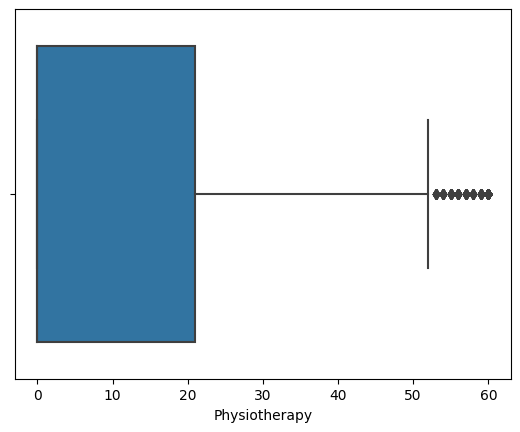

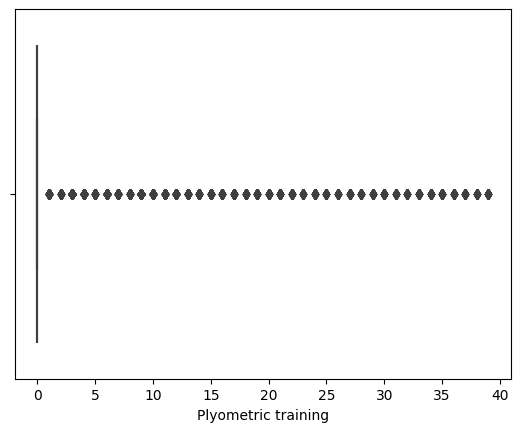

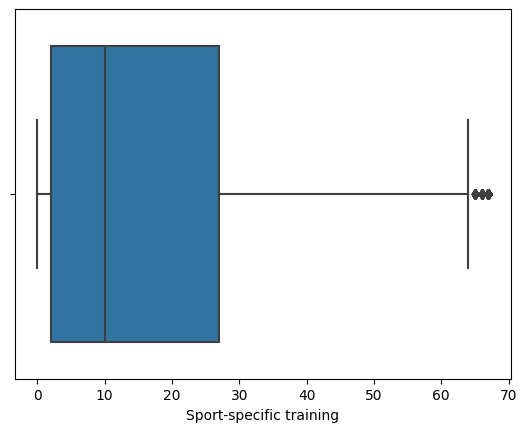

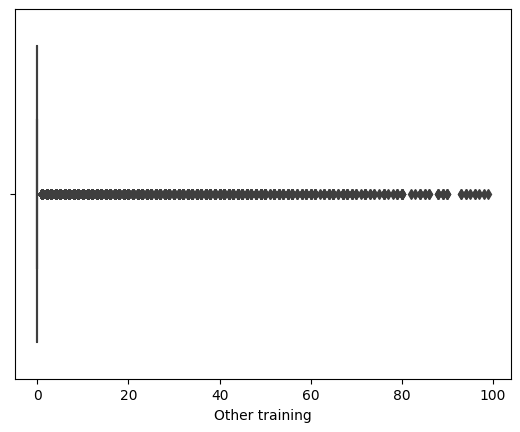

In [ ]:
for col in wac_train_no_outliers_nocat:
    fig= sns.boxplot(x=col, data = wac_train_no_outliers_nocat)
    plt.show()

##Treating Missing Values##

In [ ]:
#Percentage of missing values for each variable in the train dataset
wac_train_no_outliers.isna().sum()/len(data)*100

Competition                0.382166
Edition                    0.426475
Athlete Id                 0.387704
Sex                        0.404320
Region                     0.404320
Education                  0.409859
Age group                  0.531709
Income                     0.387704
Disability                 0.371088
Previous attempts          0.371088
Late enrollment            0.382166
Cancelled enrollment       0.371088
Athlete score              0.387704
Mental preparation         0.360011
Train bf competition       0.409859
Strength training          0.321241
Sand training              0.000000
Recovery                   0.393243
Supplements                0.398782
Cardiovascular training    0.432013
Outdoor Workout            0.326779
Squad training             0.371088
Physiotherapy              0.376627
Plyometric training        0.000000
No coach                   0.348934
Sport-specific training    0.398782
Other training             0.000000
Past injuries              0

In [ ]:
#Percentage of missing values for each variable in the validation dataset
wac_val_no_outliers.isna().sum()/len(data)*100

Competition                0.094157
Edition                    0.105234
Athlete Id                 0.099695
Sex                        0.110773
Region                     0.160620
Education                  0.105234
Age group                  0.155082
Income                     0.099695
Disability                 0.094157
Previous attempts          0.099695
Late enrollment            0.088618
Cancelled enrollment       0.116311
Athlete score              0.083079
Mental preparation         0.066464
Train bf competition       0.105234
Strength training          0.110773
Sand training              0.077541
Recovery                   0.105234
Supplements                0.083079
Cardiovascular training    0.077541
Outdoor Workout            0.116311
Squad training             0.105234
Physiotherapy              0.121850
Plyometric training        0.077541
No coach                   0.110773
Sport-specific training    0.116311
Other training             0.066464
Past injuries              0

In [ ]:
#Percentage of missing values for each variable in the test dataset
wac_test_no_outliers.isna().sum()/len(data)*100
#No missing values

Competition                0.0
Edition                    0.0
Athlete Id                 0.0
Sex                        0.0
Region                     0.0
Education                  0.0
Age group                  0.0
Income                     0.0
Disability                 0.0
Previous attempts          0.0
Late enrollment            0.0
Cancelled enrollment       0.0
Athlete score              0.0
Mental preparation         0.0
Train bf competition       0.0
Strength training          0.0
Sand training              0.0
Recovery                   0.0
Supplements                0.0
Cardiovascular training    0.0
Outdoor Workout            0.0
Squad training             0.0
Physiotherapy              0.0
Plyometric training        0.0
No coach                   0.0
Sport-specific training    0.0
Other training             0.0
Past injuries              0.0
dtype: float64

Train

In [ ]:
#New dataset to fill the missing values with the median for the numerical variables
data_fill_train = wac_train_no_outliers.fillna(wac_train_no_outliers.median(numeric_only=True))
data_fill_train.isna().sum()

Competition                69
Edition                     0
Athlete Id                  0
Sex                        73
Region                     73
Education                  74
Age group                  96
Income                     70
Disability                 67
Previous attempts           0
Late enrollment            69
Cancelled enrollment       67
Athlete score               0
Mental preparation         65
Train bf competition        0
Strength training           0
Sand training               0
Recovery                    0
Supplements                 0
Cardiovascular training     0
Outdoor Workout            59
Squad training              0
Physiotherapy               0
Plyometric training         0
No coach                   63
Sport-specific training     0
Other training              0
Past injuries              90
Outcome                     0
dtype: int64

In [ ]:
#Fill the missing values with the mode for the categorical variables
for column in ['Competition', 'Sex', 'Region', 'Education', 'Age group','Income', 'Disability', 'Late enrollment', 'Cancelled enrollment', 'Mental preparation', 'Outdoor Workout', 'No coach', 'Past injuries']:
    data_fill_train[column].fillna(data_fill_train[column].mode()[0], inplace=True)

In [ ]:
#No more missing values
data_fill_train.isna().sum()

Competition                0
Edition                    0
Athlete Id                 0
Sex                        0
Region                     0
Education                  0
Age group                  0
Income                     0
Disability                 0
Previous attempts          0
Late enrollment            0
Cancelled enrollment       0
Athlete score              0
Mental preparation         0
Train bf competition       0
Strength training          0
Sand training              0
Recovery                   0
Supplements                0
Cardiovascular training    0
Outdoor Workout            0
Squad training             0
Physiotherapy              0
Plyometric training        0
No coach                   0
Sport-specific training    0
Other training             0
Past injuries              0
Outcome                    0
dtype: int64

Validation

In [ ]:
#New dataset to fill the missing values with the median for the numerical variables
data_fill_val = wac_val_no_outliers.fillna(wac_train_no_outliers.median(numeric_only=True))
data_fill_val.isna().sum()

Competition                17
Edition                     0
Athlete Id                  0
Sex                        20
Region                     29
Education                  19
Age group                  28
Income                     18
Disability                 17
Previous attempts           0
Late enrollment            16
Cancelled enrollment       21
Athlete score               0
Mental preparation         12
Train bf competition        0
Strength training           0
Sand training               0
Recovery                    0
Supplements                 0
Cardiovascular training     0
Outdoor Workout            21
Squad training              0
Physiotherapy               0
Plyometric training         0
No coach                   20
Sport-specific training     0
Other training              0
Past injuries              14
Outcome                     0
dtype: int64

In [ ]:
#Fill the missing values with the mode for the categorical variables
for column in ['Competition', 'Sex', 'Region', 'Education', 'Age group','Income', 'Disability', 'Late enrollment', 'Cancelled enrollment', 'Mental preparation', 'Outdoor Workout', 'No coach', 'Past injuries']:
    data_fill_val[column].fillna(data_fill_train[column].mode()[0], inplace=True)

In [ ]:
#No more missing values
data_fill_val.isna().sum()

Competition                0
Edition                    0
Athlete Id                 0
Sex                        0
Region                     0
Education                  0
Age group                  0
Income                     0
Disability                 0
Previous attempts          0
Late enrollment            0
Cancelled enrollment       0
Athlete score              0
Mental preparation         0
Train bf competition       0
Strength training          0
Sand training              0
Recovery                   0
Supplements                0
Cardiovascular training    0
Outdoor Workout            0
Squad training             0
Physiotherapy              0
Plyometric training        0
No coach                   0
Sport-specific training    0
Other training             0
Past injuries              0
Outcome                    0
dtype: int64

## Feature Engineering

In [ ]:
#Copying the dataset

wac_fill_train = data_fill_train.copy()
wac_fill_val = data_fill_val.copy()
wac_fill_test = wac_test_no_outliers.copy()

**Education**

In [ ]:
#Joining 'Post Graduate' and 'University Degree' labels into 'University Degree' in Education in train, validation and test
wac_fill_train['Education'].replace('Post Graduate', 'University Degree', inplace = True)
wac_fill_val['Education'].replace('Post Graduate', 'University Degree', inplace = True)
wac_fill_test['Education'].replace('Post Graduate', 'University Degree', inplace = True)

In [ ]:
#Checking the value counts for Education in train
wac_fill_train['Education'].value_counts()

High school          6352
Middle school        5300
University Degree    2273
Elementary school     120
Name: Education, dtype: int64

In [ ]:
#Checking the value counts for Education in validation
wac_fill_val['Education'].value_counts()

High school          1618
Middle school        1312
University Degree     651
Elementary school      30
Name: Education, dtype: int64

In [ ]:
#Checking the value counts for Education in test
wac_fill_test['Education'].value_counts()

High school          3379
Middle school        3028
University Degree    1256
Elementary school      75
Name: Education, dtype: int64

**Income**

In [ ]:
#Replacing the labels 'Middle-Low' and 'Middle-High' by 'Middle'
wac_fill_train['Income'].replace('Middle-Low', 'Middle', inplace = True)
wac_fill_train['Income'].replace('Middle-High', 'Middle', inplace = True)
wac_fill_val['Income'].replace('Middle-High', 'Middle', inplace = True)
wac_fill_val['Income'].replace('Middle-Low', 'Middle', inplace = True)
wac_fill_test['Income'].replace('Middle-High', 'Middle', inplace = True)
wac_fill_test['Income'].replace('Middle-Low', 'Middle', inplace = True)

In [ ]:
#Checking the value counts for Income in train
wac_fill_train['Income'].value_counts()

Middle    7026
High      4230
Low       2789
Name: Income, dtype: int64

In [ ]:
#Checking the value counts for Income in validation
wac_fill_val['Income'].value_counts()

Middle    1801
High      1125
Low        685
Name: Income, dtype: int64

In [ ]:
#Checking the value counts for Income in test
wac_fill_test['Income'].value_counts()

Middle    3918
High      2349
Low       1471
Name: Income, dtype: int64

**Mental preparation**

In [ ]:
#Dropping the variable 'Mental preparation' in train
wac_fill_train.drop(['Mental preparation'], axis=1, inplace=True)
wac_fill_train.shape

(14045, 28)

In [ ]:
#Dropping the variable 'Mental preparation' in validation
wac_fill_val.drop(['Mental preparation'], axis=1, inplace=True)
wac_fill_val.shape

(3611, 28)

In [ ]:
#Dropping the variable 'Mental preparation' in test
wac_fill_test.drop(['Mental preparation'], axis=1, inplace=True)
wac_fill_test.shape

(7738, 27)

**Outdoor workout**

In [ ]:
#Dropping the variable 'Outdoor Workout' in train
wac_fill_train.drop(['Outdoor Workout'], axis=1, inplace=True)
wac_fill_train.shape

(14045, 27)

In [ ]:
#Dropping the variable 'Outdoor Workout' in validation
wac_fill_val.drop(['Outdoor Workout'], axis=1, inplace=True)
wac_fill_val.shape

(3611, 27)

In [ ]:
#Dropping the variable 'Outdoor Workout' in test
wac_fill_test.drop(['Outdoor Workout'], axis=1, inplace=True)
wac_fill_test.shape

(7738, 26)

**Late enrollment**

In [ ]:
#Dropping the variable 'Late enrollment' in train
wac_fill_train.drop(['Late enrollment'], axis=1, inplace=True)
wac_fill_train.shape

(14045, 26)

In [ ]:
#Dropping the variable 'Late enrollment' in validation
wac_fill_val.drop(['Late enrollment'], axis=1, inplace=True)
wac_fill_val.shape

(3611, 26)

In [ ]:
#Dropping the variable 'Late enrollment' in test
wac_fill_test.drop(['Late enrollment'], axis=1, inplace=True)
wac_fill_test.shape

(7738, 25)

**No coach**

In [ ]:
#Dropping the variable 'No coach' in train
wac_fill_train.drop(['No coach'], axis=1, inplace=True)
wac_fill_train.shape

(14045, 25)

In [ ]:
#Dropping the variable 'No coach' in validation
wac_fill_val.drop(['No coach'], axis=1, inplace=True)
wac_fill_val.shape

(3611, 25)

In [ ]:
#Dropping the variable 'No coach' in test
wac_fill_test.drop(['No coach'], axis=1, inplace=True)
wac_fill_test.shape

(7738, 24)

**Region**

In [ ]:
#Train dataset

#Replacing the labels 'North America', 'South America'  and 'Central America' by 'America'
wac_fill_train['Region'].replace('North America', 'America', inplace = True)
wac_fill_train['Region'].replace('South America', 'America', inplace = True)
wac_fill_train['Region'].replace('Central America', 'America', inplace = True)

#Replacing the labels 'Western Europe', 'Eastern Europe'  and 'Southern Europe' labels by 'Europe'
wac_fill_train['Region'].replace('Western Europe', 'Europe', inplace = True)
wac_fill_train['Region'].replace('Eastern Europe', 'Europe', inplace = True)
wac_fill_train['Region'].replace('Southern Europe', 'Europe', inplace = True)

#Replacing the labels 'East Asia', 'South Asia'  and 'Central Asia' by 'Asia'
wac_fill_train['Region'].replace('East Asia', 'Asia', inplace = True)
wac_fill_train['Region'].replace('South Asia', 'Asia', inplace = True)
wac_fill_train['Region'].replace('Central Asia', 'Asia', inplace = True)

#Replacing the labels 'Northern Africa' and 'Southern Africa'  by 'Africa'
wac_fill_train['Region'].replace('Northern Africa', 'Africa', inplace = True)
wac_fill_train['Region'].replace('Southern Africa', 'Africa', inplace = True)

In [ ]:
#Checking the value counts for Region in train
wac_fill_train['Region'].value_counts()

America        3865
Europe         3350
Asia           3138
Africa         1713
Middle East    1086
Oceania         893
Name: Region, dtype: int64

In [ ]:
#Validation dataset

#Replacing the labels 'North America', 'South America'  and 'Central America' by 'America'
wac_fill_val['Region'].replace('North America', 'America', inplace=True)
wac_fill_val['Region'].replace('South America', 'America', inplace=True)
wac_fill_val['Region'].replace('Central America', 'America', inplace=True)

#Replacing the labels 'Western Europe', 'Eastern Europe'  and 'Southern Europe' labels by 'Europe'
wac_fill_val['Region'].replace('Western Europe', 'Europe', inplace=True)
wac_fill_val['Region'].replace('Eastern Europe', 'Europe', inplace=True)
wac_fill_val['Region'].replace('Southern Europe', 'Europe', inplace=True)

#Replacing the labels 'East Asia', 'South Asia'  and 'Central Asia' by 'Asia'
wac_fill_val['Region'].replace('East Asia', 'Asia', inplace=True)
wac_fill_val['Region'].replace('South Asia', 'Asia', inplace=True)
wac_fill_val['Region'].replace('Central Asia', 'Asia', inplace=True)

#Replacing the labels 'Northern Africa' and 'Southern Africa'  by 'Africa'
wac_fill_val['Region'].replace('Northern Africa', 'Africa', inplace=True)
wac_fill_val['Region'].replace('Southern Africa', 'Africa', inplace=True)

In [ ]:
#Checking the value counts for Region in validation
wac_fill_val['Region'].value_counts()

America        1020
Europe          848
Asia            801
Africa          440
Middle East     256
Oceania         246
Name: Region, dtype: int64

In [ ]:
#Test dataset

#Replacing the labels 'North America', 'South America'  and 'Central America' by 'America'
wac_fill_test['Region'].replace('North America', 'America', inplace = True)
wac_fill_test['Region'].replace('South America', 'America', inplace = True)
wac_fill_test['Region'].replace('Central America', 'America', inplace = True)

#Replacing the labels 'Western Europe', 'Eastern Europe'  and 'Southern Europe' labels by 'Europe'
wac_fill_test['Region'].replace('Western Europe', 'Europe', inplace = True)
wac_fill_test['Region'].replace('Eastern Europe', 'Europe', inplace = True)
wac_fill_test['Region'].replace('Southern Europe', 'Europe', inplace = True)

#Replacing the labels 'East Asia', 'South Asia'  and 'Central Asia' by 'Asia'
wac_fill_test['Region'].replace('East Asia', 'Asia', inplace = True)
wac_fill_test['Region'].replace('South Asia', 'Asia', inplace = True)
wac_fill_test['Region'].replace('Central Asia', 'Asia', inplace = True)

#Replacing the labels 'Northern Africa' and 'Southern Africa'  by 'Africa'
wac_fill_test['Region'].replace('Northern Africa', 'Africa', inplace = True)
wac_fill_test['Region'].replace('Southern Africa', 'Africa', inplace = True)

In [ ]:
#Checking the value counts for Region in test
wac_fill_test['Region'].value_counts()

America        2077
Europe         1848
Asia           1723
Africa         1002
Middle East     574
Oceania         514
Name: Region, dtype: int64

##Encoding Categorical Data

In [ ]:
#Copying the dataset

wac_train_encode = wac_fill_train.copy()
wac_val_encode = wac_fill_val.copy()
wac_test_encode = wac_fill_test.copy()

Ordinal Encoding

In [ ]:
#We decided to apply the ordinalencoding for the variable Age group

# Create an instance of the OrdinalEncoder
encoder_ord = OrdinalEncoder()

# Fit and transform the "Age group" variable
wac_train_encode['Age group_enc'] = encoder_ord.fit_transform(wac_train_encode[['Age group']])
wac_val_encode['Age group_enc'] = encoder_ord.transform(wac_val_encode[['Age group']])
wac_test_encode['Age group_enc'] = encoder_ord.transform(wac_test_encode[['Age group']])
wac_train_encode

Competition  Edition  Athlete Id Sex       Region  \
RecordID                                                                   
64499     Continental Championship   2022.0    657194.0   M       Africa   
48535            Federation League   2019.0    587989.0   M         Asia   
54527     Continental Championship   2019.0    507844.0   M  Middle East   
63101          Regional Tournament   2022.0    397414.0   F       Europe   
63549                  Local Match   2019.0    590701.0   M         Asia   
...                            ...      ...         ...  ..          ...   
83200     Continental Championship   2019.0     96873.0   M       Africa   
28035          Regional Tournament   2020.0    560012.0   F         Asia   
74131                  Local Match   2019.0    593492.0   M         Asia   
75806            Federation League   2022.0    511676.0   M      America   
63104                  Local Match   2022.0    685708.0   F      America   

                  Education Age group  Income  Disability  Previous attempts  \
RecordID                                                                       
64499     University Degree     35-55    High       False                0.0   
48535           High school      0-35    High       False                0.0   
54527           High school      0-35  Middle        True                0.0   
63101           High school      0-35  Middle        True                2.0   
63549           High school     35-55    High        True                0.0   
...                     ...       ...     ...         ...                ...   
83200           High school      0-35  Middle       False                0.0   
28035         Middle school      0-35     Low       False                0.0   
74131           High school      0-35  Middle       False                0.0   
75806     University Degree     35-55  Middle       False                0.0   
63104           High school      0-35     Low       False                0.0   

          ...  Supplements  Cardiovascular training  Squad training  \
RecordID  ...                                                         
64499     ...        111.0                    199.0             5.0   
48535     ...        419.0                     66.0             7.5   
54527     ...          8.0                     98.0             1.0   
63101     ...         43.0                     52.0             0.0   
63549     ...        270.0                    655.0             6.0   
...       ...          ...                      ...             ...   
83200     ...         38.0                     94.0             1.0   
28035     ...          4.0                     29.0             0.0   
74131     ...         92.0                    631.0             3.0   
75806     ...        189.0                      4.0             5.0   
63104     ...        193.0                    711.5             4.0   

          Physiotherapy  Plyometric training  Sport-specific training  \
RecordID                                                                
64499              60.0                  0.0                     67.0   
48535              60.0                  0.0                     10.0   
54527              25.0                  0.0                     21.0   
63101               0.0                  3.0                      2.0   
63549              21.0                 15.0                     27.0   
...                 ...                  ...                      ...   
83200               0.0                  0.0                     16.0   
28035               0.0                  0.0                      1.0   
74131               3.0                  0.0                      8.0   
75806               0.0                  0.0                     17.0   
63104               4.0                  0.0                      9.0   

          Other training  Past injuries  Outcome  Age group_enc  
RecordID                                             

In [ ]:
# Dropping the original 'Age group' columns

wac_train_encode.drop(labels = ['Age group'], axis = 1, inplace = True)
wac_val_encode.drop(labels = ['Age group'], axis = 1, inplace = True)
wac_test_encode.drop(labels = ['Age group'], axis = 1, inplace = True)

Target Enconding

In [ ]:
# Define the categorical variables to encode
categorical_vars = ['Competition', 'Region', 'Education', 'Income']

In [ ]:
# Perform target encoding on the train set
encoder = TargetEncoder()
encoded_train = encoder.fit_transform(wac_train_encode[categorical_vars], wac_train_encode['Outcome'])

In [ ]:
# Apply the encoding to the validation and test sets
encoded_val = encoder.transform(wac_val_encode[categorical_vars])
encoded_test = encoder.transform(wac_test_encode[categorical_vars])

In [ ]:
# Replace the original categorical variables with the encoded values in the respective datasets
wac_train_encode[categorical_vars] = encoded_train
wac_val_encode[categorical_vars] = encoded_val
wac_test_encode[categorical_vars] = encoded_test

In [ ]:
# Display the encoded datasets
print("Encoded Train Set:")
print(wac_train_encode.head())
print("\nEncoded Validation Set:")
print(wac_val_encode.head())
print("\nEncoded Test Set:")
print(wac_test_encode.head())

Encoded Train Set:
          Competition  Edition  Athlete Id Sex    Region  Education    Income  \
RecordID                                                                        
64499        0.709756   2022.0    657194.0   M  0.562755   0.653322  0.654610   
48535        0.532096   2019.0    587989.0   M  0.620459   0.629880  0.654610   
54527        0.709756   2019.0    507844.0   M  0.623389   0.629880  0.592371   
63101        0.614954   2022.0    397414.0   F  0.599701   0.629880  0.592371   
63549        0.565125   2019.0    590701.0   M  0.620459   0.629880  0.654610   

          Disability  Previous attempts  Cancelled enrollment  ...  \
RecordID                                                       ...   
64499          False                0.0                 False  ...   
48535          False                0.0                 False  ...   
54527           True                0.0                 False  ...   
63101           True                2.0                 False  

In [ ]:
print(wac_train_encode.columns)
print(wac_val_encode.columns)
print(wac_test_encode.columns)

Index(['Competition', 'Edition', 'Athlete Id', 'Sex', 'Region', 'Education',
       'Income', 'Disability', 'Previous attempts', 'Cancelled enrollment',
       'Athlete score', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Squad training', 'Physiotherapy', 'Plyometric training',
       'Sport-specific training', 'Other training', 'Past injuries', 'Outcome',
       'Age group_enc'],
      dtype='object')
Index(['Competition', 'Edition', 'Athlete Id', 'Sex', 'Region', 'Education',
       'Income', 'Disability', 'Previous attempts', 'Cancelled enrollment',
       'Athlete score', 'Train bf competition', 'Strength training',
       'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training',
       'Squad training', 'Physiotherapy', 'Plyometric training',
       'Sport-specific training', 'Other training', 'Past injuries', 'Outcome',
       'Age group_enc'],
      dtype='object')
Index(['Competit

Dummy variables

In [ ]:
#Copying the dataset

wac_train_dummy = wac_train_encode.copy()
wac_val_dummy = wac_val_encode.copy()
wac_test_dummy = wac_test_encode.copy()

Train

In [ ]:
wac_train_dummy['Disability'] = wac_train_dummy['Disability'].astype('object')
wac_train_dummy['Cancelled enrollment'] = wac_train_dummy['Cancelled enrollment'].astype('object')
wac_train_dummy['Past injuries'] = wac_train_dummy['Past injuries'].astype('object')

In [ ]:
#New dataset to create dummies
cat_data = wac_train_dummy[['Sex', 'Disability', 'Cancelled enrollment', 'Past injuries']]
cat_data.head()

dummy = pd.get_dummies(cat_data, drop_first = True)
dummy.head()

Sex_M  Disability_True  Cancelled enrollment_True  \
RecordID                                                      
64499         1                0                          0   
48535         1                0                          0   
54527         1                1                          0   
63101         0                1                          0   
63549         1                1                          0   

          Past injuries_True  
RecordID                      
64499                      0  
48535                      1  
54527                      0  
63101                      0  
63549                      1

In [ ]:
wac_train_dummy.drop(labels = ['Sex'], axis = 1, inplace = True)
wac_train_dummy.drop(labels = ['Disability'], axis = 1, inplace = True)
wac_train_dummy.drop(labels = ['Cancelled enrollment'], axis = 1, inplace = True)
wac_train_dummy.drop(labels = ['Past injuries'], axis = 1, inplace = True)

In [ ]:
train_dummy = pd.concat([wac_train_dummy,dummy],axis = 1, join = 'inner')
train_dummy

Competition  Edition  Athlete Id    Region  Education    Income  \
RecordID                                                                    
64499        0.709756   2022.0    657194.0  0.562755   0.653322  0.654610   
48535        0.532096   2019.0    587989.0  0.620459   0.629880  0.654610   
54527        0.709756   2019.0    507844.0  0.623389   0.629880  0.592371   
63101        0.614954   2022.0    397414.0  0.599701   0.629880  0.592371   
63549        0.565125   2019.0    590701.0  0.620459   0.629880  0.654610   
...               ...      ...         ...       ...        ...       ...   
83200        0.709756   2019.0     96873.0  0.562755   0.629880  0.592371   
28035        0.614954   2020.0    560012.0  0.620459   0.519623  0.490140   
74131        0.565125   2019.0    593492.0  0.620459   0.629880  0.592371   
75806        0.532096   2022.0    511676.0  0.556792   0.653322  0.592371   
63104        0.565125   2022.0    685708.0  0.556792   0.629880  0.490140   

          Previous attempts  Athlete score  Train bf competition  \
RecordID                                                           
64499                   0.0            0.0                 517.0   
48535                   0.0            0.0                 715.0   
54527                   0.0           30.0                 135.0   
63101                   2.0            0.0                 117.0   
63549                   0.0           30.0                 576.0   
...                     ...            ...                   ...   
83200                   0.0           30.0                  56.0   
28035                   0.0           60.0                  21.0   
74131                   0.0           60.0                 168.0   
75806                   0.0            0.0                 169.0   
63104                   0.0           60.0                 206.0   

          Strength training  ...  Physiotherapy  Plyometric training  \
RecordID                     ...                                       
64499                1208.0  ...           60.0                  0.0   
48535                 371.0  ...           60.0                  0.0   
54527                 309.0  ...           25.0                  0.0   
63101                 555.0  ...            0.0                  3.0   
63549                1173.0  ...           21.0                 15.0   
...                     ...  ...            ...                  ...   
83200                 188.0  ...            0.0                  0.0   
28035                   2.0  ...            0.0                  0.0   
74131                 335.0  ...            3.0                  0.0   
75806                 110.0  ...            0.0                  0.0   
63104                 623.0  ...            4.0                  0.0   

          Sport-specific training  Other training  Outcome  Age group_enc  \
RecordID                                                                    
64499                        67.0             1.0        1            1.0   
48535                        10.0             0.0        1            0.0   
54527                        21.0             0.0        1            0.0   
63101                         2.0             0.0        1            0.0   
63549                        27.0            23.0        1            1.0   
...                           ...             ...      ...            ...   
83200                        16.0             5.0        0            0.0   
28035                         1.0             0.0        0            0.0   
74131                         8.0             0.0        1            0.0   
75806                        17.0             0.0        0            1.0   
63104                         9.0             0.0        1            0.0   

          Sex_M  Disability_True  Cancelled enrollment_True  \
RecordID                                                      
64499         1                0                          

Validation

In [ ]:
wac_val_dummy['Disability'] = wac_val_dummy['Disability'].astype('object')
wac_val_dummy['Cancelled enrollment'] = wac_val_dummy['Cancelled enrollment'].astype('object')
wac_val_dummy['Past injuries'] = wac_val_dummy['Past injuries'].astype('object')

In [ ]:
cat_data_val = wac_val_dummy[['Sex', 'Disability', 'Cancelled enrollment', 'Past injuries']]
cat_data_val.head()

dummy_val = pd.get_dummies(cat_data_val, drop_first = True)
dummy_val.head()

Sex_M  Disability_True  Cancelled enrollment_True  \
RecordID                                                      
46466         0                1                          0   
38780         1                0                          0   
25112         1                0                          0   
33286         0                0                          0   
81576         1                0                          0   

          Past injuries_True  
RecordID                      
46466                      1  
38780                      1  
25112                      1  
33286                      1  
81576                      1

In [ ]:
dummy_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3611 entries, 46466 to 29908
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Sex_M                      3611 non-null   uint8
 1   Disability_True            3611 non-null   uint8
 2   Cancelled enrollment_True  3611 non-null   uint8
 3   Past injuries_True         3611 non-null   uint8
dtypes: uint8(4)
memory usage: 42.3 KB


In [ ]:
wac_val_dummy.drop(labels = ['Sex'], axis = 1, inplace = True)
wac_val_dummy.drop(labels = ['Disability'], axis = 1, inplace = True)
wac_val_dummy.drop(labels = ['Cancelled enrollment'], axis = 1, inplace = True)
wac_val_dummy.drop(labels = ['Past injuries'], axis = 1, inplace = True)

In [ ]:
val_dummy = pd.concat([wac_val_dummy,dummy_val],axis = 1, join = 'inner')
val_dummy

Competition  Edition  Athlete Id    Region  Education    Income  \
RecordID                                                                    
46466        0.565125   2022.0    643653.0  0.620459   0.629880  0.592371   
38780        0.532096   2019.0    588482.0  0.620459   0.629880  0.592371   
25112        0.532096   2022.0    336213.0  0.556792   0.629880  0.592371   
33286        0.565125   2022.0    143755.0  0.620459   0.519623  0.592371   
81576        0.532096   2019.0    507285.0  0.599701   0.629880  0.592371   
...               ...      ...         ...       ...        ...       ...   
43496        0.480999   2022.0    622935.0  0.556792   0.519623  0.592371   
48331        0.709756   2021.0    632459.0  0.556792   0.629880  0.654610   
45167        0.614954   2021.0    626951.0  0.556792   0.629880  0.654610   
34426        0.480999   2022.0    550393.0  0.599701   0.519623  0.592371   
29908        0.709756   2022.0    690439.0  0.620459   0.519623  0.654610   

          Previous attempts  Athlete score  Train bf competition  \
RecordID                                                           
46466                   0.0            0.0                 470.0   
38780                   0.0            0.0                 323.0   
25112                   0.0            0.0                 215.0   
33286                   0.0            0.0                 585.0   
81576                   0.0            0.0                 847.0   
...                     ...            ...                   ...   
43496                   0.0            0.0                 419.0   
48331                   0.0            0.0                 340.0   
45167                   0.0            0.0                 185.0   
34426                   0.0           30.0                  36.0   
29908                   0.0           30.0                  57.0   

          Strength training  ...  Physiotherapy  Plyometric training  \
RecordID                     ...                                       
46466                 984.0  ...           14.0                 19.0   
38780                 641.0  ...           83.0                  0.0   
25112                 122.0  ...            0.0                  0.0   
33286                1295.0  ...           55.0                 11.0   
81576                 170.0  ...          203.0                  0.0   
...                     ...  ...            ...                  ...   
43496                 327.0  ...            0.0                  0.0   
48331                 894.0  ...          107.0                  0.0   
45167                  72.0  ...            0.0                  0.0   
34426                  17.0  ...            0.0                  0.0   
29908                  69.0  ...            0.0                  0.0   

          Sport-specific training  Other training  Outcome  Age group_enc  \
RecordID                                                                    
46466                        37.0             0.0        1            0.0   
38780                        13.0             0.0        1            0.0   
25112                        17.0             0.0        1            0.0   
33286                        49.0             2.0        1            1.0   
81576                        70.0             0.0        1            1.0   
...                           ...             ...      ...            ...   
43496                        21.0             0.0        1            0.0   
48331                        26.0             1.0        1            0.0   
45167                        17.0             0.0        1            1.0   
34426                         7.0             0.0        0            0.0   
29908                         6.0             1.0        0            0.0   

          Sex_M  Disability_True  Cancelled enrollment_True  \
RecordID                                                      
46466         0                1                          

Test

In [ ]:
wac_test_dummy['Disability'] = wac_test_dummy['Disability'].astype('object')
wac_test_dummy['Cancelled enrollment'] = wac_test_dummy['Cancelled enrollment'].astype('object')
wac_test_dummy['Past injuries'] = wac_test_dummy['Past injuries'].astype('object')

In [ ]:
cat_data_test = wac_test_dummy[['Sex', 'Disability', 'Cancelled enrollment', 'Past injuries']]
cat_data_test.head()

dummy_test = pd.get_dummies(cat_data_test, drop_first = True)
dummy_test.head()

Sex_M  Disability_True  Cancelled enrollment_True  \
RecordID                                                      
89269         0                0                          0   
89144         0                0                          1   
39423         1                0                          1   
35614         0                0                          0   
55787         1                0                          0   

          Past injuries_True  
RecordID                      
89269                      1  
89144                      0  
39423                      0  
35614                      0  
55787                      1

In [ ]:
wac_test_dummy.drop(labels = ['Sex'], axis = 1, inplace = True)
wac_test_dummy.drop(labels = ['Disability'], axis = 1, inplace = True)
wac_test_dummy.drop(labels = ['Cancelled enrollment'], axis = 1, inplace = True)
wac_test_dummy.drop(labels = ['Past injuries'], axis = 1, inplace = True)

In [ ]:
test_dummy = pd.concat([wac_test_dummy,dummy_test],axis = 1, join = 'inner')
test_dummy

Competition  Edition  Athlete Id    Region  Education    Income  \
RecordID                                                                    
89269        0.614954     2022     1526770  0.562755   0.519623  0.592371   
89144        0.480999     2021      481024  0.556792   0.629880  0.592371   
39423        0.480999     2022      464780  0.599701   0.629880  0.592371   
35614        0.614954     2019     2415414  0.556792   0.653322  0.592371   
55787        0.565125     2022      372345  0.623389   0.629880  0.592371   
...               ...      ...         ...       ...        ...       ...   
32740        0.614954     2020      551032  0.620459   0.629880  0.490140   
68598        0.614954     2021      630090  0.556792   0.519623  0.654610   
37536        0.532096     2022      623641  0.556792   0.629880  0.490140   
66572        0.565125     2019      602734  0.599701   0.653322  0.490140   
61047        0.565125     2022      131597  0.556792   0.629880  0.592371   

          Previous attempts  Athlete score  Train bf competition  \
RecordID                                                           
89269                     0           30.0                 249.0   
89144                     0           30.0                  47.0   
39423                     0           30.0                  32.0   
35614                     0           60.0                 216.0   
55787                     0            0.0                 224.0   
...                     ...            ...                   ...   
32740                     0            0.0                 190.0   
68598                     0            0.0                 123.0   
37536                     0            0.0                 140.0   
66572                     0           90.0                  74.0   
61047                     0          140.0                 852.0   

          Strength training  ...  Squad training  Physiotherapy  \
RecordID                     ...                                  
89269                 582.0  ...             7.0            0.0   
89144                  50.0  ...             0.0            0.0   
39423                 133.0  ...             0.0            0.0   
35614                 113.0  ...             1.0            0.0   
55787                1030.0  ...             5.0            6.0   
...                     ...  ...             ...            ...   
32740                  72.0  ...             0.0            0.0   
68598                  27.0  ...             0.0            0.0   
37536                 227.0  ...            20.0            0.0   
66572                  42.0  ...             3.0            6.0   
61047                1252.0  ...             4.0            3.0   

          Plyometric training  Sport-specific training  Other training  \
RecordID                                                                 
89269                    12.0                      4.0             0.0   
89144                     0.0                      0.0             0.0   
39423                     0.0                      2.0             0.0   
35614                     0.0                     33.0             0.0   
55787                     3.0                      5.0             1.0   
...                       ...                      ...             ...   
32740                     0.0                     11.0             0.0   
68598                     0.0                     18.0             0.0   
37536                     0.0                     13.0             0.0   
66572                     0.0                      3.0             0.0   
61047                     9.0                     10.0             1.0   

          Age group_enc  Sex_M  Disability_True  Cancelled enrollment_True  \
RecordID                                                                     
89269               1.0      0                0                          0   
89144               1.0      0                0       

## Scaling data

In [ ]:
#Copying the dataset

wac_train_sca = train_dummy.copy()
wac_val_sca = val_dummy.copy()
wac_test_sca = test_dummy.copy()

In [ ]:
X_train_prescaled = wac_train_sca.loc[:, wac_train_sca.columns != 'Outcome']
target_train = wac_train_sca['Outcome']
X_val_prescaled = wac_val_sca.loc[:, wac_val_sca.columns != 'Outcome']
target_val = wac_val_sca['Outcome']
X_test_prescaled = wac_test_sca

In [ ]:
feature_scaler = MinMaxScaler().fit(X_train_prescaled)

In [ ]:
X_test_prescaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7738 entries, 89269 to 61047
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Competition                7738 non-null   float64
 1   Edition                    7738 non-null   int64  
 2   Athlete Id                 7738 non-null   int64  
 3   Region                     7738 non-null   float64
 4   Education                  7738 non-null   float64
 5   Income                     7738 non-null   float64
 6   Previous attempts          7738 non-null   int64  
 7   Athlete score              7738 non-null   float64
 8   Train bf competition       7738 non-null   float64
 9   Strength training          7738 non-null   float64
 10  Sand training              7738 non-null   float64
 11  Recovery                   7738 non-null   float64
 12  Supplements                7738 non-null   float64
 13  Cardiovascular training    7738 non-null   

In [ ]:
X_train_prescaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14045 entries, 64499 to 63104
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Competition                14045 non-null  float64
 1   Edition                    14045 non-null  float64
 2   Athlete Id                 14045 non-null  float64
 3   Region                     14045 non-null  float64
 4   Education                  14045 non-null  float64
 5   Income                     14045 non-null  float64
 6   Previous attempts          14045 non-null  float64
 7   Athlete score              14045 non-null  float64
 8   Train bf competition       14045 non-null  float64
 9   Strength training          14045 non-null  float64
 10  Sand training              14045 non-null  float64
 11  Recovery                   14045 non-null  float64
 12  Supplements                14045 non-null  float64
 13  Cardiovascular training    14045 non-null 

In [ ]:
#scale X_train, X_val and X_test using feature_scaler
X_train_scaled = pd.DataFrame(feature_scaler.transform(X_train_prescaled), columns=X_train_prescaled.columns, index=X_train_prescaled.index)
X_val_scaled = pd.DataFrame(feature_scaler.transform(X_val_prescaled), columns=X_val_prescaled.columns, index=X_val_prescaled.index)
X_test_scaled = pd.DataFrame(feature_scaler.transform(X_test_prescaled), columns= X_test_prescaled.columns, index=X_test_prescaled.index)

In [ ]:
#joining the features with the target variable
wac_train_sca = pd.concat([X_train_scaled,target_train], axis = 1, join = 'inner')

wac_val_sca = pd.concat([X_val_scaled,target_val], axis = 1, join = 'inner')

## Feature Selection

In [ ]:
#Creating new copies for feature selection (fs)
wac_train_fs = wac_train_sca.copy()
wac_val_fs = wac_val_sca.copy()
wac_test_fs = X_test_scaled.copy()

### Spearman

In [ ]:
#Calculate the most appropriated correlation matrix for the `train` data.
#We chose the Spearman correlation since it does not require the data to be normally distributed and it is more robust to outliers when comparing to Pearson correlation.
#Moreover, the Pearson correlation only accounts for linear relationships instead of Spearman Correlation that also measures non-linear relationships.

cor_spearman = wac_train_fs.corr(method ='spearman')

<Axes: >

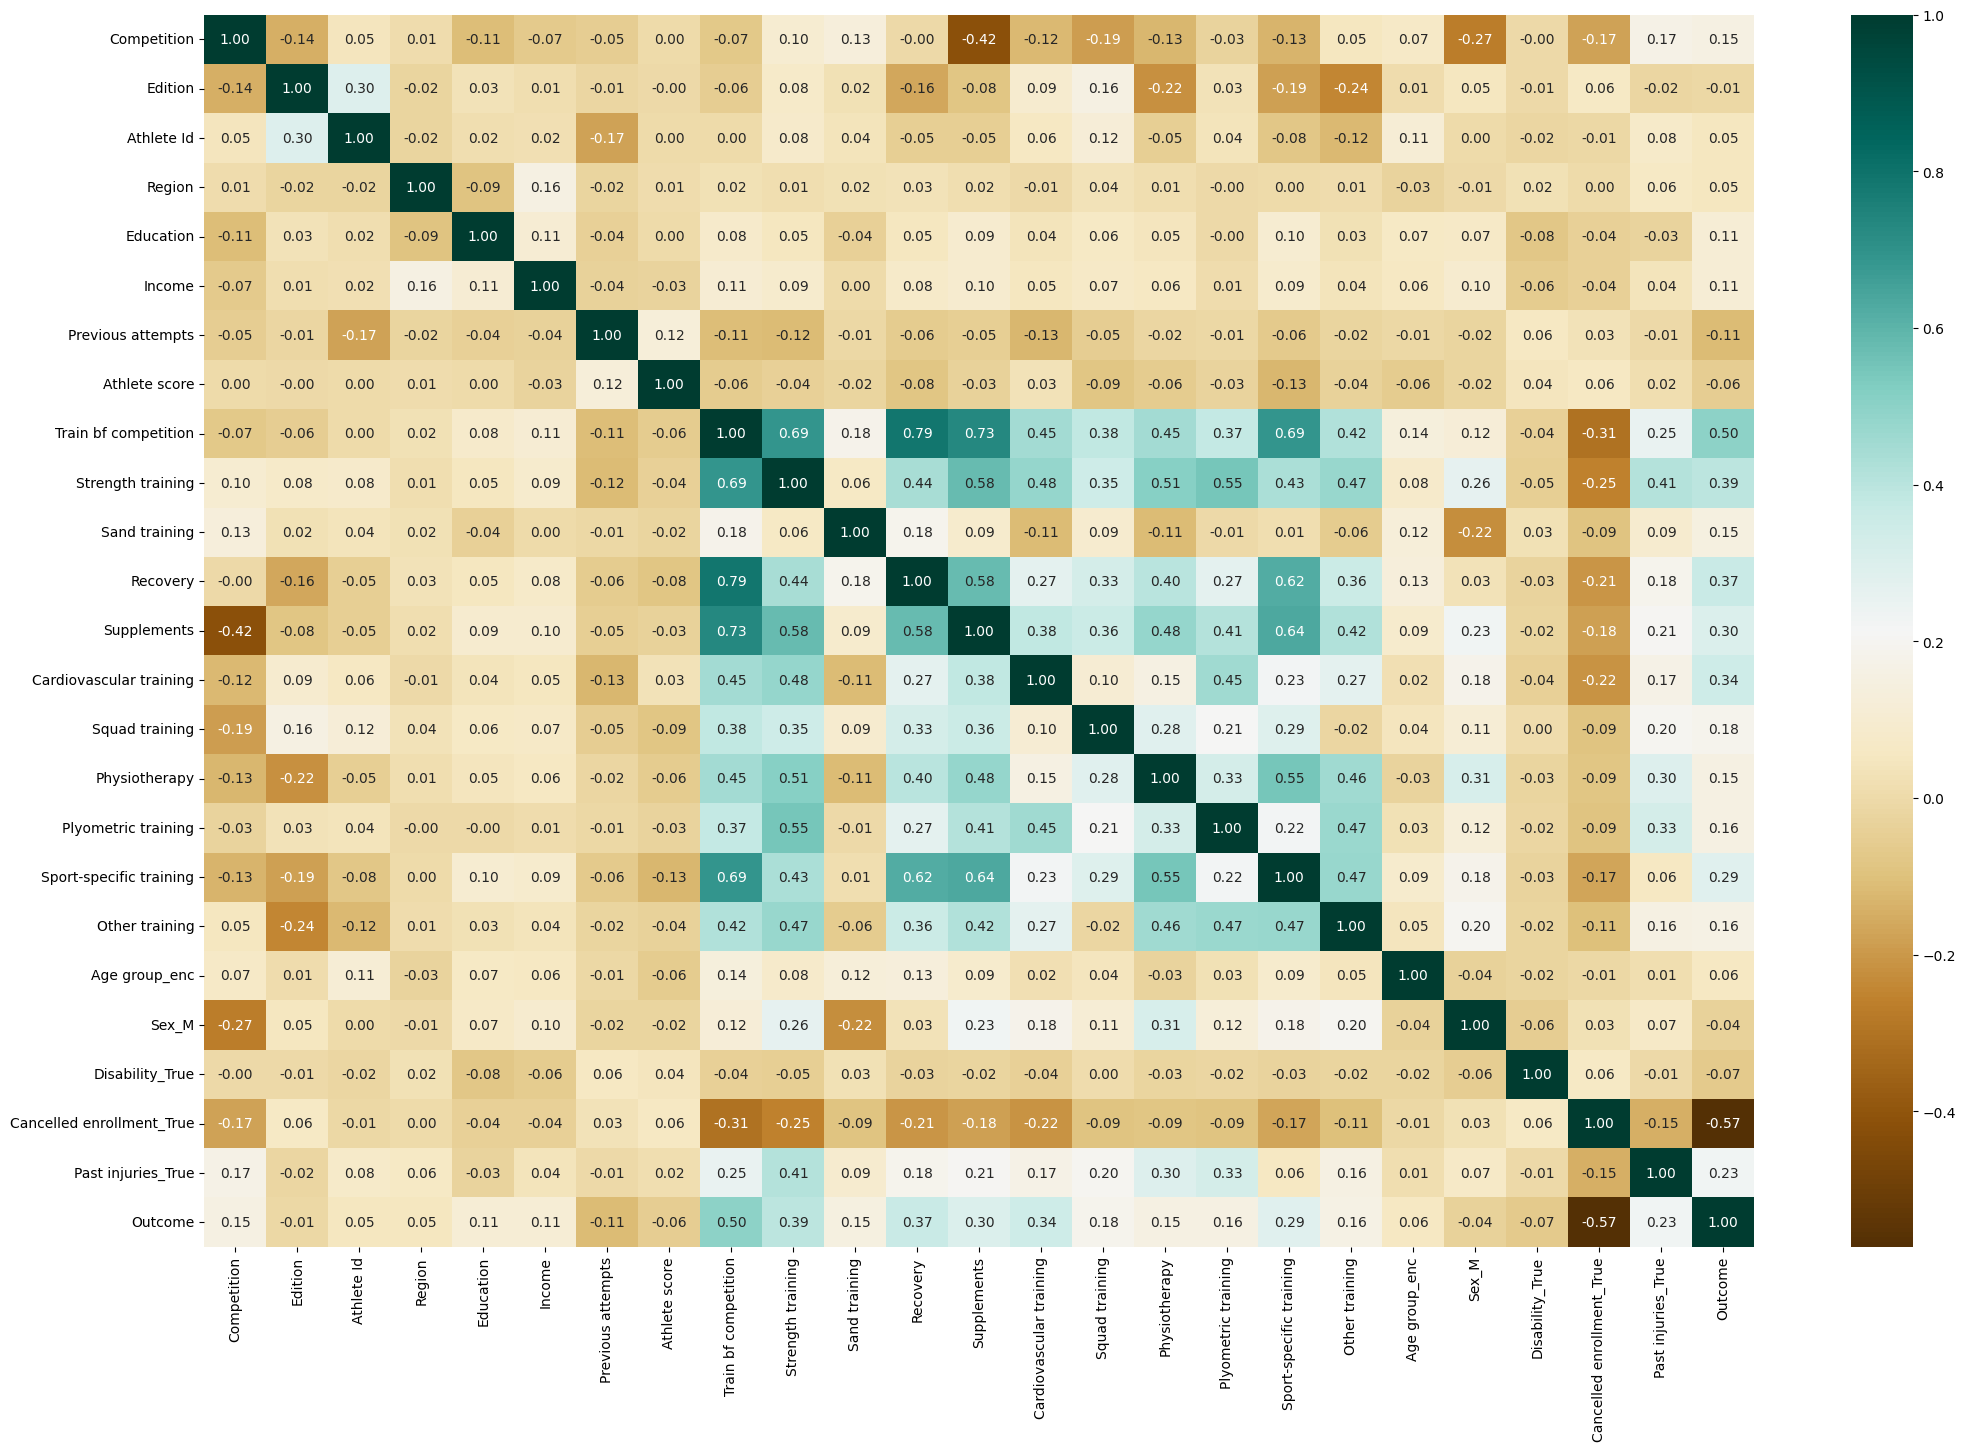

In [ ]:
#Plot the correlation matrix data.
plt.figure(figsize=(25,16))
sns.heatmap(data=cor_spearman, annot=True, cmap = plt.cm.BrBG, fmt='.2f')

#explanation:
#To analyse which variables are relevant to our analysis, we should consider a specific threshold.
#In this case, we will consider strong correlations between the target and the dependent variables if the correlation value is higher than 0,5 or lower than -0,5.
#Thus, the variable to consider are: Canceled enrollment and Train bf Competition.

###ANOVA

In [ ]:
#We decided to apply ANOVA method as it uses numerical variables and relate them to the categorical output.
#We devided the train_pre dataset into the independent variables (X_train_anova) and the dependent variable (y_train_anova).

X_train_anova = wac_train_fs[['Previous attempts', 'Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Supplements', 'Cardiovascular training',
                              'Squad training','Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]
y_train_anova = wac_train_fs['Outcome']

In [ ]:
X_val_anova = wac_val_fs[['Previous attempts', 'Athlete score', 'Train bf competition', 'Strength training', 'Sand training', 'Supplements', 'Cardiovascular training',
                              'Squad training','Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]
y_val_anova = wac_val_fs['Outcome']

In [ ]:
X_val_anova.shape


(3611, 12)

In [ ]:
numberK_list = np.arange(1, 13)
high_score = 0
nof = 0
score_list_train = []
score_list_test = []

for n in numberK_list:
    # Use n to select the top n features
    select = SelectKBest(k=n)
    X_train_selected = select.fit_transform(X_train_anova, y_train_anova)
    X_val_selected = select.transform(X_val_anova)

    model = LogisticRegression()
    model.fit(X_train_selected, y_train_anova)

    labels_train = model.predict(X_train_selected)
    labels_val = model.predict(X_val_selected)

    score_train = f1_score(y_train_anova, labels_train)
    score_test = f1_score(y_val_anova, labels_val)
    score_list_train.append(score_train)
    score_list_test.append(score_test)

    if score_test > high_score:
        high_score = score_test
        nof = n

print("Best value of n: %d" % nof)
print("Mean F1-score in train with n=%d: %f" % (nof, score_list_train[nof-1]))
print("Mean F1-score in validation with n=%d: %f" % (nof, high_score))

Best value of n: 10
Mean F1-score in train with n=10: 0.774154
Mean F1-score in validation with n=10: 0.789302


In [ ]:
#Applying ANOVA with K=10

anova = SelectKBest(f_classif, k=10)

X_anova = anova.fit_transform(X_train_anova, y_train_anova)

selected_features = pd.Series(anova.get_support(), index = X_train_anova.columns)

selected_features

Previous attempts           True
Athlete score              False
Train bf competition        True
Strength training           True
Sand training              False
Supplements                 True
Cardiovascular training     True
Squad training              True
Physiotherapy               True
Plyometric training         True
Sport-specific training     True
Other training              True
dtype: bool

In [ ]:
#As mentioned above, the more important variables to mantain in the model are the true results.
#The ANOVA method chooses the most significant features by applying a statistical test. As we defined the k=10, it is going to choose the best set of 10 features that are most relavant and useful
#for the analysis.
#This way, we should keep the true values: Previous attempts, Train bf competiiton, Strength training, Supplements, Cardiovascular training,
# Squad traing, Physiotherapy, Plyometric training, Sports-specific training and Other training.
#By choosing this features, we are improving the model's predictive ability.

Model Evaluation

In [ ]:
#As our output is a binary outcome variable we choose to use the Logistic Regression model.
model = LogisticRegression()

In [ ]:
#We defined our independent variables as the best 10 given by the ANOVA feature selection method.
X_train_model = wac_train_fs[['Previous attempts', 'Train bf competition', 'Strength training', 'Supplements','Cardiovascular training',
                              'Squad training', 'Physiotherapy', 'Plyometric training', 'Sport-specific training', 'Other training']]

In [ ]:
#We trained our model
model.fit(X_train_model, y_train_anova)

LogisticRegression()

In [ ]:
 #Evaluate your model with only one evaluation metric of your choice. Explain how you choose the most appropriated evaluation metric.
 y_pred = model.predict(X_train_model)

In [ ]:
confusion_matrix(y_train_anova, y_pred)

array([[4066, 1681],
       [1996, 6302]])

In [ ]:
#Classification report TRAIN: Generate classification report ----------------- New call out of the handout

report = classification_report(y_train_anova, y_pred)
print("Classification Report:")
print(report)

#-----------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.71      0.69      5747
           1       0.79      0.76      0.77      8298

    accuracy                           0.74     14045
   macro avg       0.73      0.73      0.73     14045
weighted avg       0.74      0.74      0.74     14045



In [ ]:
#The F1 score indicates the performance of a classification model in terms of both precision and recall.
#The interpretation of the score may depend on the specific context and problem being solved.
#So, it is important to consider other performance metrics and compare the results with other models to achieve better conclusions.
#In our case, an F1 score of 0.774154 means that the model is performing reasonably well, but there is still room for improvement.

In [ ]:
#Check the score of the model using the function
model.score(X_train_model, y_train_anova)

0.7381986472054112

In [ ]:
#Check the score on the X_val data now, and check if the model is overfitting.
#The validation datset and the train dataset should have the same features.
X_val_ = wac_val_fs[['Previous attempts', 'Train bf competition', 'Strength training', 'Supplements','Cardiovascular training', 'Squad training', 'Physiotherapy',
                     'Plyometric training', 'Sport-specific training', 'Other training']]
y_val_ = wac_val_fs[['Outcome']]

model.score(X_val_, y_val_)

0.7490999723068402

In [ ]:
#Overfitting happens when the model tries to account for every possible trend or structure in the training set, ending up not generalizing well for unseen data.
#Our result is not very common since our score for the validation dataset is slightly better than for the training dataset.
#This result can indicate overfitting.

###Chi-Square

In [ ]:
wac_train_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14045 entries, 64499 to 63104
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Competition                14045 non-null  float64
 1   Edition                    14045 non-null  float64
 2   Athlete Id                 14045 non-null  float64
 3   Region                     14045 non-null  float64
 4   Education                  14045 non-null  float64
 5   Income                     14045 non-null  float64
 6   Previous attempts          14045 non-null  float64
 7   Athlete score              14045 non-null  float64
 8   Train bf competition       14045 non-null  float64
 9   Strength training          14045 non-null  float64
 10  Sand training              14045 non-null  float64
 11  Recovery                   14045 non-null  float64
 12  Supplements                14045 non-null  float64
 13  Cardiovascular training    14045 non-null 

In [ ]:
#Check if categorical variables have dependency with target.
X_chi = wac_train_fs[['Edition', 'Athlete Id', 'Recovery',  'Sex_M', 'Region', 'Education', 'Income', 'Age group_enc', 'Disability_True',
                      'Cancelled enrollment_True', 'Past injuries_True']]
y_chi = wac_train_fs['Outcome']

In [ ]:
chi2_check = []

for i in X_chi.columns:
# chi2 statistic
  if chi2_contingency(pd.crosstab(y_chi, X_chi[i]))[1] < 0.05:
    chi2_check.append('Keep variable')
  else:
    chi2_check.append('Remove variable')
res = pd.DataFrame(data = [X_chi.columns, chi2_check]).T
res.columns = ['Column', 'Hypothesis']
res

#Null Hypothesis (H0) : There is no relationship between the variables
#Alternative Hypothesis(H1): There is a relationship between variables

Column       Hypothesis
0                     Edition    Keep variable
1                  Athlete Id  Remove variable
2                    Recovery    Keep variable
3                       Sex_M    Keep variable
4                      Region    Keep variable
5                   Education    Keep variable
6                      Income    Keep variable
7               Age group_enc    Keep variable
8             Disability_True    Keep variable
9   Cancelled enrollment_True    Keep variable
10         Past injuries_True    Keep variable

In [ ]:
# According to the chi2 technique, the features to keep are:
#Edition, Recovery, Competition, Sex_M, Region, Education, Income, Age group_enc,Disability_True, Cancelled enrollment_True, Past injuries_True

### RFE (Recursive Feature Elimination)

In [ ]:
#Creating new datasets to RFE
wac_train_rfe = wac_train_fs.copy()
wac_val_rfe = wac_val_fs.copy()
wac_test_rfe = wac_test_fs.copy()

In [ ]:
print(wac_train_rfe.columns)

Index(['Competition', 'Edition', 'Athlete Id', 'Region', 'Education', 'Income',
       'Previous attempts', 'Athlete score', 'Train bf competition',
       'Strength training', 'Sand training', 'Recovery', 'Supplements',
       'Cardiovascular training', 'Squad training', 'Physiotherapy',
       'Plyometric training', 'Sport-specific training', 'Other training',
       'Age group_enc', 'Sex_M', 'Disability_True',
       'Cancelled enrollment_True', 'Past injuries_True', 'Outcome'],
      dtype='object')


In [ ]:
wac_train_rfe.shape

(14045, 25)

In [ ]:
#just to check finally
#wac_train_rfe.info()
#wac_val_rfe.info()
#wac_test_rfe.info()

In [ ]:
#RFE starts by running a model with all the features and gets to the end/to the result and ranks the features by its importance until it reaches
#     a treshold that we specify (in this case 21 features)

In [ ]:
rfe_data_train = wac_train_rfe.loc[:, wac_train_rfe.columns != 'Outcome']
rfe_target_train = wac_train_rfe['Outcome']

In [ ]:
rfe_data_val = wac_val_rfe.loc[:, wac_val_rfe.columns != 'Outcome']
rfe_target_val = wac_val_rfe['Outcome']

In [ ]:
#Loop to know k in rfe: using all the variables, using Decision Tree Classifier


X_train_rfe = rfe_data_train
y_train_rfe = rfe_target_train
X_val_rfe = rfe_data_val
y_val_rfe = rfe_target_val

#max_features = X_train_rfe.shape[1]  # Maximum number of features
scores = []  # To store the evaluation scores for different feature counts

for num_features in range(1, 25):
    # Create the RFE object with the Decision Tree Classifier
    estimator = DecisionTreeClassifier()
    rfe = RFE(estimator, n_features_to_select=num_features)

    # Fit the RFE model on the training data
    rfe.fit(X_train_rfe, y_train_rfe)

    # Transform the training and testing data to selected features
    X_train_selected = rfe.transform(X_train_rfe)
    X_val_selected = rfe.transform(X_val_rfe)

    # Train the model using the selected features
    estimator.fit(X_train_selected, y_train_rfe)

    # Make predictions on the testing data
    y_pred = estimator.predict(X_val_selected)

    # Calculate the F1 score and store it
    score = f1_score(y_val_rfe, y_pred)
    scores.append(score)

# Find the index of the highest F1 score
best_num_features = np.argmax(scores) + 1
score_best_num_features = max(scores)

print("Best number of features: ", best_num_features)
print("Score with the best number of features: ", score_best_num_features)

Best number of features:  9
Score with the best number of features:  0.83690587138863


In [ ]:
#Loop to know k in rfe: using all variables, using Logistic Regression

X_train_rfe = rfe_data_train
y_train_rfe = rfe_target_train
X_val_rfe = rfe_data_val
y_val_rfe = rfe_target_val

#max_features = X_train_rfe.shape[1]  # Maximum number of features
scores = []  # To store the evaluation scores for different feature counts

for num_features in range(1, 25):
    # Create the RFE object with the Logistic Regression model
    estimator = LogisticRegression()
    rfe = RFE(estimator, n_features_to_select=num_features)

    # Fit the RFE model on the training data
    rfe.fit(X_train_rfe, y_train_rfe)

    # Transform the training and testing data to selected features
    X_train_selected = rfe.transform(X_train_rfe)
    X_val_selected = rfe.transform(X_val_rfe)

    # Train the model using the selected features
    estimator.fit(X_train_selected, y_train_rfe)

    # Make predictions on the testing data
    y_pred = estimator.predict(X_val_selected)

    # Calculate the F1 score and store it
    score = f1_score(y_val_rfe, y_pred)
    scores.append(score)

# Find the index of the highest F1 score
best_num_features = np.argmax(scores) + 1
score_best_num_features = max(scores)

print("Best number of features: ", best_num_features)
print("Score with the best number of features: ", score_best_num_features)

Best number of features:  24
Score with the best number of features:  0.8699649737302979


In [ ]:
#Loop to know k in rfe: using variables selected from ANOVA + CHI, using Logistic Regression

X_train_rfe = rfe_data_train[['Edition', 'Recovery', 'Competition', 'Sex_M', 'Region', 'Education', 'Income', 'Age group_enc',
                             'Disability_True', 'Cancelled enrollment_True', 'Past injuries_True', 'Previous attempts', 'Train bf competition',
                             'Strength training', 'Supplements','Cardiovascular training', 'Squad training', 'Physiotherapy', 'Plyometric training',
                             'Sport-specific training', 'Other training']]
y_train_rfe = rfe_target_train
X_val_rfe = rfe_data_val[['Edition', 'Recovery', 'Competition', 'Sex_M', 'Region', 'Education', 'Income', 'Age group_enc',
                             'Disability_True', 'Cancelled enrollment_True', 'Past injuries_True', 'Previous attempts', 'Train bf competition',
                             'Strength training', 'Supplements','Cardiovascular training', 'Squad training', 'Physiotherapy', 'Plyometric training',
                             'Sport-specific training', 'Other training']]
y_val_rfe = rfe_target_val

#max_features = X_train_rfe.shape[1]  # Maximum number of features
scores = []  # To store the evaluation scores for different feature counts

for num_features in range(1, 22):
    # Create the RFE object with the Logistic Regression model
    estimator = LogisticRegression()
    rfe = RFE(estimator, n_features_to_select=num_features)

    # Fit the RFE model on the training data
    rfe.fit(X_train_rfe, y_train_rfe)

    # Transform the training and testing data to selected features
    X_train_selected = rfe.transform(X_train_rfe)
    X_val_selected = rfe.transform(X_val_rfe)

    # Train the model using the selected features
    estimator.fit(X_train_selected, y_train_rfe)

    # Make predictions on the testing data
    y_pred = estimator.predict(X_val_selected)

    # Calculate the F1 score and store it
    score = f1_score(y_val_rfe, y_pred)
    scores.append(score)

# Find the index of the highest F1 score
best_num_features = np.argmax(scores) + 1
score_best_num_features = max(scores)

print("Best number of features: ", best_num_features)
print("Score with the best number of features: ", score_best_num_features)

Best number of features:  19
Score with the best number of features:  0.8692610406646261


In [ ]:
#Loop to know k in rfe: using variables selected from ANOVA + CHI, using Decision Tree Classifier

X_train_rfe = rfe_data_train[['Edition', 'Recovery', 'Competition', 'Sex_M', 'Region', 'Education', 'Income', 'Age group_enc',
                             'Disability_True', 'Cancelled enrollment_True', 'Past injuries_True', 'Previous attempts', 'Train bf competition',
                             'Strength training', 'Supplements','Cardiovascular training', 'Squad training', 'Physiotherapy', 'Plyometric training',
                             'Sport-specific training', 'Other training']]
y_train_rfe = rfe_target_train
X_val_rfe = rfe_data_val[['Edition', 'Recovery', 'Competition', 'Sex_M', 'Region', 'Education', 'Income', 'Age group_enc',
                             'Disability_True', 'Cancelled enrollment_True', 'Past injuries_True', 'Previous attempts', 'Train bf competition',
                             'Strength training', 'Supplements','Cardiovascular training', 'Squad training', 'Physiotherapy', 'Plyometric training',
                             'Sport-specific training', 'Other training']]
y_val_rfe = rfe_target_val

#max_features = X_train_rfe.shape[1]  # Maximum number of features
scores = []  # To store the evaluation scores for different feature counts

for num_features in range(1, 22):
    # Create the RFE object with the Decision Tree Classifier
    estimator = DecisionTreeClassifier()
    rfe = RFE(estimator, n_features_to_select=num_features)

    # Fit the RFE model on the training data
    rfe.fit(X_train_rfe, y_train_rfe)

    # Transform the training and testing data to selected features
    X_train_selected = rfe.transform(X_train_rfe)
    X_val_selected = rfe.transform(X_val_rfe)

    # Train the model using the selected features
    estimator.fit(X_train_selected, y_train_rfe)

    # Make predictions on the testing data
    y_pred = estimator.predict(X_val_selected)

    # Calculate the F1 score and store it
    score = f1_score(y_val_rfe, y_pred)
    scores.append(score)

# Find the index of the highest F1 score
best_num_features = np.argmax(scores) + 1
score_best_num_features = max(scores)

print("Best number of features: ", best_num_features)
print("Score with the best number of features: ", score_best_num_features)

Best number of features:  2
Score with the best number of features:  0.859002169197397


In [ ]:
#Chosen method: ANOVA + CHI in RFE with Logistic Regression.
# The best number of features selected by the RFE is 19!

In [ ]:
model19 = LogisticRegression()

In [ ]:
rfe19 = RFE(estimator = model19, n_features_to_select = 19)

In [ ]:
X_rfe19 = rfe19.fit_transform(X = rfe_data_train, y = rfe_target_train)
X_rfe19

array([[0.80217762, 1.        , 0.08954895, ..., 1.        , 0.        ,
        0.        ],
       [0.17918265, 0.        , 0.95600857, ..., 1.        , 0.        ,
        1.        ],
       [0.80217762, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29500449, 0.        , 0.95600857, ..., 1.        , 0.        ,
        0.        ],
       [0.17918265, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.29500449, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
rfe19.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True])

In [ ]:
rfe19.ranking_

array([1, 1, 2, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 3,
       1, 1])

In [ ]:
selected_features = pd.Series(rfe19.support_, index = rfe_data_train.columns)
selected_features

Competition                   True
Edition                       True
Athlete Id                   False
Region                        True
Education                     True
Income                        True
Previous attempts             True
Athlete score                False
Train bf competition          True
Strength training            False
Sand training                 True
Recovery                      True
Supplements                   True
Cardiovascular training       True
Squad training                True
Physiotherapy                 True
Plyometric training           True
Sport-specific training       True
Other training                True
Age group_enc                False
Sex_M                         True
Disability_True              False
Cancelled enrollment_True     True
Past injuries_True            True
dtype: bool

In [ ]:
# features to keep have the value "True" and features to remove have the value "False"

##Dataset with the chosen variables

In [ ]:
X_train_final = wac_train_fs[['Competition', 'Edition', 'Region', 'Education', 'Income', 'Previous attempts', 'Train bf competition',
                              'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training', 'Squad training', 'Physiotherapy',
                              'Plyometric training', 'Sport-specific training', 'Other training','Sex_M', 'Cancelled enrollment_True',
                              'Past injuries_True']]

y_train_final = wac_train_fs['Outcome']

In [ ]:
X_val_final = wac_val_fs[['Competition', 'Edition', 'Region', 'Education', 'Income', 'Previous attempts', 'Train bf competition',
                              'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training', 'Squad training', 'Physiotherapy',
                              'Plyometric training', 'Sport-specific training', 'Other training','Sex_M', 'Cancelled enrollment_True',
                              'Past injuries_True']]

y_val_final = wac_val_fs['Outcome']

In [ ]:
X_test_final = wac_test_fs[['Competition', 'Edition', 'Region', 'Education', 'Income', 'Previous attempts', 'Train bf competition',
                              'Sand training', 'Recovery', 'Supplements', 'Cardiovascular training', 'Squad training', 'Physiotherapy',
                              'Plyometric training', 'Sport-specific training', 'Other training','Sex_M', 'Cancelled enrollment_True',
                              'Past injuries_True']]

In [ ]:
X_train_final.shape

(14045, 19)

#Modeling

In [ ]:
#Creating new copies to use for each model:
X_train_model = X_train_final.copy()
X_val_model = X_val_final.copy()
X_test_model = X_test_final.copy()
y_train_model = y_train_final.copy()
y_val_model = y_val_final.copy()

## Bayesian and Instance Based Learning

In [ ]:
# Using `GaussianNB`, create a Naive Bayes classifier instance called `modelNB`
modelNB = GaussianNB()

In [ ]:
# Use the `.fit()`method of model to fit the model to the array of points `X_train_model`
# and `y_train`,i.e., associate the argument keyword `X` to `X_train` and `y` to `y_train`.
modelNB.fit(X = X_train_model, y = y_train_model)

GaussianNB()

In [ ]:
# Use the `.predict()` method of modelNB to perform classification in `X_train_model`
# and assign to the object `labels_train`. Do the same for `X_val_model` and assign to the object `labels_val`.
labels_train = modelNB.predict(X_train_model)
labels_val = modelNB.predict(X_val_model)

In [ ]:
# Use the `.score()` method of modelNB to obtain the mean accuracy of the given train data `X_train_model` and the true labels for X, `y_train_model`
modelNB.score(X_train_model, y_train_model)

0.7798504805980776

In [ ]:
#Use the `.score()` method of modelNB to obtain the mean accuracy of the given test data `X_val_model` and the true labels for X, `y_val_model`
modelNB.score(X_val_model, y_val_model)

0.7790085848795347

In [ ]:
from sklearn.metrics import f1_score

print(f'F1 Score between the y_train_model and labels_train: {f1_score(y_train_model, labels_train):.3f}\n' +
     f'F1 Score between the y_val_model and labels_val: {f1_score(y_val_model, labels_val):.3f}')

F1 Score between the y_train_model and labels_train: 0.842
F1 Score between the y_val_model and labels_val: 0.843


In [ ]:
# Call the attribute `.class_prior_` in modelNB to check the assumed $P(y)$ for both $y = 0$ and $y = 1$.
modelNB.class_prior_

array([0.40918476, 0.59081524])

In [ ]:
# Call the attribute `.class_count_` in modelNB to verify the number of training samples observed in each class.
modelNB.class_count_

array([5747., 8298.])

In [ ]:
# Call the attribute `.theta_` in modelNB to verify the mean value of each feature per class.
modelNB.theta_

array([[0.33393546, 0.55785627, 0.48342696, 0.5843493 , 0.56398221,
        0.03584479, 0.17899762, 0.00286575, 0.15451926, 0.17583315,
        0.15638884, 0.1545154 , 0.13855635, 0.01972936, 0.15812533,
        0.01390625, 0.56881851, 0.45240995, 0.40821298],
       [0.42051912, 0.54796336, 0.52990633, 0.66547537, 0.64545877,
        0.01803647, 0.42229503, 0.00704469, 0.36803294, 0.34989885,
        0.36656955, 0.30814654, 0.29498875, 0.07461792, 0.3383858 ,
        0.04607171, 0.53085081, 0.        , 0.64208243]])

In [ ]:
# If you dont remember the order of the variables, you can always call `X_train_model.columns`.
pd.DataFrame(data=modelNB.theta_, columns=X_train_model.columns).T

0         1
Competition                0.333935  0.420519
Edition                    0.557856  0.547963
Region                     0.483427  0.529906
Education                  0.584349  0.665475
Income                     0.563982  0.645459
Previous attempts          0.035845  0.018036
Train bf competition       0.178998  0.422295
Sand training              0.002866  0.007045
Recovery                   0.154519  0.368033
Supplements                0.175833  0.349899
Cardiovascular training    0.156389  0.366570
Squad training             0.154515  0.308147
Physiotherapy              0.138556  0.294989
Plyometric training        0.019729  0.074618
Sport-specific training    0.158125  0.338386
Other training             0.013906  0.046072
Sex_M                      0.568819  0.530851
Cancelled enrollment_True  0.452410  0.000000
Past injuries_True         0.408213  0.642082

In [ ]:
#Call the attribute `.var_` in modelNB to verify the variance of each feature per class.
pd.DataFrame(data=modelNB.var_, columns=X_train_model.columns).T

0             1
Competition                0.063183  7.741016e-02
Edition                    0.153039  1.682158e-01
Region                     0.170173  1.668368e-01
Education                  0.119872  1.095735e-01
Income                     0.128686  1.108641e-01
Previous attempts          0.008546  4.039861e-03
Train bf competition       0.033522  8.111027e-02
Sand training              0.000445  1.596763e-03
Recovery                   0.047233  1.144608e-01
Supplements                0.043953  1.022309e-01
Cardiovascular training    0.063986  1.440719e-01
Squad training             0.088745  1.680462e-01
Physiotherapy              0.080577  1.715257e-01
Plyometric training        0.006122  3.513144e-02
Sport-specific training    0.044468  1.046755e-01
Other training             0.003363  1.489110e-02
Sex_M                      0.245264  2.490482e-01
Cancelled enrollment_True  0.247735  2.478483e-10
Past injuries_True         0.241575  2.298126e-01

## KNN Classifier

In [ ]:
# Using `KNeighborsClassifier`, create a Nearest Neighbor classifier instance called `modelKNN`
modelKNN = KNeighborsClassifier()

In [ ]:
# Use the `.fit()`method of model to fit the model to the array of points `X_train_model`
# and `y_train`,i.e., associate the argument keyword `X` to `X_train_model` and `y` to `y_train_model`.
modelKNN.fit(X = X_train_model, y = y_train_model)

KNeighborsClassifier()

In [ ]:
# Use the `.predict()` method of modelKNN to perform classification in `X_train_model` and
# assign to the object `labels_train`. Do the same for `X_val_model` and assign to the object `labels_val`.
labels_train = modelKNN.predict(X_train_model)
labels_val = modelKNN.predict(X_val_model)

In [ ]:
# Use the `.score()` method of modelKNN to obtain the mean accuracy of the given train data `X_train_scaled` and the true labels for X, `y_train`.
modelKNN.score(X_train_model, y_train_model)

0.8738341046635814

In [ ]:
# Use the `.score()` method of modelKNN to obtain the mean accuracy of the given test data `X_val_model` and the true labels for X, `y_val_model`
modelKNN.score(X_val_model, y_val_model)

0.8277485461091111

Again, given the dataset we are using, these accuracy scores are *misleading* as a model performance metric. <br>

Let us see what happens when we consider the F1_score, which again is not an explicitly callable methods:

In [ ]:
print(f'F1 Score between the y_train_model and labels_train: {f1_score(y_train_model, labels_train):.3f}\n' +
     f'F1 Score between the y_val_model and labels_val: {f1_score(y_val_model, labels_val):.3f}')

F1 Score between the y_train_model and labels_train: 0.898
F1 Score between the y_val_model and labels_val: 0.861


In [ ]:
# Call the attribute `.classes_` in modelKNN to check the class labels known to the classifier.
modelKNN.classes_

array([0, 1])

In [ ]:
# Call the attribute `.effective_metric_` in modelKNN to verify the distance metric used.
modelKNN.effective_metric_

'euclidean'

In [ ]:
#Choosign the Nimber of Neighbors (k)

In [ ]:
numberK_list=np.arange(1,31)
high_score=0
nof=0
score_list_train =[]
score_list_val =[]
for n in numberK_list:
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train_model, y_train_model)

    #obtain predictions
    labels_train = model.predict(X_train_model)
    labels_val = model.predict(X_val_model)

    score_train = f1_score(y_train_model, labels_train)
    score_val = f1_score(y_val_model, labels_val)
    score_list_train.append(score_train)
    score_list_val.append(score_val)

    if(score_val>high_score):
        high_score = score_val
        nof = numberK_list[n-1]
print("Best number of neighbors: %d" %nof)
print("Mean F1-score in train with %d neighbors: %f" % (nof, score_list_train[nof-1]))
print("Mean F1-score in validation with %d neighbors: %f" % (nof, high_score))

Best number of neighbors: 7
Mean F1-score in train with 7 neighbors: 0.890805
Mean F1-score in validation with 7 neighbors: 0.865104


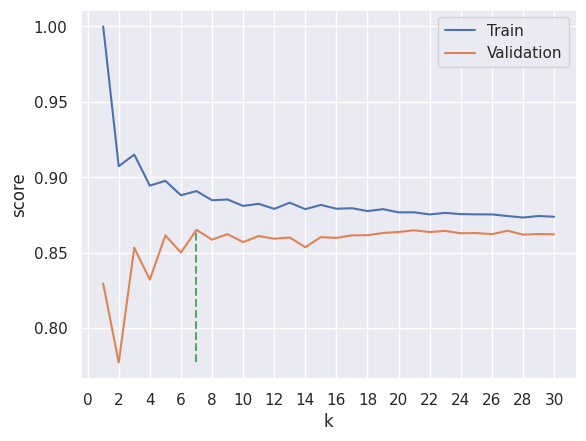

In [ ]:
#Create a line plot with the train and validation scores, relative to the number of neighbors.

sns.set()

plt.plot(numberK_list, score_list_train, label='Train')
plt.plot(numberK_list, score_list_val, label = 'Validation')
plt.vlines(x=nof,ymax=high_score,ymin=min(score_list_val),ls='--',colors='g')
plt.xticks(numberK_list)
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
plt.xticks(np.arange(0,31,2))
plt.show()

In [ ]:
#We can change the number of neighbors to consider in order to classify new
#instances to 7 by creating a new KNN classifier where `n_neighbors=7`. Note that the default number of neighbors is 5.
modelKNN7 = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Use the `.fit()`method of model to fit the model to the array of
# points `X_train` and `y_train`,i.e., associate the argument keyword `X` to `X_train_model` and `y` to `y_train_model`.
modelKNN7.fit(X = X_train_model, y = y_train_model)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Use the `.score()` method of modelKNN7 to obtain the mean accuracy of the given train data `X_train_model` and the true labels for X, `y_train_model`
modelKNN7.score(X_train_model, y_train_model)

0.8647205411178356

In [ ]:
# Use the `.score()` method of modelKNN7 to obtain the mean accuracy of the given test data `X_val_model` and the true labels for X, `y_val_model`
modelKNN7.score(X_val_model, y_val_model)

0.8310717252838549

In [ ]:
# Obtain the F1 score for the output predictions for modelKNN7
labels_train = modelKNN7.predict(X_train_model)
labels_val = modelKNN7.predict(X_val_model)

In [ ]:
print(f'F1 Score between the y_train_model and labels_train: {f1_score(y_train_model, labels_train):.4f}\n' +
     f'F1 Score between the y_val_model and labels_val: {f1_score(y_val_model, labels_val):.4f}')

F1 Score between the y_train_model and labels_train: 0.8908
F1 Score between the y_val_model and labels_val: 0.8651


In [ ]:
# Change the Distance Metric
# We can change the distance used from `Euclidean` to others such as the `Manhattan` distance by creating a new KNN classifier where `metric` = manhattan.
modelKNNM = KNeighborsClassifier(n_neighbors=7, metric='manhattan')

In [ ]:
#Use the `.fit()`method of model to fit the model to the ~
#array of points `X_train_model` and `y_train_model`,i.e., associate the argument keyword `X` to `X_train_model` and `y` to `y_train_model`.
modelKNNM.fit(X = X_train_model, y = y_train_model)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [ ]:
# Use the method `predict()` on `KNNM` to create `labels_train` and `labels_val`
labels_train = modelKNNM.predict(X_train_model)
labels_val = modelKNNM.predict(X_val_model)

In [ ]:
#Obtain the F1 score for the output predictions for modelKNNM
print(f'F1 Score between the y_train_model and labels_train: {f1_score(y_train_model, labels_train):.4f}\n' +
     f'F1 Score between the y_val_model and labels_val: {f1_score(y_val_model, labels_val):.4f}')

F1 Score between the y_train_model and labels_train: 0.8951
F1 Score between the y_val_model and labels_val: 0.8657


In [ ]:
# We can change apply the distance weighted KNN by changing the weights
# from uniform (so all neighbors have the same weight), which is the default setting, to `weights='distance'`.
modelKNNW= KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
# Use the `.fit()`method of model to fit the model to the array of
# points `X_train_model` and `y_train_model`,i.e., associate the argument keyword `X` to `X_train_model` and `y` to `y_train_model`.
modelKNNW.fit(X = X_train_model, y = y_train_model)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
# Use the method `predict()` on `KNNW` to create `labels_train` and `labels_val`
labels_train = modelKNNW.predict(X_train_model)
labels_val = modelKNNW.predict(X_val_model)

In [ ]:
# Obtain the F1 score for the output predictions for modelKNNW
print(f'F1 Score between the y_train_model and labels_train: {f1_score(y_train_model, labels_train):.4f}\n' +
     f'F1 Score between the y_val_model and labels_val: {f1_score(y_val_model, labels_val):.4f}')

F1 Score between the y_train_model and labels_train: 1.0000
F1 Score between the y_val_model and labels_val: 0.8656


## Decision Trees

In [ ]:
# Creating an instance of Decision Tree Classifier with the default parameters:
modelDT = DecisionTreeClassifier()

In [ ]:
# Training the model:
modelDT.fit(X_train_model, y_train_model)

DecisionTreeClassifier()

In [ ]:
# Visualizing the Decision Tree:
from sklearn import tree
import graphviz
# Process a decision tree graph using Graphviz
dot_data = tree.export_graphviz(modelDT,
                                out_file=None,
                                feature_names=X_train_model.columns,
                                class_names=["Lose", "Win"],
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
# Checking if the model is overfitting
# Score for the train dataset for the first decision tree (modelDT):
modelDT.score(X_train_model, y_train_model)

1.0

In [ ]:
# Score for the validation dataset for the first decision tree (modelDT):
modelDT.score(X_val_model, y_val_model)

0.8022708391027417

In [ ]:
# Now we're going to use a different criteria to build a decision tree, which is the entropy criterion for the information gain.

In [ ]:
modelDT_entropy = DecisionTreeClassifier(criterion='entropy')

# Training the model:
modelDT_entropy.fit(X_train_model, y_train_model)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Score for the train dataset for the second decision tree (modelDT_entropy):
modelDT_entropy.score(X_train_model, y_train_model)

1.0

In [ ]:
# Score for the validation dataset for the second decision tree (modelDT_entropy):
modelDT_entropy.score(X_val_model, y_val_model)

0.801716975906951

In [ ]:
# The score seems to improve slightly in the validation dataset by using the entropy splitting criterion.
# As shown in the steps before both of our trees seem to be overfitting. Next, we'll fix this!

In [ ]:
# To improve the results of our model, we'll choose the most appropriate parameters, namely the Maximum depth and the Minimum samples split.
# We're going to use the prepruning approach, which stops growing the tree earlier, before it perfectly classifies the training set.
# For that, we need to define some thresholds and stopping criterias.

In [ ]:
# Creating two lists containing the scores for the train and test sets for multiple
# values of min_samples_split and max_depth.
scores_train = []
scores_val = []
parameters = []
for i in range(10, 20):
    for j in range(1,10):
        parameters.append([i,j])
        DTR = DecisionTreeClassifier(min_samples_split=i, max_depth=j)
        DTR.fit(X_train_model, y_train_model)
        scores_train.append(DTR.score(X_train_model, y_train_model))
        scores_val.append(DTR.score(X_val_model, y_val_model))

# Find the index of the highest validation score
best_index = np.argmax(scores_val)
best_parameters = parameters[best_index]
best_min_samples_split = best_parameters[0]
best_max_depth = best_parameters[1]
best_score_val = scores_val[best_index]

print("Best min_samples_split:", best_min_samples_split)
print("Best max_depth:", best_max_depth)
print("Validation score with the best parameters:", best_score_val)

Best min_samples_split: 10
Best max_depth: 7
Validation score with the best parameters: 0.8629188590418166


In [ ]:
# This represents the number of trees that were generated because of the ranges used
# for the parameters used in the lists above.
len(scores_train)

90

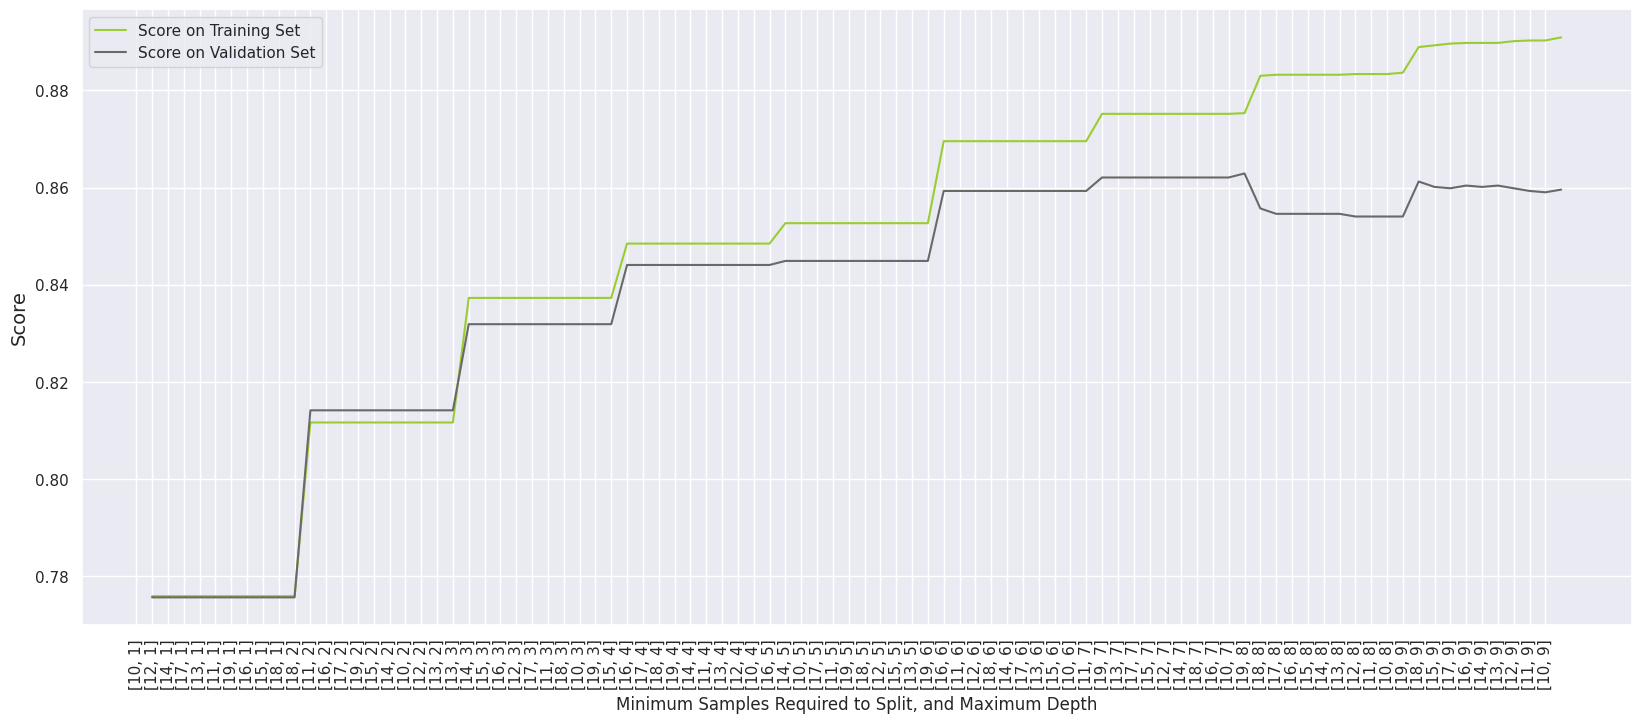

In [ ]:
# Plotting the scores to get the least overfitting value.
scores = pd.DataFrame({'Score_Train': scores_train,'Score_Val': scores_val,'Parameters': parameters}).sort_values(by=['Score_Train'])
plt.figure(figsize=(20,8))
plt.plot(list(range(1,91)), scores['Score_Train'], label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,91)), scores['Score_Val'], label="Score on Validation Set", color='dimgray')
plt.xlabel("Minimum Samples Required to Split, and Maximum Depth")
plt.ylabel("Score", fontsize=14)
plt.xticks(np.arange(len(parameters)), scores['Parameters'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# According to the plot, the chosen parameters are going to be: 7 maximum depths
# and 10 minimum samples required to do the split


In [ ]:
# Creating a Decision Tree with the chosen parameters:
modelDT_chosen_parameters = DecisionTreeClassifier(max_depth=7, min_samples_split=10)

In [ ]:
# Training the model:
modelDT_chosen_parameters.fit(X_train_model, y_train_model)

DecisionTreeClassifier(max_depth=7, min_samples_split=10)

In [ ]:
# Score for the train dataset for the decision tree (modelDT_chosen_parameters):
modelDT_chosen_parameters.score(X_train_model, y_train_model)

0.8753292986828053

In [ ]:
# Score for the validation dataset for the decision tree (modelDT_chosen_parameters):
modelDT_chosen_parameters.score(X_val_model, y_val_model)

0.8620880642481307

In [ ]:
# Now, with the appropriate parameters, our model is no longer overfitting.

## Ensemble Classifiers


### Random Forest

In [ ]:
# The difference from the previous models is that random forests, not only sample the data, it also samples the features it uses in each tree.

In [ ]:
# Creating an instance of Random Forests
modelRF = RandomForestClassifier()

In [ ]:
# Training the model on the training data
modelRF.fit(X_train_model, y_train_model)

RandomForestClassifier()

In [ ]:
# Score for the train dataset for the Random Forest (modelRF):
modelRF.score(X_train_model, y_train_model)

1.0

In [ ]:
# Score for the validation dataset for the Random Forest (modelRF):
modelRF.score(X_val_model, y_val_model)

0.8759346441428967

In [ ]:
# Checking the number of Decision Trees included in the Random Forest
len(modelRF.estimators_)

100

In [ ]:
# Create an instance of the random forest classifier
modelRF_parameters = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Perform grid search with 5 fold cross-validation
grid_search = GridSearchCV(modelRF, param_grid, cv=5)
grid_search.fit(X_train_model, y_train_model)

# Print the best parameters and corresponding validation score
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Validation score with the best parameters:", grid_search.best_score_)


Best n_estimators: 150
Best max_depth: 15
Validation score with the best parameters: 0.8742613029547883


In [ ]:
# Create an instance of the random forest classifier
modelRF_parameters10 = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Perform grid search with 10 fold cross-validation
grid_search = GridSearchCV(modelRF, param_grid, cv=10)
grid_search.fit(X_train_model, y_train_model)

# Print the best parameters and corresponding validation score
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Validation score with the best parameters:", grid_search.best_score_)


Best n_estimators: 50
Best max_depth: 15
Validation score with the best parameters: 0.8748311382830956


In [ ]:
# Performing a grid search with a 10 fold cross-validation provides a higher validation score and exacly the same number of estimators and max depth.

In [ ]:
# Creating an instance of Random Forests with the best parameters
modelRF_parameters10 = RandomForestClassifier(n_estimators=150, max_depth=15)

In [ ]:
# Training the model on the training data
modelRF_parameters10.fit(X_train_model, y_train_model)

RandomForestClassifier(max_depth=15, n_estimators=150)

In [ ]:
# Score for the train dataset for the Random Forest (modelRF_parameters10)
modelRF_parameters10.score(X_train_model, y_train_model)

0.9705233179067284

In [ ]:
# Score for the validation dataset for the Random Forest (modelRF_parameters10)
modelRF_parameters10.score(X_val_model, y_val_model)

0.8751038493492107

In [ ]:
# However, the model still appears to be overfitting. So, we'll continue to tune more parameters.

In [ ]:
# Create an instance of the random forest classifier
modelRF_parameters_best = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10]
}

# Perform grid search with 10-fold cross-validation
grid_search = GridSearchCV(modelRF_parameters_best, param_grid, cv=10)
grid_search.fit(X_train_model, y_train_model)

# Print the best parameters and corresponding validation score
print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best max_depth:", grid_search.best_params_['max_depth'])
print("Best min_samples_split:", grid_search.best_params_['min_samples_split'])
print("Validation score with the best parameters:", grid_search.best_score_)

Best n_estimators: 150
Best max_depth: 15
Best min_samples_split: 10
Validation score with the best parameters: 0.8761123784611329


In [ ]:
# Creating an instance of Random Forests with the best parameters
modelRF_parameters_best = RandomForestClassifier(n_estimators=150, max_depth=15, min_samples_split=10)

In [ ]:
# Training the model on the training data
modelRF_parameters_best.fit(X_train_model, y_train_model)

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=150)

In [ ]:
# Score for the train dataset for the Random Forest (modelRF_parameters_best)
modelRF_parameters_best.score(X_train_model, y_train_model)

0.9295122819508722

In [ ]:
# Score for the validation dataset for the Random Forest (modelRF_parameters_best)
modelRF_parameters_best.score(X_val_model, y_val_model)

0.8726114649681529

### Bagging


**Decision Tree as base estimator**

In [ ]:
# Creating an instance of a Bagging ensemble with Decision Tree as the base estimater:
bagging_DT = BaggingClassifier(base_estimator = modelDT)

In [ ]:
# On a bagging classifier, when we create an instance, one of the parameters we need to set is the base learner. In this case, we're using the decision tree we created before.
# As soon as we run this cell, we'll create 10 decision trees (which is defined by default if we check the parameters of this fucntion), which will all train in parallel on different subsets of data.

In [ ]:
# Training the model:
bagging_DT.fit(X = X_train_model, y = y_train_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
# Check if the model is overfitting
# Score for the train dataset for the decision tree (bagging_DT):
bagging_DT.score(X_train_model, y_train_model)

0.9935208259166963

In [ ]:
# Score for the validation dataset for the decision tree (bagging_DT):
bagging_DT.score(X_val_model, y_val_model)

0.8565494322902243

In [ ]:
# Yes, it's overfitting, since the score for the train dataset is very close to 1 and considerably far from the validation score.

**Decision Tree with chosen parameters as base estimator**

In [ ]:
# Creating an instance of a Bagging ensemble with Decision Tree as the base estimater:
bagging_DT_parameters = BaggingClassifier(base_estimator = modelDT_chosen_parameters)

In [ ]:
# Training the model:
bagging_DT_parameters.fit(X = X_train_model, y = y_train_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        min_samples_split=10))

In [ ]:
# Check if the model is overfitting
# Score for the train dataset for the decision tree (bagging_DT):
bagging_DT_parameters.score(X_train_model, y_train_model)

0.8786756852972588

In [ ]:
# Score for the validation dataset for the decision tree (bagging_DT):
bagging_DT_parameters.score(X_val_model, y_val_model)

0.8626419274439213

In [ ]:
# Loop to find the best combination of base estimators and nr of estimators

# Base estimators: Default Decision Tree and the Decision Tree with chosen parameters
# Nrº of estimators: 20, 40, 50, 60 and 70

In [ ]:
# Changing the parameters to improve our model.
# Creating a loop that test different parameters combinations allows us to find the model with best score without overfitting
# Model: bagging_best


# List of base estimators to try
base_estimators = [('modelDT', modelDT), ('modelDT_chosen_parameters', modelDT_chosen_parameters)]

# List of number of estimators to try
n_estimators_list = [20, 40, 50, 60, 70]

# Overfitting threshold the loop to select an overfitting model
overfitting_threshold = 0.03

# Initial best score and lowest overfitting
best_score = 0
lowest_overfitting = float('inf')
best_estimator = None
best_n_estimators = None
best_estimator_name = None

# Loop through base estimators
for base_estimator_name, base_estimator in base_estimators:
    # Loop through n_estimators
    for n_estimators in n_estimators_list:
        # Define the model
        bagging_best = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=5)
        bagging_best.fit(X_train_model, y_train_model)

        # Training Score
        train_score = bagging_best.score(X_train_model, y_train_model)

        # Validation Score
        validation_score = bagging_best.score(X_val_model, y_val_model)

        # Calculate overfitting
        overfitting = train_score - validation_score

        # Print the scores
        print(f'Training score for Bagging with {base_estimator_name} and {n_estimators} estimators: {train_score}')
        print(f'Validation score for Bagging with {base_estimator_name} and {n_estimators} estimators: {validation_score}')

        # If the current model has a better score than our current best score and overfitting is below threshold, update best_score, best_estimator, best_estimator_name, and best_n_estimators
        if validation_score > best_score and overfitting < overfitting_threshold:
            best_score = validation_score
            lowest_overfitting = overfitting
            best_estimator = base_estimator
            best_estimator_name = base_estimator_name
            best_n_estimators = n_estimators

print("\nBest score with acceptable overfitting was with", best_estimator_name, "and", best_n_estimators, "estimators, achieving a validation score of", best_score)


Training score for Bagging with modelDT and 20 estimators: 0.9967960128159488
Validation score for Bagging with modelDT and 20 estimators: 0.8665189698144559
Training score for Bagging with modelDT and 40 estimators: 0.9990744037023852
Validation score for Bagging with modelDT and 40 estimators: 0.8670728330102465
Training score for Bagging with modelDT and 50 estimators: 0.9995728017087931
Validation score for Bagging with modelDT and 50 estimators: 0.8703960121849903
Training score for Bagging with modelDT and 60 estimators: 0.9997864008543966
Validation score for Bagging with modelDT and 60 estimators: 0.8706729437828856
Training score for Bagging with modelDT and 70 estimators: 1.0
Validation score for Bagging with modelDT and 70 estimators: 0.8695652173913043
Training score for Bagging with modelDT_chosen_parameters and 20 estimators: 0.8808828764684942
Validation score for Bagging with modelDT_chosen_parameters and 20 estimators: 0.8687344225976183
Training score for Bagging with

In [ ]:
# The best model is the one where we use modelDT_chosen_parameters as base estimator with 40 estimators resulting in a train score of 0.8794 and a validation score of 0.8690

**Changing the max_samples**

In [ ]:
# Now we can change the number of samples used for each base estimator to half of the dataset by
# setting max_samples = 0.5. The default parameter is 1.0, so by default you use samples that have the
# same size as your dataset.

# By default, the tree also uses the entire dataset, se we're going to make
# use of the bootstrap possibilities and we're going to say that in each one of these new trees, we're
# not going to train with the entire dataset, we're only going to train with 50% of the dataset.

In [ ]:
bagging_DT_s = BaggingClassifier(base_estimator = modelDT_chosen_parameters, max_samples = 0.5, random_state = 5)

In [ ]:
# Training the model:
bagging_DT_s.fit(X = X_train_model, y = y_train_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        min_samples_split=10),
                  max_samples=0.5, random_state=5)

In [ ]:
# Check if the model is overfitting
# Score for the train dataset for the decision tree (bagging_DT_s):
bagging_DT_s.score(X_train_model, y_train_model)

0.8778924884300463

In [ ]:
# Score for the validation dataset for the decision tree (bagging_DT):
bagging_DT_s.score(X_val_model, y_val_model)

0.862364995846026

**Changing boostrap to False**

In [ ]:
# Finally, we can change the way samples are drawn by setting bootstrap = False. The default parameter
# is True, so samples are drawn with replacement. In this decision tree we're saying that we don't want
# our samples to be picked with replacement.

In [ ]:
bagging_DT_b = BaggingClassifier(base_estimator = modelDT_chosen_parameters, bootstrap = False, random_state = 5)

In [ ]:
# Training the model:
bagging_DT_b.fit(X = X_train_model, y = y_train_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7,
                                                        min_samples_split=10),
                  bootstrap=False, random_state=5)

In [ ]:
# Score for the train dataset for the decision tree (bagging_DT_b):
bagging_DT_b.score(X = X_train_model, y = y_train_model)

0.8754004983980064

In [ ]:
# Score for the validation dataset for the decision tree (bagging_DT_b):
bagging_DT_b.score(X = X_val_model, y = y_val_model)

0.8620880642481307

In [ ]:
# Our best model is B-best, which corresponds to bagging_best. In general, the scores for bagging models are greater than the Decision Trees.

In [ ]:
# Loop to find the best combination of new base estimators and nr of estimators

# Base estimators: KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(), GaussianNB(), SVC()
# Nrº of estimators: 20, 40, 50, 60 and 70

In [ ]:
# Changing the parameters to improve our model.
# Creating a loop that test different parameters combinations allows us to find the model with best score without overfitting
# Model: bagging_news


# List of base estimators to try
base_estimators = [('KNeighborsClassifier', KNeighborsClassifier()),
                   ('RandomForestClassifier', RandomForestClassifier()),
                   ('LogisticRegression', LogisticRegression()),
                   ('GaussianNB', GaussianNB()),
                   ('SVC', SVC())]

# List of number of estimators to try
n_estimators_list = [20, 40, 50, 60, 70]

# Overfitting threshold
overfitting_threshold = 0.03

# Initial best score and lowest overfitting
best_score = 0
lowest_overfitting = float('inf')
best_estimator = None
best_n_estimators = None
best_estimator_name = None
bagging_news = None

# Loop through base estimators
for base_estimator_name, base_estimator in base_estimators:
    # Loop through n_estimators
    for n_estimators in n_estimators_list:
        # Define the model
        bagging_news = BaggingClassifier(base_estimator=base_estimator, n_estimators=n_estimators, random_state=5)
        bagging_news.fit(X_train_model, y_train_model)

        # Training Score
        train_score = bagging_news.score(X_train_model, y_train_model)

        # Validation Score
        validation_score = bagging_news.score(X_val_model, y_val_model)

        # Calculate overfitting
        overfitting = train_score - validation_score

        # Print the scores
        print(f'Training score for Bagging with {base_estimator_name} and {n_estimators} estimators: {train_score}')
        print(f'Validation score for Bagging with {base_estimator_name} and {n_estimators} estimators: {validation_score}')

        # If the current model has a better score than our current best score and overfitting is below threshold, update best_score, best_estimator, best_estimator_name, best_n_estimators, and bagging_best
        if validation_score > best_score and overfitting < overfitting_threshold:
            best_score = validation_score
            lowest_overfitting = overfitting
            best_estimator = base_estimator
            best_estimator_name = base_estimator_name
            best_n_estimators = n_estimators

print("\nBest score with acceptable overfitting was with", best_estimator_name, "and", best_n_estimators, "estimators, achieving a validation score of", best_score)


Training score for Bagging with KNeighborsClassifier and 20 estimators: 0.878248487006052
Validation score for Bagging with KNeighborsClassifier and 20 estimators: 0.8294101356964829
Training score for Bagging with KNeighborsClassifier and 40 estimators: 0.8797436810252759
Validation score for Bagging with KNeighborsClassifier and 40 estimators: 0.8305178620880642
Training score for Bagging with KNeighborsClassifier and 50 estimators: 0.8796724813100748
Validation score for Bagging with KNeighborsClassifier and 50 estimators: 0.8302409304901689
Training score for Bagging with KNeighborsClassifier and 60 estimators: 0.8800996796012815
Validation score for Bagging with KNeighborsClassifier and 60 estimators: 0.8299639988922736
Training score for Bagging with KNeighborsClassifier and 70 estimators: 0.8806692773228907
Validation score for Bagging with KNeighborsClassifier and 70 estimators: 0.8305178620880642
Training score for Bagging with RandomForestClassifier and 20 estimators: 0.97130

In [ ]:
# The best model is the one where we use SVC as base estimator with 70 estimators resulting in a train score of 0.8563 and a validation score of 0.8332

###XGBoost - Extra Predictive Model

In [ ]:
# Create and train the XGBoost classifier
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train_model, y_train_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Evaluate the model using the score method on the training data
model_xgb.score(X_train_model, y_train_model)

0.9512281950872197

In [ ]:
# Evaluate the model using the score method on the validation data
model_xgb.score(X_val_model, y_val_model)

0.8706729437828856

In [ ]:
# Our model might be overfitting. Therefore, we'll adjust the parameters by using a Grid Search to find the best parameters.
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.5, 1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBoost classifier
model_xgb_adjusted = xgb.XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=model_xgb_adjusted, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_model, y_train_model)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the validation set
best_model = grid_search.best_estimator_
val_score = best_model.score(X_val_model, y_val_model)
print("Validation score with best model:", val_score)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}
Validation score with best model: 0.8820271392965937


In [ ]:
# Creating a model of XGBoost with the best parameters selected above:
model_xgb_best = xgb.XGBClassifier(colsample_bytree = 0.8, gamma = 0.5, max_depth = 3, min_child_weight = 1, subsample = 0.8)
model_xgb_best.fit(X_train_model, y_train_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Evaluate the model using the score method on the training data
model_xgb_best.score(X_train_model, y_train_model)

0.8911356354574582

In [ ]:
# Evaluate the model using the score method on the validation data
model_xgb_best.score(X_val_model, y_val_model)

0.8820271392965937

##Neural Networks

In [ ]:
# Creating a function that will return the average score value for the train and validation set by applying a certain neural network.
def avg_score(model, number_splits):

    # create lists to store the results from the different neural networks
    score_train = []
    score_test = []
    timer = []
    n_iter = []

    # apply kfold with the pre-defined number_splits
    kf = KFold(n_splits=number_splits)

    for train_index, val_index in kf.split(X_train_model):

        # get the indexes of the observations assigned for each partition
        X_train_temp, X_val_temp = X_train_model.iloc[train_index], X_train_model.iloc[val_index]
        y_train_temp, y_val_temp = y_train_model.iloc[train_index], y_train_model.iloc[val_index]

        #---> start counting time
        begin = time.perf_counter()

        # fit the model to the data
        model.fit(X_train_temp, y_train_temp)

        #---> finish counting time
        end = time.perf_counter()

        # check the mean accuracy for the train
        value_train = model.score(X_train_temp, y_train_temp)
        # check the mean accuracy for the test
        value_test = model.score(X_val_temp, y_val_temp)

        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        timer.append(end-begin)
        n_iter.append(model.n_iter_)

    # calculate the average and the std for each measure (accuracy, time and number of iterations)
    ### AVG
    avg_time = round(np.mean(timer),3)
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    avg_iter = round(np.mean(n_iter),1)
    ### STD
    std_time = round(np.std(timer),2)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    std_iter = round(np.std(n_iter),1)

    return str(avg_time) + '+/-' + str(std_time), str(avg_train) + '+/-' + str(std_train),\
str(avg_test) + '+/-' + str(std_test), str(avg_iter) + '+/-' + str(std_iter)

In [ ]:
# Creating a function that will return the average score for the train and validation dataset
def show_results(df, *args, number_splits):
    """
    Receive an empty dataframe and the different models and call the function avg_score
    """
    count = 0
    # for each model passed as argument
    for arg in args:
        # obtain the results provided by avg_score
        time, avg_train, avg_val, avg_iter = avg_score(arg, number_splits)
        # store the results in the right row
        df.iloc[count] = time, avg_train, avg_val, avg_iter
        count+=1
    return df

In [ ]:
# Creating a instance of MLPClassifier with the default parameters.
model_nn = MLPClassifier()
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['Raw'])
show_results(df, model_nn, number_splits=10)

Time        Train   Validation   Iterations
Raw  26.621+/-4.35  0.875+/-0.0  0.86+/-0.01  200.0+/-0.0

In [ ]:
# Create an MLPClassifier with two hidden layer and one neuron and name it model_simple
model_nn2 = MLPClassifier(hidden_layer_sizes=(2), activation = 'relu', solver = 'adam', learning_rate_init = 0.03)

In [ ]:
df = pd.DataFrame(columns = ['Time','Train','Validation', 'Iterations'], index = ['nn2'])
show_results(df, model_nn2,number_splits= 10)

Time        Train   Validation   Iterations
nn2  1.425+/-0.88  0.792+/-0.1  0.794+/-0.1  41.0+/-23.4

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Define lists of numbers of neurons for each hidden layer to iterate over
num_neurons_list_layer1 = [5, 10, 15]
num_neurons_list_layer2 = [5, 10, 15]

best_accuracy = 0.0
best_neurons_layer1 = None
best_neurons_layer2 = None

# Iterate over the different numbers of neurons in each hidden layer
for num_neurons_layer1 in num_neurons_list_layer1:
    for num_neurons_layer2 in num_neurons_list_layer2:
        # Create an MLP classifier with the specified number of neurons in each hidden layer
        clf = MLPClassifier(hidden_layer_sizes=(num_neurons_layer1, num_neurons_layer2), activation='relu', random_state=42)

        # Perform cross-validation and compute the mean accuracy score
        scores = cross_val_score(clf, X_train_model, y_train_model, cv=5)
        mean_accuracy = scores.mean()

        # Print the results
        print(f"Number of Neurons (Layer 1): {num_neurons_layer1} - Number of Neurons (Layer 2): {num_neurons_layer2} - Mean Accuracy: {mean_accuracy}")

        # Check if the current combination has better accuracy than the previous best
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_neurons_layer1 = num_neurons_layer1
            best_neurons_layer2 = num_neurons_layer2

# Print the best combination of parameters
print(f"\nBest Number of Neurons (Layer 1): {best_neurons_layer1} - Best Number of Neurons (Layer 2): {best_neurons_layer2} - Best Mean Accuracy: {best_accuracy}")


Number of Neurons (Layer 1): 5 - Number of Neurons (Layer 2): 5 - Mean Accuracy: 0.8461374154503382
Number of Neurons (Layer 1): 5 - Number of Neurons (Layer 2): 10 - Mean Accuracy: 0.8454254182983268
Number of Neurons (Layer 1): 5 - Number of Neurons (Layer 2): 15 - Mean Accuracy: 0.8472766108935563
Number of Neurons (Layer 1): 10 - Number of Neurons (Layer 2): 5 - Mean Accuracy: 0.8576005695977216
Number of Neurons (Layer 1): 10 - Number of Neurons (Layer 2): 10 - Mean Accuracy: 0.8555357778568885
Number of Neurons (Layer 1): 10 - Number of Neurons (Layer 2): 15 - Mean Accuracy: 0.8580989676041295
Number of Neurons (Layer 1): 15 - Number of Neurons (Layer 2): 5 - Mean Accuracy: 0.8570309718761125
Number of Neurons (Layer 1): 15 - Number of Neurons (Layer 2): 10 - Mean Accuracy: 0.85311498754005
Number of Neurons (Layer 1): 15 - Number of Neurons (Layer 2): 15 - Mean Accuracy: 0.8565325738697045

Best Number of Neurons (Layer 1): 10 - Best Number of Neurons (Layer 2): 15 - Best Mean A

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(10, 15)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]
}

In [ ]:
clf = GridSearchCV(model_nn, parameter_space)

In [ ]:
clf.fit(X_train_model, y_train_model)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 15)],
                         'learning_rate_init': [0.0001, 0.001, 0.01, 0.1],
                         'solver': ['sgd', 'adam']})

In [ ]:
clf.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (10, 15),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [ ]:
model_clf = clf.best_estimator_.fit(X_train_model, y_train_model)
print('Train:', model_clf.score(X_train_model, y_train_model))
print('Validation:', model_clf.score(X_val_model, y_val_model))

Train: 0.8813100747597009
Validation: 0.8515646635281086


In [ ]:
# Best parameter set
print('------------------------------------------------------------------------------------------------------------------------')
print('Best parameters found:\n', clf.best_params_)
print('------------------------------------------------------------------------------------------------------------------------')

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std , params))

------------------------------------------------------------------------------------------------------------------------
Best parameters found:
 {'activation': 'tanh', 'hidden_layer_sizes': (10, 15), 'learning_rate_init': 0.01, 'solver': 'adam'}
------------------------------------------------------------------------------------------------------------------------
0.817 (+/-0.009) for {'activation': 'tanh', 'hidden_layer_sizes': (10, 15), 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.841 (+/-0.003) for {'activation': 'tanh', 'hidden_layer_sizes': (10, 15), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.842 (+/-0.004) for {'activation': 'tanh', 'hidden_layer_sizes': (10, 15), 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.856 (+/-0.005) for {'activation': 'tanh', 'hidden_layer_sizes': (10, 15), 'learning_rate_init': 0.001, 'solver': 'adam'}
0.852 (+/-0.006) for {'activation': 'tanh', 'hidden_layer_sizes': (10, 15), 'learning_rate_init': 0.01, 'solver': 'sgd'}
0.861 (+/-0.007) for

#Performance Assessment

In [ ]:
# Creating a bar plot showing the accuracy obtained by the different models built on both the validation and train sets.
accuracies_val = [modelNB.score(X_val_model, y_val_model),
                  modelKNN.score(X_val_model, y_val_model),
                  modelKNN7.score(X_val_model, y_val_model),
                  modelKNNM.score(X_val_model, y_val_model),
                  modelKNNW.score(X_val_model, y_val_model),
                  modelDT.score(X_val_model, y_val_model),
                  modelDT_entropy.score(X_val_model, y_val_model),
                  modelDT_chosen_parameters.score(X_val_model, y_val_model),
                  modelRF.score(X_val_model, y_val_model),
                  modelRF_parameters10.score(X_val_model, y_val_model),
                  modelRF_parameters_best.score(X_val_model, y_val_model),
                  bagging_DT.score(X_val_model, y_val_model),
                  bagging_DT_parameters.score(X_val_model, y_val_model),
                  bagging_best.score(X_val_model, y_val_model),
                  bagging_DT_s.score(X_val_model, y_val_model),
                  bagging_DT_b.score(X_val_model, y_val_model),
                  bagging_news.score(X_val_model, y_val_model),
                  model_xgb.score(X_val_model, y_val_model),
                  model_xgb_best.score(X_val_model, y_val_model),
                  model_nn.score(X_val_model, y_val_model),
                  model_nn2.score(X_val_model, y_val_model),
                  model_clf.score(X_val_model, y_val_model)]

accuracies_train = [modelNB.score(X_train_model, y_train_model),
                  modelKNN.score(X_train_model, y_train_model),
                  modelKNN7.score(X_train_model, y_train_model),
                  modelKNNM.score(X_train_model, y_train_model),
                  modelKNNW.score(X_train_model, y_train_model),
                  modelDT.score(X_train_model, y_train_model),
                  modelDT_entropy.score(X_train_model, y_train_model),
                  modelDT_chosen_parameters.score(X_train_model, y_train_model),
                  modelRF.score(X_train_model, y_train_model),
                  modelRF_parameters10.score(X_train_model, y_train_model),
                  modelRF_parameters_best.score(X_train_model, y_train_model),
                  bagging_DT.score(X_train_model, y_train_model),
                  bagging_DT_parameters.score(X_train_model, y_train_model),
                  bagging_best.score(X_train_model, y_train_model),
                  bagging_DT_s.score(X_train_model, y_train_model),
                  bagging_DT_b.score(X_train_model, y_train_model),
                  bagging_news.score(X_train_model, y_train_model),
                  model_xgb.score(X_train_model, y_train_model),
                  model_xgb_best.score(X_train_model, y_train_model),
                  model_nn.score(X_train_model, y_train_model),
                  model_nn2.score(X_train_model, y_train_model),
                  model_clf.score(X_train_model, y_train_model)]
models = ['NB','KNN', 'KNN7','KNNM','KNNW','DT', 'DT-E', 'DT-CP', 'RF', 'RF-P10', 'RF-PB', 'B', 'B-CP', 'B-Best', 'B-S', 'B-B', 'B-N', 'XGB', 'XGB-B', 'NN', 'NN2', 'NN-CLF']
data_tuples = list(zip(models,accuracies_val))
data_val = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,accuracies_train))
data_train = pd.DataFrame(data_tuples_train)

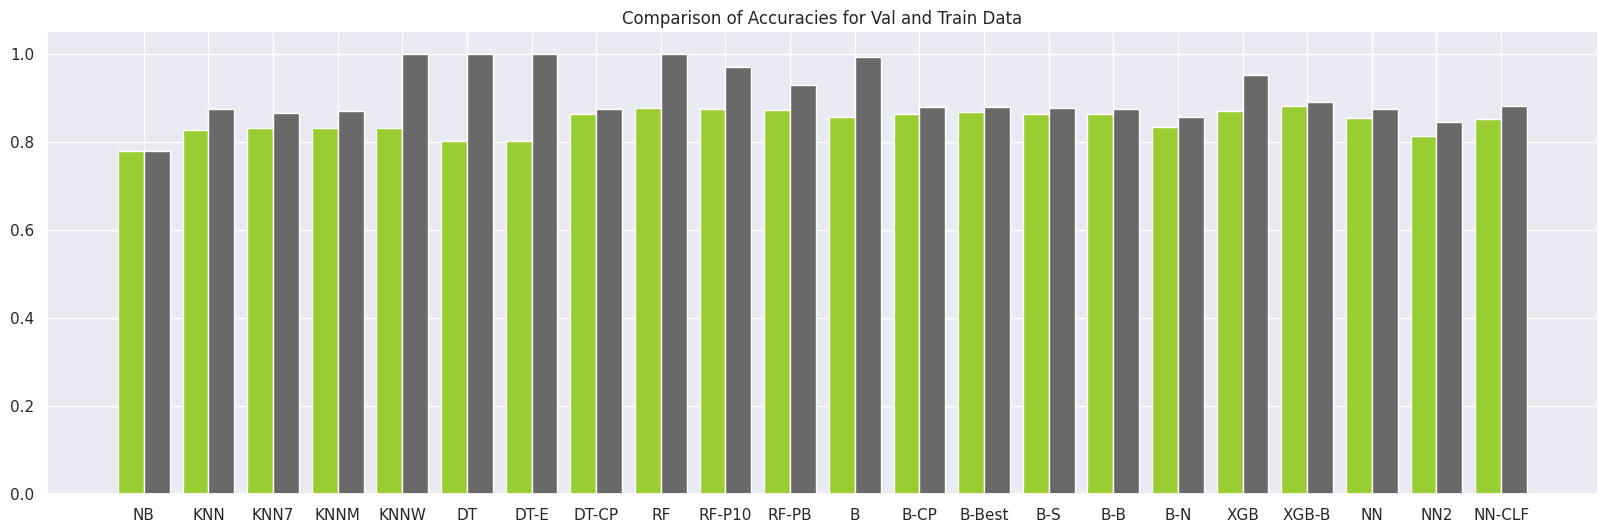

In [ ]:
plt.figure(figsize=(20,6))
ax = plt.subplot(111)
bar1 = ax.bar(data_val.index - 0.4/2, data_val[1], width=0.4, color='yellowgreen', label='Val Accuracy')
bar2 = ax.bar(data_train.index + 0.4/2, data_train[1],  width=0.4, color='dimgray', label='Train Accuracy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Accuracies for Val and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)

plt.show()


In [ ]:
# Create a dataframe with the model names and validation scores
data_val = pd.DataFrame({'Model': models, 'Validation Score': accuracies_val})

# Create a dataframe with the model names and train scores
data_train = pd.DataFrame({'Model': models, 'Train Score': accuracies_train})

# Display the table for validation scores
print("Validation Scores:")
print(tabulate(data_val, headers='keys', tablefmt='psql'))

# Display the table for train scores
print("\nTrain Scores:")
print(tabulate(data_train, headers='keys', tablefmt='psql'))


Validation Scores:
+----+---------+--------------------+
|    | Model   |   Validation Score |
|----+---------+--------------------|
|  0 | NB      |           0.779009 |
|  1 | KNN     |           0.827749 |
|  2 | KNN7    |           0.831072 |
|  3 | KNNM    |           0.831349 |
|  4 | KNNW    |           0.831903 |
|  5 | DT      |           0.802271 |
|  6 | DT-E    |           0.801717 |
|  7 | DT-CP   |           0.862088 |
|  8 | RF      |           0.875935 |
|  9 | RF-P10  |           0.875104 |
| 10 | RF-PB   |           0.872611 |
| 11 | B       |           0.856549 |
| 12 | B-CP    |           0.862642 |
| 13 | B-Best  |           0.868457 |
| 14 | B-S     |           0.862365 |
| 15 | B-B     |           0.862088 |
| 16 | B-N     |           0.833287 |
| 17 | XGB     |           0.870673 |
| 18 | XGB-B   |           0.882027 |
| 19 | NN      |           0.853503 |
| 20 | NN2     |           0.813348 |
| 21 | NN-CLF  |           0.851565 |
+----+---------+---------------

In [ ]:
# Calculate precision for validation set
precisions_val = [
    precision_score(y_val_model, modelNB.predict(X_val_model)),
    precision_score(y_val_model, modelKNN.predict(X_val_model)),
    precision_score(y_val_model, modelKNN7.predict(X_val_model)),
    precision_score(y_val_model, modelKNNM.predict(X_val_model)),
    precision_score(y_val_model, modelKNNW.predict(X_val_model)),
    precision_score(y_val_model, modelDT.predict(X_val_model)),
    precision_score(y_val_model, modelDT_entropy.predict(X_val_model)),
    precision_score(y_val_model, modelDT_chosen_parameters.predict(X_val_model)),
    precision_score(y_val_model, modelRF.predict(X_val_model)),
    precision_score(y_val_model, modelRF_parameters10.predict(X_val_model)),
    precision_score(y_val_model, modelRF_parameters_best.predict(X_val_model)),
    precision_score(y_val_model, bagging_DT.predict(X_val_model)),
    precision_score(y_val_model, bagging_DT_parameters.predict(X_val_model)),
    precision_score(y_val_model, bagging_best.predict(X_val_model)),
    precision_score(y_val_model, bagging_DT_s.predict(X_val_model)),
    precision_score(y_val_model, bagging_DT_b.predict(X_val_model)),
    precision_score(y_val_model, bagging_news.predict(X_val_model)),
    precision_score(y_val_model, model_xgb.predict(X_val_model)),
    precision_score(y_val_model, model_xgb_best.predict(X_val_model)),
    precision_score(y_val_model, model_nn.predict(X_val_model)),
    precision_score(y_val_model, model_nn2.predict(X_val_model)),
    precision_score(y_val_model, model_clf.predict(X_val_model))
]

# Calculate precision for training set
precisions_train = [
    precision_score(y_train_model, modelNB.predict(X_train_model)),
    precision_score(y_train_model, modelKNN.predict(X_train_model)),
    precision_score(y_train_model, modelKNN7.predict(X_train_model)),
    precision_score(y_train_model, modelKNNM.predict(X_train_model)),
    precision_score(y_train_model, modelKNNW.predict(X_train_model)),
    precision_score(y_train_model, modelDT.predict(X_train_model)),
    precision_score(y_train_model, modelDT_entropy.predict(X_train_model)),
    precision_score(y_train_model, modelDT_chosen_parameters.predict(X_train_model)),
    precision_score(y_train_model, modelRF.predict(X_train_model)),
    precision_score(y_train_model, modelRF_parameters10.predict(X_train_model)),
    precision_score(y_train_model, modelRF_parameters_best.predict(X_train_model)),
    precision_score(y_train_model, bagging_DT.predict(X_train_model)),
    precision_score(y_train_model, bagging_DT_parameters.predict(X_train_model)),
    precision_score(y_train_model, bagging_best.predict(X_train_model)),
    precision_score(y_train_model, bagging_DT_s.predict(X_train_model)),
    precision_score(y_train_model, bagging_DT_b.predict(X_train_model)),
    precision_score(y_train_model, bagging_news.predict(X_train_model)),
    precision_score(y_train_model, model_xgb.predict(X_train_model)),
    precision_score(y_train_model, model_xgb_best.predict(X_train_model)),
    precision_score(y_train_model, model_nn.predict(X_train_model)),
    precision_score(y_train_model, model_nn2.predict(X_train_model)),
    precision_score(y_train_model, model_clf.predict(X_train_model))
]

models = ['NB','KNN', 'KNN7','KNNM','KNNW','DT', 'DT-E', 'DT-CP', 'RF', 'RF-P10', 'RF-PB', 'B', 'B-CP', 'B-Best', 'B-S', 'B-B', 'B-N', 'XGB', 'XGB-B', 'NN', 'NN2', 'NN-CLF']
data_tuples = list(zip(models,precisions_val))
data_val_precision = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,precisions_train))
data_train_precision = pd.DataFrame(data_tuples_train)

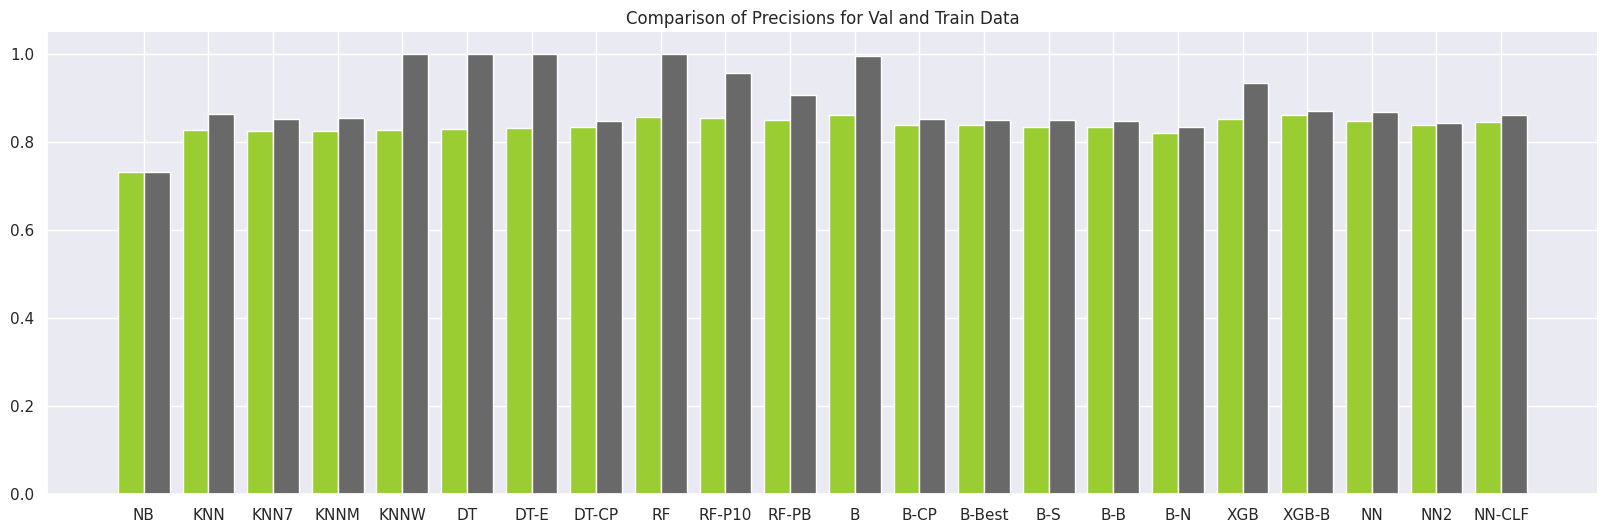

In [ ]:
plt.figure(figsize=(20,6))
ax = plt.subplot(111)
bar1 = ax.bar(data_val_precision.index - 0.4/2, data_val_precision[1], width=0.4, color='yellowgreen', label='Val Precision')
bar2 = ax.bar(data_train_precision.index + 0.4/2, data_train_precision[1],  width=0.4, color='dimgray', label='Train Precision')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Precisions for Val and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)

plt.show()

In [ ]:
# Create a dataframe with the model names and validation precision scores
data_val_precision = pd.DataFrame({'Model': models, 'Validation Precision': precisions_val})

# Create a dataframe with the model names and train precision scores
data_train_precision = pd.DataFrame({'Model': models, 'Train Precision': precisions_train})

# Display the table for validation precision scores
print("Validation Precision Scores:")
print(tabulate(data_val_precision, headers='keys', tablefmt='psql'))

# Display the table for train precision scores
print("\nTrain Precision Scores:")
print(tabulate(data_train_precision, headers='keys', tablefmt='psql'))


Validation Precision Scores:
+----+---------+------------------------+
|    | Model   |   Validation Precision |
|----+---------+------------------------|
|  0 | NB      |               0.731941 |
|  1 | KNN     |               0.827837 |
|  2 | KNN7    |               0.825665 |
|  3 | KNNM    |               0.824097 |
|  4 | KNNW    |               0.826988 |
|  5 | DT      |               0.829291 |
|  6 | DT-E    |               0.832485 |
|  7 | DT-CP   |               0.832998 |
|  8 | RF      |               0.855653 |
|  9 | RF-P10  |               0.853112 |
| 10 | RF-PB   |               0.850518 |
| 11 | B       |               0.861246 |
| 12 | B-CP    |               0.838301 |
| 13 | B-Best  |               0.838579 |
| 14 | B-S     |               0.83414  |
| 15 | B-B     |               0.833266 |
| 16 | B-N     |               0.821118 |
| 17 | XGB     |               0.85272  |
| 18 | XGB-B   |               0.860242 |
| 19 | NN      |               0.847901 |
| 20 

In [ ]:
# Calculate recall for validation set
recalls_val = [
    recall_score(y_val_model, modelNB.predict(X_val_model)),
    recall_score(y_val_model, modelKNN.predict(X_val_model)),
    recall_score(y_val_model, modelKNN7.predict(X_val_model)),
    recall_score(y_val_model, modelKNNM.predict(X_val_model)),
    recall_score(y_val_model, modelKNNW.predict(X_val_model)),
    recall_score(y_val_model, modelDT.predict(X_val_model)),
    recall_score(y_val_model, modelDT_entropy.predict(X_val_model)),
    recall_score(y_val_model, modelDT_chosen_parameters.predict(X_val_model)),
    recall_score(y_val_model, modelRF.predict(X_val_model)),
    recall_score(y_val_model, modelRF_parameters10.predict(X_val_model)),
    recall_score(y_val_model, modelRF_parameters_best.predict(X_val_model)),
    recall_score(y_val_model, bagging_DT.predict(X_val_model)),
    recall_score(y_val_model, bagging_DT_parameters.predict(X_val_model)),
    recall_score(y_val_model, bagging_best.predict(X_val_model)),
    recall_score(y_val_model, bagging_DT_s.predict(X_val_model)),
    recall_score(y_val_model, bagging_DT_b.predict(X_val_model)),
    recall_score(y_val_model, bagging_news.predict(X_val_model)),
    recall_score(y_val_model, model_xgb.predict(X_val_model)),
    recall_score(y_val_model, model_xgb_best.predict(X_val_model)),
    recall_score(y_val_model, model_nn.predict(X_val_model)),
    recall_score(y_val_model, model_nn2.predict(X_val_model)),
    recall_score(y_val_model, model_clf.predict(X_val_model))
]

# Calculate recall for training set
recalls_train = [
    recall_score(y_train_model, modelNB.predict(X_train_model)),
    recall_score(y_train_model, modelKNN.predict(X_train_model)),
    recall_score(y_train_model, modelKNN7.predict(X_train_model)),
    recall_score(y_train_model, modelKNNM.predict(X_train_model)),
    recall_score(y_train_model, modelKNNW.predict(X_train_model)),
    recall_score(y_train_model, modelDT.predict(X_train_model)),
    recall_score(y_train_model, modelDT_entropy.predict(X_train_model)),
    recall_score(y_train_model, modelDT_chosen_parameters.predict(X_train_model)),
    recall_score(y_train_model, modelRF.predict(X_train_model)),
    recall_score(y_train_model, modelRF_parameters10.predict(X_train_model)),
    recall_score(y_train_model, modelRF_parameters_best.predict(X_train_model)),
    recall_score(y_train_model, bagging_DT.predict(X_train_model)),
    recall_score(y_train_model, bagging_DT_parameters.predict(X_train_model)),
    recall_score(y_train_model, bagging_best.predict(X_train_model)),
    recall_score(y_train_model, bagging_DT_s.predict(X_train_model)),
    recall_score(y_train_model, bagging_DT_b.predict(X_train_model)),
    recall_score(y_train_model, bagging_news.predict(X_train_model)),
    recall_score(y_train_model, model_xgb.predict(X_train_model)),
    recall_score(y_train_model, model_xgb_best.predict(X_train_model)),
    recall_score(y_train_model, model_nn.predict(X_train_model)),
    recall_score(y_train_model, model_nn2.predict(X_train_model)),
    recall_score(y_train_model, model_clf.predict(X_train_model))
]

models = ['NB','KNN', 'KNN7','KNNM','KNNW','DT', 'DT-E', 'DT-CP', 'RF', 'RF-P10', 'RF-PB', 'B', 'B-CP', 'B-Best', 'B-S', 'B-B', 'B-N', 'XGB', 'XGB-B', 'NN', 'NN2', 'NN-CLF']
data_tuples = list(zip(models,recalls_val))
data_val_recall = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,recalls_train))
data_train_recall = pd.DataFrame(data_tuples_train)

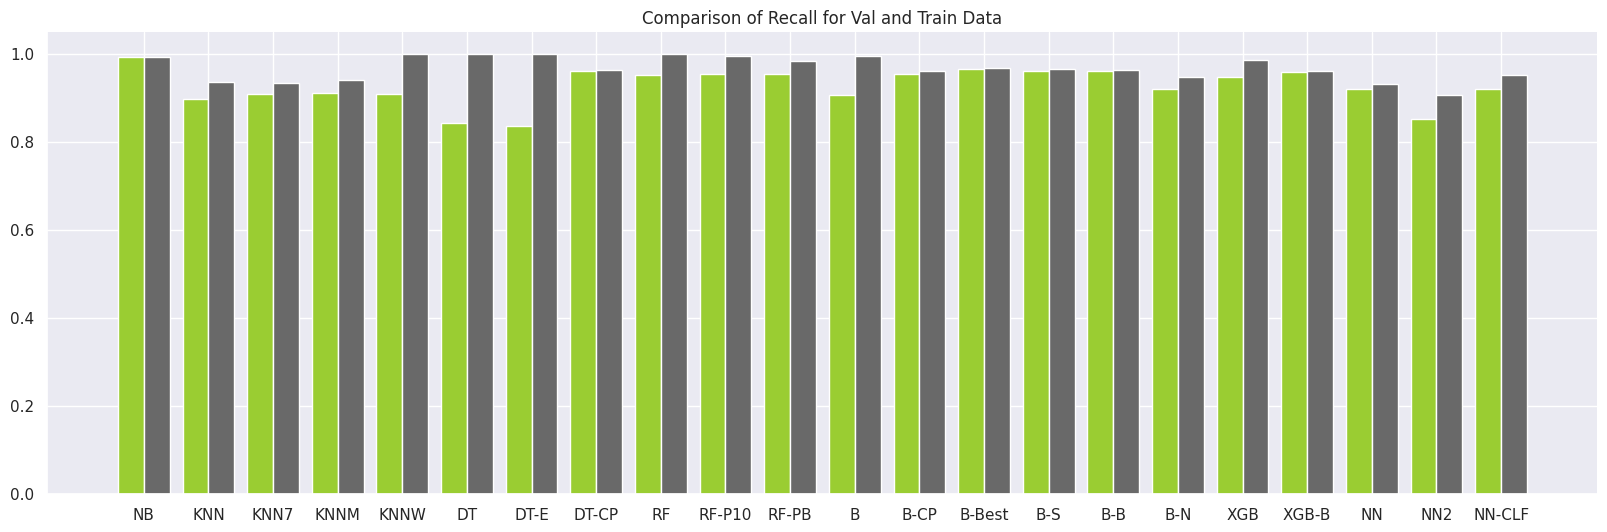

In [ ]:
plt.figure(figsize=(20,6))
ax = plt.subplot(111)
bar1 = ax.bar(data_val_recall.index - 0.4/2, data_val_recall[1], width=0.4, color='yellowgreen', label='Val Recall')
bar2 = ax.bar(data_train_recall.index + 0.4/2, data_train_recall[1],  width=0.4, color='dimgray', label='Train Recall')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of Recall for Val and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)

plt.show()

In [ ]:
# Create a dataframe with the model names and validation recall scores
data_val_recall = pd.DataFrame({'Model': models, 'Validation Recall': recalls_val})

# Create a dataframe with the model names and train recall scores
data_train_recall = pd.DataFrame({'Model': models, 'Train Recall': recalls_train})

# Display the table for validation recall scores
print("Validation Recall Scores:")
print(tabulate(data_val_recall, headers='keys', tablefmt='psql'))

# Display the table for train recall scores
print("\nTrain Recall Scores:")
print(tabulate(data_train_recall, headers='keys', tablefmt='psql'))

Validation Recall Scores:
+----+---------+---------------------+
|    | Model   |   Validation Recall |
|----+---------+---------------------|
|  0 | NB      |            0.993033 |
|  1 | KNN     |            0.897817 |
|  2 | KNN7    |            0.9085   |
|  3 | KNNM    |            0.911751 |
|  4 | KNNW    |            0.908035 |
|  5 | DT      |            0.841616 |
|  6 | DT-E    |            0.835578 |
|  7 | DT-CP   |            0.961449 |
|  8 | RF      |            0.952624 |
|  9 | RF-P10  |            0.954947 |
| 10 | RF-PB   |            0.954018 |
| 11 | B       |            0.905248 |
| 12 | B-CP    |            0.953553 |
| 13 | B-Best  |            0.965165 |
| 14 | B-S     |            0.960056 |
| 15 | B-B     |            0.960985 |
| 16 | B-N     |            0.92104  |
| 17 | XGB     |            0.946586 |
| 18 | XGB-B   |            0.957733 |
| 19 | NN      |            0.919183 |
| 20 | NN2     |            0.85137  |
| 21 | NN-CLF  |            0.920576 |

In [ ]:
# Calculate F1 score for validation set
f1_scores_val = [
    f1_score(y_val_model, modelNB.predict(X_val_model)),
    f1_score(y_val_model, modelKNN.predict(X_val_model)),
    f1_score(y_val_model, modelKNN7.predict(X_val_model)),
    f1_score(y_val_model, modelKNNM.predict(X_val_model)),
    f1_score(y_val_model, modelKNNW.predict(X_val_model)),
    f1_score(y_val_model, modelDT.predict(X_val_model)),
    f1_score(y_val_model, modelDT_entropy.predict(X_val_model)),
    f1_score(y_val_model, modelDT_chosen_parameters.predict(X_val_model)),
    f1_score(y_val_model, modelRF.predict(X_val_model)),
    f1_score(y_val_model, modelRF_parameters10.predict(X_val_model)),
    f1_score(y_val_model, modelRF_parameters_best.predict(X_val_model)),
    f1_score(y_val_model, bagging_DT.predict(X_val_model)),
    f1_score(y_val_model, bagging_DT_parameters.predict(X_val_model)),
    f1_score(y_val_model, bagging_best.predict(X_val_model)),
    f1_score(y_val_model, bagging_DT_s.predict(X_val_model)),
    f1_score(y_val_model, bagging_DT_b.predict(X_val_model)),
    f1_score(y_val_model, bagging_news.predict(X_val_model)),
    f1_score(y_val_model, model_xgb.predict(X_val_model)),
    f1_score(y_val_model, model_xgb_best.predict(X_val_model)),
    f1_score(y_val_model, model_nn.predict(X_val_model)),
    f1_score(y_val_model, model_nn2.predict(X_val_model)),
    f1_score(y_val_model, model_clf.predict(X_val_model))
]

# Calculate F1 score for training set
f1_scores_train = [
    f1_score(y_train_model, modelNB.predict(X_train_model)),
    f1_score(y_train_model, modelKNN.predict(X_train_model)),
    f1_score(y_train_model, modelKNN7.predict(X_train_model)),
    f1_score(y_train_model, modelKNNM.predict(X_train_model)),
    f1_score(y_train_model, modelKNNW.predict(X_train_model)),
    f1_score(y_train_model, modelDT.predict(X_train_model)),
    f1_score(y_train_model, modelDT_entropy.predict(X_train_model)),
    f1_score(y_train_model, modelDT_chosen_parameters.predict(X_train_model)),
    f1_score(y_train_model, modelRF.predict(X_train_model)),
    f1_score(y_train_model, modelRF_parameters10.predict(X_train_model)),
    f1_score(y_train_model, modelRF_parameters_best.predict(X_train_model)),
    f1_score(y_train_model, bagging_DT.predict(X_train_model)),
    f1_score(y_train_model, bagging_DT_parameters.predict(X_train_model)),
    f1_score(y_train_model, bagging_best.predict(X_train_model)),
    f1_score(y_train_model, bagging_DT_s.predict(X_train_model)),
    f1_score(y_train_model, bagging_DT_b.predict(X_train_model)),
    f1_score(y_train_model, bagging_news.predict(X_train_model)),
    f1_score(y_train_model, model_xgb.predict(X_train_model)),
    f1_score(y_train_model, model_xgb_best.predict(X_train_model)),
    f1_score(y_train_model, model_nn.predict(X_train_model)),
    f1_score(y_train_model, model_nn2.predict(X_train_model)),
    f1_score(y_train_model, model_clf.predict(X_train_model))
]

models = ['NB','KNN', 'KNN7','KNNM','KNNW','DT', 'DT-E', 'DT-CP', 'RF', 'RF-P10', 'RF-PB', 'B', 'B-CP', 'B-Best', 'B-S', 'B-B', 'B-N', 'XGB', 'XGB-B', 'NN', 'NN2', 'NN-CLF']
data_tuples = list(zip(models,f1_scores_val))
data_val_f1 = pd.DataFrame(data_tuples)
data_tuples_train = list(zip(models,f1_scores_train))
data_train_f1 = pd.DataFrame(data_tuples_train)

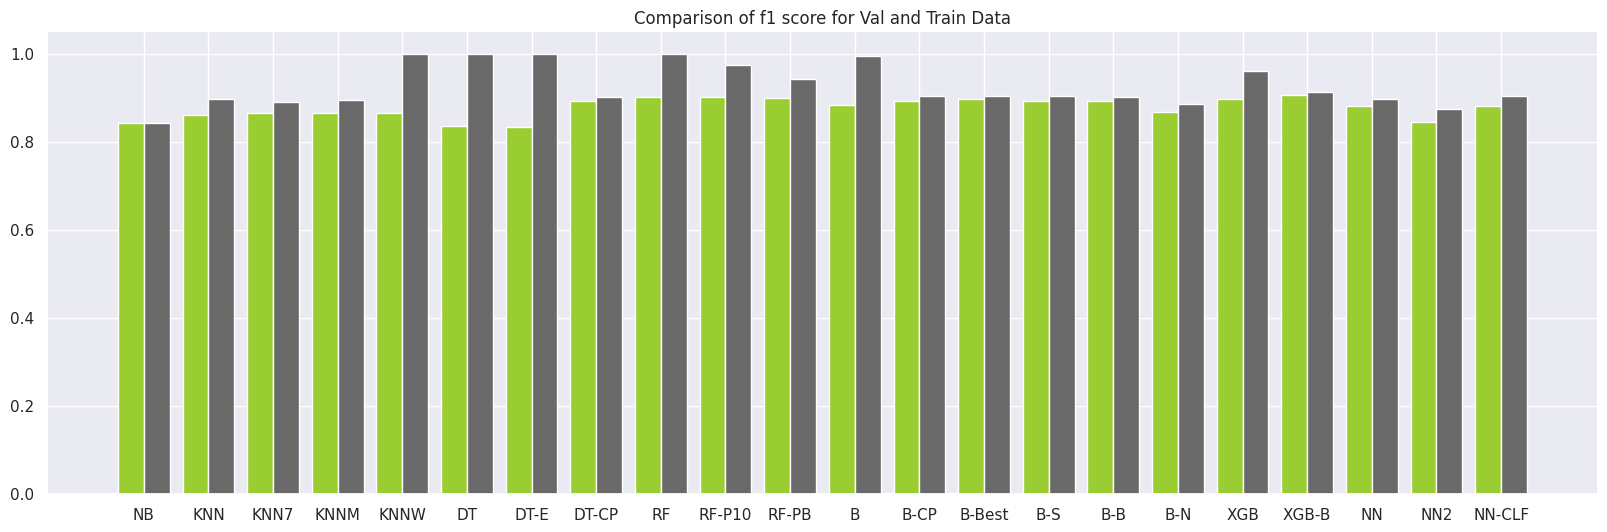

In [ ]:
plt.figure(figsize=(20,6))
ax = plt.subplot(111)
bar1 = ax.bar(data_val_f1.index - 0.4/2, data_val_f1[1], width=0.4, color='yellowgreen', label='Val f1')
bar2 = ax.bar(data_train_f1.index + 0.4/2, data_train_f1[1],  width=0.4, color='dimgray', label='Train f1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Comparison of f1 score for Val and Train Data', fontsize=12)
plt.xticks(np.arange(len(models)), models)

plt.show()

In [ ]:
# Create a dataframe with the model names and validation F1 scores
data_val_f1 = pd.DataFrame({'Model': models, 'Validation F1 Score': f1_scores_val})

# Create a dataframe with the model names and train F1 scores
data_train_f1 = pd.DataFrame({'Model': models, 'Train F1 Score': f1_scores_train})

# Display the table for validation F1 scores
print("Validation F1 Scores:")
print(tabulate(data_val_f1, headers='keys', tablefmt='psql'))

# Display the table for train F1 scores
print("\nTrain F1 Scores:")
print(tabulate(data_train_f1, headers='keys', tablefmt='psql'))

Validation F1 Scores:
+----+---------+-----------------------+
|    | Model   |   Validation F1 Score |
|----+---------+-----------------------|
|  0 | NB      |              0.842728 |
|  1 | KNN     |              0.861408 |
|  2 | KNN7    |              0.865104 |
|  3 | KNNM    |              0.865711 |
|  4 | KNNW    |              0.865619 |
|  5 | DT      |              0.835408 |
|  6 | DT-E    |              0.834029 |
|  7 | DT-CP   |              0.892626 |
|  8 | RF      |              0.901538 |
|  9 | RF-P10  |              0.901162 |
| 10 | RF-PB   |              0.899299 |
| 11 | B       |              0.882699 |
| 12 | B-CP    |              0.892221 |
| 13 | B-Best  |              0.89743  |
| 14 | B-S     |              0.89268  |
| 15 | B-B     |              0.89258  |
| 16 | B-N     |              0.868214 |
| 17 | XGB     |              0.897204 |
| 18 | XGB-B   |              0.906374 |
| 19 | NN      |              0.882104 |
| 20 | NN2     |              0.844

### Kaggle Submission


In [ ]:
X_test_final.reset_index()

RecordID  Competition   Edition    Region  Education   Income  \
0        89269     0.469739  1.000000  0.089549   0.213459  0.62158   
1        89144     0.000000  0.666667  0.000000   0.862097  0.62158   
2        39423     0.000000  1.000000  0.644321   0.862097  0.62158   
3        35614     0.469739  0.000000  0.000000   1.000000  0.62158   
4        55787     0.295004  1.000000  1.000000   0.862097  0.62158   
...        ...          ...       ...       ...        ...      ...   
7733     32740     0.469739  0.333333  0.956009   0.862097  0.00000   
7734     68598     0.469739  0.666667  0.000000   0.213459  1.00000   
7735     37536     0.179183  1.000000  0.000000   0.862097  0.00000   
7736     66572     0.295004  0.000000  0.644321   1.000000  0.00000   
7737     61047     0.295004  1.000000  0.000000   0.862097  0.62158   

      Previous attempts  Train bf competition  Sand training  Recovery  \
0                   0.0              0.348252       0.002105  0.152742   
1                   0.0              0.065734       0.000000  0.000000   
2                   0.0              0.044755       0.000000  0.000000   
3                   0.0              0.302098       0.004211  0.453003   
4                   0.0              0.313287       0.000000  0.206266   
...                 ...                   ...            ...       ...   
7733                0.0              0.265734       0.000000  0.280679   
7734                0.0              0.172028       0.000000  1.050914   
7735                0.0              0.195804       0.000000  0.221932   
7736                0.0              0.103497       0.000000  0.049608   
7737                0.0              1.191608       0.000000  0.280679   

      Supplements  Cardiovascular training  Squad training  Physiotherapy  \
0        0.083532                 0.143359        0.933333           0.00   
1        0.052506                 0.096978        0.000000           0.00   
2        0.047733                 0.178496        0.000000           0.00   
3        0.362768                 0.132115        0.133333           0.00   
4        0.386635                 0.792691        0.666667           0.10   
...           ...                      ...             ...            ...   
7733     0.202864                 0.144765        0.000000           0.00   
7734     0.026253                 0.096978        0.000000           0.00   
7735     0.245823                 0.016866        2.666667           0.00   
7736     0.164678                 0.008433        0.400000           0.10   
7737     0.427208                 0.820801        0.533333           0.05   

      Plyometric training  Sport-specific training  Other training  Sex_M  \
0                0.307692                 0.059701        0.000000    0.0   
1                0.000000                 0.000000        0.000000    0.0   
2                0.000000                 0.029851        0.000000    1.0   
3                0.000000                 0.492537        0.000000    0.0   
4                0.076923                 0.074627        0.010101    1.0   
...                   ...                      ...             ...    ...   
7733             0.000000                 0.164179        0.000000    0.0   
7734             0.000000                 0.268657        0.000000    0.0   
7735             0.000000                 0.194030        0.000000    0.0   
7736             0.000000                 0.044776        0.000000    1.0   
7737             0.230769                 0.149254        0.010101    1.0   

      Cancelled enrollment_True  Past injuries_True  
0                           0.0                 1.0  
1                           1.0                 0.0  
2                           1.0                 0.0  
3                           0.0                 0.0  
4                           0.0                 1.0  
...                         ...                 ...  
7733                        0.0     

In [ ]:
#Removing the "RecordID" variable.
#X_test_final.drop('RecordID', axis=1, inplace=True)

In [ ]:
# The model with the best score was the Model XGBoost Best

In [ ]:
# Score for the validation dataset using the best model:
model_xgb_best.score(X_val_model, y_val_model)

0.8820271392965937

In [ ]:
# Making the predictions on the test data using the best model
y_pred = model_xgb_best.predict(X_test_final)

In [ ]:
X_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7738 entries, 89269 to 61047
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Competition                7738 non-null   float64
 1   Edition                    7738 non-null   float64
 2   Region                     7738 non-null   float64
 3   Education                  7738 non-null   float64
 4   Income                     7738 non-null   float64
 5   Previous attempts          7738 non-null   float64
 6   Train bf competition       7738 non-null   float64
 7   Sand training              7738 non-null   float64
 8   Recovery                   7738 non-null   float64
 9   Supplements                7738 non-null   float64
 10  Cardiovascular training    7738 non-null   float64
 11  Squad training             7738 non-null   float64
 12  Physiotherapy              7738 non-null   float64
 13  Plyometric training        7738 non-null   

In [ ]:
#Since we do not have the record id in our X_test_final, we import again the test csv to have this variable
X_test_id = pd.read_csv(path + 'data/test.csv')

In [ ]:
# Saving the predictions to a CSV file
sample_submission = pd.DataFrame({'RecordID': X_test_id['RecordID'], 'Outcome': y_pred})
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/data/sample_submission.csv', index=False)

In [ ]:
# Confirming that our submission dataset has the right number of rows:
sample_submission.shape

(7738, 2)